# Initial Data Analysis

In [116]:
#import requried libraries
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns=25

import numpy as np
import random as rand

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')

from pandas.api.types import CategoricalDtype

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


inputfile = 'CKME136X10_2018_Initial_Data_Cleaned.csv'

In [117]:
# read data
df_eda = pd.read_csv(inputfile, engine = 'python')

### 1. Look at the Data

In [118]:
print('Display the first few rows of the data')
display(df_eda.head())
print()

# Randomly pick 10 rows
# randomly pick 10 rows from the data set to view
rand.seed(101)
df_rows = list(range(1, len(df_eda.index)))
random_10_rows = rand.sample(df_rows, 10)

display(df_eda.loc[random_10_rows])

Display the first few rows of the data


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,P_ISEV
0,1999,1,1,12,1,4,13,1,5,3,18,1,1993,0,25,11,2,1,2
1,1999,1,1,10,1,3,13,1,2,1,18,1,1998,1,65,11,2,1,2
2,1999,1,1,15,1,51,1,1,1,1,6,1,1995,1,17,11,2,1,1
3,1999,1,1,15,1,51,1,1,1,1,6,24,1900,0,41,99,16,3,2
4,1999,1,1,23,1,2,13,1,5,1,10,1,1997,1,25,11,2,1,2


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,P_ISEV
1633720,2005,1,4,19,2,36,3,3,2,2,18,1,1997,1,32,11,2,1,1
3008782,2010,10,5,7,2,33,2,3,2,1,3,1,2003,0,17,11,2,1,2
3918644,2015,1,3,14,2,21,2,1,2,2,18,1,2004,1,59,11,2,1,2
407024,2000,7,7,19,3,35,2,1,1,1,1,1,1993,0,43,11,2,1,2
4223835,2016,7,1,23,1,6,1,1,2,3,3,1,2014,0,15,13,2,2,1
1799550,2005,9,3,11,3,6,2,1,1,1,1,1,2001,0,25,23,2,2,2
1859723,2005,11,7,19,1,6,1,3,4,1,18,1,1992,1,81,11,2,1,2
2420302,2008,2,7,0,2,35,2,1,2,1,1,1,1994,1,24,11,2,1,2
4072364,2015,10,2,15,2,34,2,1,1,1,18,1,2013,0,58,11,2,1,2
1781546,2005,8,4,5,1,6,1,1,1,4,18,8,2001,1,63,22,1,2,2


### 2. Dimensions of Your Data

In [119]:
print('Number of Rows: {}'.format(df_eda.shape[0]))
print('Number of Columns: {}'.format(df_eda.shape[1]))
print()
print('Column Names: {}'.format(df_eda.columns.values))
print()

#check for nun numeric values
print("Number of Null values: {}".format(df_eda.isnull().sum().sum()))
print()
print("Number of NaN: {0}".format(df_eda.isna().sum().sum()))
print()
print("Number of Non Numeric: {}".format(df_eda[df_eda.columns].apply(lambda x: x.astype(str).str.contains('[^0-9]')).sum().sum()))
print()
print('Information on the imported data')
print(df.info())

Number of Rows: 4336558
Number of Columns: 19

Column Names: ['C_YEAR' 'C_MNTH' 'C_WDAY' 'C_HOUR' 'C_VEHS' 'C_CONF' 'C_RCFG' 'C_WTHR'
 'C_RSUR' 'C_RALN' 'C_TRAF' 'V_TYPE' 'V_YEAR' 'P_SEX' 'P_AGE' 'P_PSN'
 'P_SAFE' 'P_USER' 'P_ISEV']

Number of Null values: 0

Number of NaN: 0

Number of Non Numeric: 0

Information on the imported data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336558 entries, 0 to 4336557
Data columns (total 19 columns):
C_YEAR    int64
C_MNTH    int64
C_WDAY    int64
C_HOUR    int64
C_VEHS    int64
C_CONF    int64
C_RCFG    int64
C_WTHR    int64
C_RSUR    int64
C_RALN    int64
C_TRAF    int64
V_TYPE    int64
V_YEAR    int64
P_SEX     int64
P_AGE     int64
P_PSN     int64
P_SAFE    int64
P_USER    int64
P_ISEV    int64
dtypes: int64(19)
memory usage: 628.6 MB
None


In [120]:
#make two copies of the data file
df_backup = df_eda.copy()

#Split between data and class
df_X = df_eda[df_eda.columns[0:df_eda.columns.size -1]].copy()

#class with 3 levels
df_Ym = df_eda[df_eda.columns[-1]].copy()

#class with 2 levels
df_Yb = df_eda[df_eda.columns[-1]].copy()
df_Yb.replace(to_replace = 3, value = 2, inplace = True)

# check the levels
print(df_Ym.unique())
print(df_Yb.unique())

[2 1 3]
[2 1]


### 3. Data Type For Each Attribute

In [121]:
df_X = df_X.astype('category')
df_X['C_YEAR'] = df_X['C_YEAR'].astype(CategoricalDtype(ordered=True))
df_X['C_MNTH'] = df_X['C_MNTH'].astype(CategoricalDtype(ordered=True))
df_X['C_WDAY'] = df_X['C_WDAY'].astype(CategoricalDtype(ordered=True))
df_X['C_HOUR'] = df_X['C_HOUR'].astype(CategoricalDtype(ordered=True))
df_X['C_VEHS'] = df_X['C_VEHS'].astype('int')
df_X['V_YEAR'] = df_X['V_YEAR'].astype(CategoricalDtype(ordered=True))
df_X['P_PSN'] = df_X['P_PSN'].astype(CategoricalDtype(ordered=True))
df_X['P_AGE'] = df_X['P_AGE'].astype('int')
df_Yb = df_Yb.astype(CategoricalDtype())
df_Ym = df_Ym.astype(CategoricalDtype())
print(df_X.info())
print('Yb: {}'.format(df_Yb.dtypes))
print('Ym: {}'.format(df_Ym.dtypes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336558 entries, 0 to 4336557
Data columns (total 18 columns):
C_YEAR    category
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    int32
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
V_TYPE    category
V_YEAR    category
P_SEX     category
P_AGE     int32
P_PSN     category
P_SAFE    category
P_USER    category
dtypes: category(16), int32(2)
memory usage: 99.3 MB
None
Yb: category
Ym: category


### 4. Descriptive Statistics

In [122]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print('Descriptive Summary of Categorical Variable(s)')
display(df_X[df_X.columns[0:9]].describe(exclude=[int]))
display(df_X[df_X.columns[9:]].describe(exclude=[int]))
print()
print('Descriptive Summary of Numeric Variable(s)')
display(df_X.describe())

Descriptive Summary of Categorical Variable(s)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_CONF,C_RCFG,C_WTHR,C_RSUR
count,4336558,4336558,4336558,4336558,4336558,4336558,4336558,4336558
unique,18,12,7,24,19,11,8,10
top,2000,8,5,16,21,2,1,1
freq,280730,400720,737905,388274,1367080,2237536,3066796,2903517


,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_PSN,P_SAFE,P_USER
count,4336558,4336558,4336558,4336558,4336558,4336558,4336558,4336558
unique,7,18,14,113,2,14,8,5
top,1,18,1,2000,1,11,2,1
freq,3374366,2355016,3718042,243627,2357286,2877128,3733829,2765658



Descriptive Summary of Numeric Variable(s)


,C_VEHS,P_AGE
count,4.337e+06,4.337e+06
mean,2.060e+00,3.658e+01
std,1.295e+00,1.871e+01
min,1.000e+00,1.000e+00
25%,2.000e+00,2.100e+01
50%,2.000e+00,3.400e+01
75%,2.000e+00,5.000e+01
max,7.700e+01,9.900e+01


### 5. Class Distribution

In [123]:
print("Binary Class Distribution")
display(df_Yb.describe())
display(df_Yb.groupby(df_Yb).size())

Binary Class Distribution


count     4336558
unique          2
top             2
freq      2524396
Name: P_ISEV, dtype: int64

P_ISEV
1    1812162
2    2524396
Name: P_ISEV, dtype: int64

In [124]:
print("Multi Class Distribution")
display(df_Ym.describe())
display(df_Ym.groupby(df_Ym).size())

Multi Class Distribution


count     4336558
unique          3
top             2
freq      2493222
Name: P_ISEV, dtype: int64

P_ISEV
1    1812162
2    2493222
3      31174
Name: P_ISEV, dtype: int64

### 6. Correlation Between Attributes

In [125]:
# many of the values are categorical, it this test is not very useful.
# lets redo the test with numeric and ordinal only
print('Spearman rank correlation for all independent variable')
full_corr = df_X.astype('int').corr(method='spearman')
print (full_corr)




Spearman rank correlation for all independent variable
        C_YEAR     C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF     C_RCFG  C_WTHR     C_RSUR  C_RALN  \
C_YEAR   1.000 -3.157e-03  -0.018  -0.012   0.004   0.017 -3.490e-02  -0.015 -7.898e-03  -0.019   
C_MNTH  -0.003  1.000e+00   0.001   0.024  -0.008  -0.011 -1.369e-03   0.004 -6.990e-02  -0.004   
C_WDAY  -0.018  1.255e-03   1.000   0.012  -0.034  -0.019 -2.345e-02   0.009 -2.139e-03   0.026   
C_HOUR  -0.012  2.449e-02   0.012   1.000   0.027   0.035  2.143e-02  -0.006 -4.273e-02  -0.026   
C_VEHS   0.004 -8.382e-03  -0.034   0.027   1.000   0.394  9.238e-02  -0.067 -9.936e-02  -0.148   
C_CONF   0.017 -1.081e-02  -0.019   0.035   0.394   1.000  3.178e-01  -0.046 -7.672e-02  -0.131   
C_RCFG  -0.035 -1.369e-03  -0.023   0.021   0.092   0.318  1.000e+00  -0.068 -8.008e-02  -0.122   
C_WTHR  -0.015  4.277e-03   0.009  -0.006  -0.067  -0.046 -6.847e-02   1.000  6.375e-01   0.104   
C_RSUR  -0.008 -6.990e-02  -0.002  -0.043  -0.099  -0.

In [126]:
corr_columns = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','V_YEAR', 'P_PSN', 'P_AGE']
df_X[corr_columns].astype('int').corr(method='spearman')

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,V_YEAR,P_PSN,P_AGE
C_YEAR,1.000,-0.003,-0.018,-0.012,0.004,0.652,-0.034,0.071
C_MNTH,-0.003,1.000,0.001,0.024,-0.008,0.025,0.005,0.004
C_WDAY,-0.018,0.001,1.000,0.012,-0.034,-0.005,0.076,-0.055
C_HOUR,-0.012,0.024,0.012,1.000,0.027,-0.022,0.057,-0.056
C_VEHS,0.004,-0.008,-0.034,0.027,1.000,0.120,-0.116,0.056
V_YEAR,0.652,0.025,-0.005,-0.022,0.120,1.000,-0.129,0.086
P_PSN,-0.034,0.005,0.076,0.057,-0.116,-0.129,1.000,-0.311
P_AGE,0.071,0.004,-0.055,-0.056,0.056,0.086,-0.311,1.000


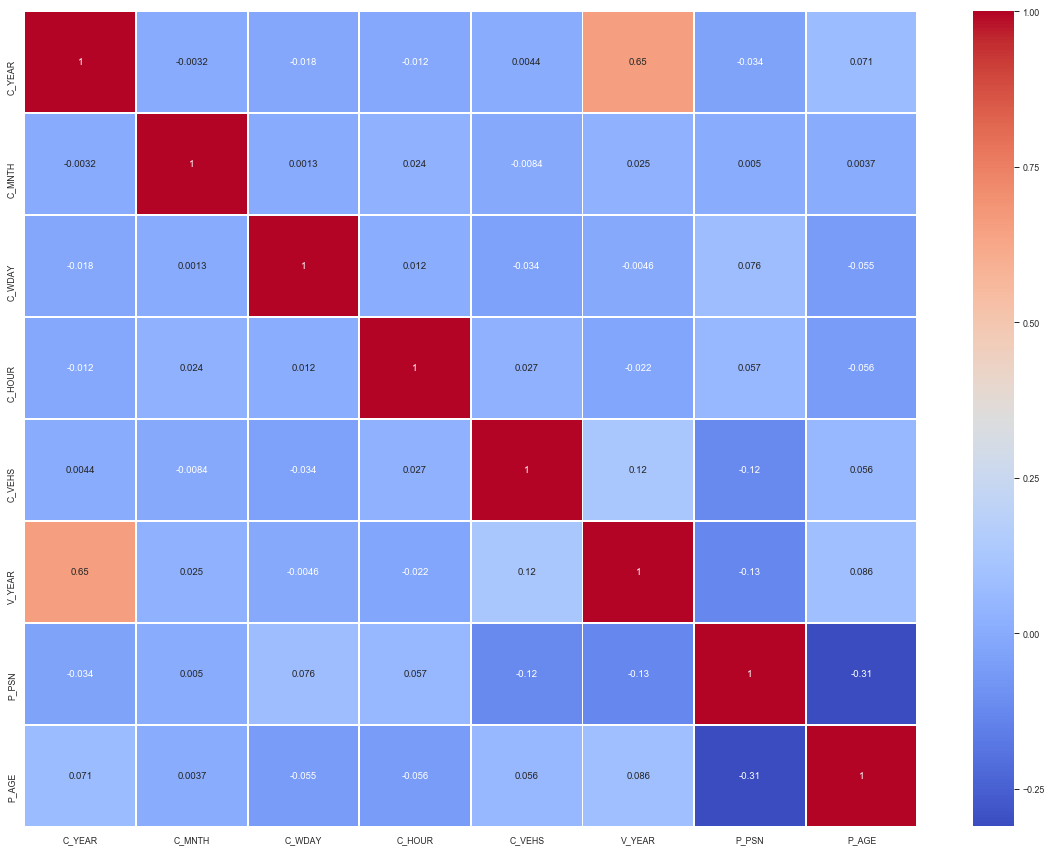

In [127]:
### Heat Map and Corr Plot
corr_columns = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','V_YEAR', 'P_PSN', 'P_AGE']
plt.figure(figsize=(20,15))
sns.heatmap(df_X[corr_columns].astype('int').corr(method='spearman'),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

### Chi Square Test - Dependent vs Independent (binary class)

In [128]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat_1 = df_Yb

chi_dep_vs_indep = pd.DataFrame(columns=[df_X.columns], index = ['P_ISEV'])

for col in df_X.columns:
    print(col)
    # contingency table
    table = np.array([df_X[col], cat_1])

    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    #print(expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 1  
    else:
        print('Independent (fail to reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 0

display(chi_dep_vs_indep[df_X.columns[0:9]])
display(chi_dep_vs_indep[df_X.columns[9:]])

C_YEAR
probability=0.950, critical=4341402.256, stat=666519.151
Independent (fail to reject H0)
C_MNTH
probability=0.950, critical=4341402.256, stat=2923411.016
Independent (fail to reject H0)
C_WDAY
probability=0.950, critical=4341402.256, stat=1969591.743
Independent (fail to reject H0)
C_HOUR
probability=0.950, critical=4341402.256, stat=3102640.422
Independent (fail to reject H0)
C_VEHS
probability=0.950, critical=4341402.256, stat=1171220.986
Independent (fail to reject H0)
C_CONF
probability=0.950, critical=4341402.256, stat=6909422.906
Dependent (reject H0)
C_RCFG
probability=0.950, critical=4341402.256, stat=1525778.602
Independent (fail to reject H0)
C_WTHR
probability=0.950, critical=4341402.256, stat=1467121.625
Independent (fail to reject H0)
C_RSUR
probability=0.950, critical=4341402.256, stat=1771990.661
Independent (fail to reject H0)
C_RALN
probability=0.950, critical=4341402.256, stat=1061803.275
Independent (fail to reject H0)
C_TRAF
probability=0.950, critical=434140

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR
P_ISEV,0,0,0,0,0,1,0,0,0


,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
P_ISEV,0,1,1,0,0,0,0,0,0


### Chi Square Test - Dependent vs Independent (Multi class)

In [129]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat_1 = df_Ym

chi_dep_vs_indep = pd.DataFrame(columns=[df_X.columns], index = ['P_ISEV'])

for col in df_X.columns:
    print(col)
    # contingency table
    table = np.array([df_X[col], cat_1])

    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    #print(expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 1  
    else:
        print('Independent (fail to reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 0

display(chi_dep_vs_indep[df_X.columns[0:9]])
display(chi_dep_vs_indep[df_X.columns[9:]])

C_YEAR
probability=0.950, critical=4341402.256, stat=699344.553
Independent (fail to reject H0)
C_MNTH
probability=0.950, critical=4341402.256, stat=2947462.958
Independent (fail to reject H0)
C_WDAY
probability=0.950, critical=4341402.256, stat=1987819.458
Independent (fail to reject H0)
C_HOUR
probability=0.950, critical=4341402.256, stat=3150538.631
Independent (fail to reject H0)
C_VEHS
probability=0.950, critical=4341402.256, stat=1190831.778
Independent (fail to reject H0)
C_CONF
probability=0.950, critical=4341402.256, stat=7009443.225
Dependent (reject H0)
C_RCFG
probability=0.950, critical=4341402.256, stat=1544093.374
Independent (fail to reject H0)
C_WTHR
probability=0.950, critical=4341402.256, stat=1479808.659
Independent (fail to reject H0)
C_RSUR
probability=0.950, critical=4341402.256, stat=1785920.487
Independent (fail to reject H0)
C_RALN
probability=0.950, critical=4341402.256, stat=1068438.557
Independent (fail to reject H0)
C_TRAF
probability=0.950, critical=434140

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR
P_ISEV,0,0,0,0,0,1,0,0,0


,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
P_ISEV,0,1,1,0,0,0,0,0,0


In [130]:
### Chi Square Test - compare correlation between independent variables

In [131]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/


df_chi = pd.DataFrame(columns=[df_X], index = [df_X])

i=0
for c1 in df_X.columns:
    i = i + 1;
    for c2 in df_X.columns[i: len(df_X.columns)]:
        print('c1: {0}, c2: {1}'.format(c1, c2))
        # contingency table
        if (c2 == 'C_HOUR'):
            continue
        if (c2 == 'P_SEX'):
            continue
        table = np.array([df_X[c1], df_X[c2]])
        
        stat, p, dof, expected = chi2_contingency(table)
        print('dof=%d' % dof)
        print(expected)

        # interpret test-statistic
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            df_chi.loc[c1,c2] = 1
            print('Dependent (reject H0)')
        else:
            print('Independent (fail to reject H0)')
            df_chi.loc[c1,c2] = 0

display(df_chi)

c1: C_YEAR, c2: C_MNTH
dof=4336557
[[1993.33570739 1993.33570739 1993.33570739 ... 2021.24240729
  2021.24240729 2021.24240729]
 [   6.66429261    6.66429261    6.66429261 ...    6.75759271
     6.75759271    6.75759271]]
probability=0.950, critical=4341402.256, stat=7628745.310
Dependent (reject H0)
c1: C_YEAR, c2: C_WDAY
dof=4336557
[[1996.00522559 1996.00522559 1996.00522559 ... 2018.95928568
  2018.95928568 2018.95928568]
 [   3.99477441    3.99477441    3.99477441 ...    4.04071432
     4.04071432    4.04071432]]
probability=0.950, critical=4341402.256, stat=4039817.500
Independent (fail to reject H0)
c1: C_YEAR, c2: C_HOUR
c1: C_YEAR, c2: C_VEHS
dof=4336557
[[1997.94933015 1997.94933015 1997.94933015 ... 2015.93087412
  2015.93087412 2015.93087412]
 [   2.05066985    2.05066985    2.05066985 ...    2.06912588
     2.06912588    2.06912588]]
probability=0.950, critical=4341402.256, stat=3467838.404
Independent (fail to reject H0)
c1: C_YEAR, c2: C_CONF
dof=4336557
[[1979.27847404 

dof=4336557
[[ 1.63814757  1.63814757  1.63814757 ... 10.64795922 11.467033
  11.467033  ]
 [ 0.36185243  0.36185243  0.36185243 ...  2.35204078  2.532967
   2.532967  ]]
probability=0.950, critical=4341402.256, stat=3318643.661
Independent (fail to reject H0)
c1: C_WDAY, c2: C_HOUR
c1: C_WDAY, c2: C_VEHS
dof=4336557
[[1.32201811 1.32201811 1.32201811 ... 5.94908148 5.94908148 5.94908148]
 [0.67798189 0.67798189 0.67798189 ... 3.05091852 3.05091852 3.05091852]]
probability=0.950, critical=4341402.256, stat=2675887.771
Independent (fail to reject H0)
c1: C_WDAY, c2: C_CONF
dof=4336557
[[ 0.71547935  0.57238348  7.44098525 ...  4.00668436  4.00668436
   4.00668436]
 [ 4.28452065  3.42761652 44.55901475 ... 23.99331564 23.99331564
  23.99331564]]
probability=0.950, critical=4341402.256, stat=12829752.081
Dependent (reject H0)
c1: C_WDAY, c2: C_RCFG
dof=4336557
[[9.49525233 9.49525233 1.35646462 ... 5.42585847 5.42585847 5.42585847]
 [4.50474767 4.50474767 0.64353538 ... 2.57414153 2.57414

dof=4336557
[[3.25209329 1.62604665 1.0840311  ... 2.71007774 2.71007774 2.71007774]
 [2.74790671 1.37395335 0.9159689  ... 2.28992226 2.28992226 2.28992226]]
probability=0.950, critical=4341402.256, stat=2508804.046
Independent (fail to reject H0)
c1: C_VEHS, c2: C_RALN
dof=4336557
[[2.37708051 1.18854025 1.18854025 ... 1.78281038 1.78281038 1.78281038]
 [1.62291949 0.81145975 0.81145975 ... 1.21718962 1.21718962 1.21718962]]
probability=0.950, critical=4341402.256, stat=1694572.479
Independent (fail to reject H0)
c1: C_VEHS, c2: C_TRAF
dof=4336557
[[ 3.04627645  3.04627645  1.12231238 ...  3.20660679  3.20660679
   3.20660679]
 [15.95372355 15.95372355  5.87768762 ... 16.79339321 16.79339321
  16.79339321]]
probability=0.950, critical=4341402.256, stat=11989683.059
Dependent (reject H0)
c1: C_VEHS, c2: V_TYPE
dof=4336557
[[0.86262259 0.86262259 0.86262259 ... 1.29393388 1.29393388 1.29393388]
 [1.13737741 1.13737741 1.13737741 ... 1.70606612 1.70606612 1.70606612]]
probability=0.950,

dof=4336557
[[2.90115799 1.450579   0.96705266 ... 3.38468432 3.38468432 3.38468432]
 [3.09884201 1.549421   1.03294734 ... 3.61531568 3.61531568 3.61531568]]
probability=0.950, critical=4341402.256, stat=1325813.825
Independent (fail to reject H0)
c1: C_WTHR, c2: C_RALN
dof=4336557
[[2.1470028 1.0735014 1.0735014 ... 2.6837535 2.6837535 2.6837535]
 [1.8529972 0.9264986 0.9264986 ... 2.3162465 2.3162465 2.3162465]]
probability=0.950, critical=4341402.256, stat=1670244.193
Independent (fail to reject H0)
c1: C_WTHR, c2: C_TRAF
dof=4336557
[[ 2.49331949  2.49331949  0.91859139 ...  2.88700151  2.88700151
   2.88700151]
 [16.50668051 16.50668051  6.08140861 ... 19.11299849 19.11299849
  19.11299849]]
probability=0.950, critical=4341402.256, stat=10322152.525
Dependent (reject H0)
c1: C_WTHR, c2: V_TYPE
dof=4336557
[[0.749974 0.749974 0.749974 ... 1.874935 1.874935 1.874935]
 [1.250026 1.250026 1.250026 ... 3.125065 3.125065 3.125065]]
probability=0.950, critical=4341402.256, stat=6354812.

dof=4336557
[[   2.71052844    2.71732515    2.71324712 ...    2.73363726
     2.73363726    2.73363726]
 [1991.28947156 1996.28267485 1993.28675288 ... 2008.26636274
  2008.26636274 2008.26636274]]
probability=0.950, critical=4341402.256, stat=41505794.853
Dependent (reject H0)
c1: V_TYPE, c2: P_SEX
c1: V_TYPE, c2: P_AGE
dof=4336557
[[ 1.79724368  4.56223395  1.24424562 ...  2.21199222  1.79724368
   0.13824951]
 [24.20275632 61.43776605 16.75575438 ... 29.78800778 24.20275632
   1.86175049]]
probability=0.950, critical=4341402.256, stat=33209250.483
Dependent (reject H0)
c1: V_TYPE, c2: P_PSN
dof=4336557
[[ 1.72482334  1.72482334  1.72482334 ...  1.72482334  2.0122939
   3.3059114 ]
 [10.27517666 10.27517666 10.27517666 ... 10.27517666 11.9877061
  19.6940886 ]]
probability=0.950, critical=4341402.256, stat=10147075.774
Dependent (reject H0)
c1: V_TYPE, c2: P_SAFE
dof=4336557
[[1.36241682 1.36241682 1.36241682 ... 1.36241682 1.36241682 1.36241682]
 [1.63758318 1.63758318 1.63758318 .

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER
C_YEAR,NaN,1,0,NaN,0,1,1,0,1,0,1,1,0,NaN,1,1,1,0
C_MNTH,NaN,NaN,1,NaN,0,1,1,1,1,0,1,1,1,NaN,1,1,1,0
C_WDAY,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,0,NaN,1,1,1,0
C_HOUR,NaN,NaN,NaN,NaN,0,1,1,1,1,1,1,1,1,NaN,1,1,1,0
C_VEHS,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,1,0,NaN,1,1,0,0
C_CONF,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,NaN,1,1,1,1
C_RCFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,NaN,1,1,0,0
C_WTHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,NaN,1,1,0,0
C_RSUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,NaN,1,1,1,0
C_RALN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,NaN,1,0,0,0


### 7. Skewness of independent Variables

In [132]:
print(df_X.skew())

C_YEAR     0.146
C_MNTH    -0.110
C_WDAY    -0.051
C_HOUR    -0.507
C_VEHS    24.529
C_CONF    -0.169
C_RCFG     5.372
C_WTHR     2.108
C_RSUR     3.327
C_RALN     2.533
C_TRAF    -0.251
V_TYPE     3.256
V_YEAR    -3.723
P_SEX     -0.175
P_AGE      0.447
P_PSN      4.380
P_SAFE     2.693
P_USER     2.358
dtype: float64


## 8a. Data Visualization for Binary Class

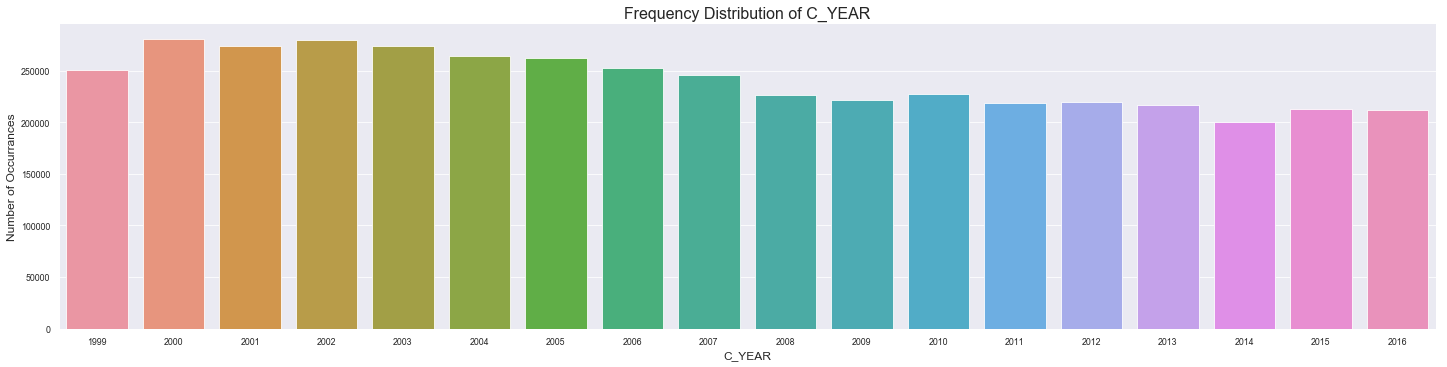

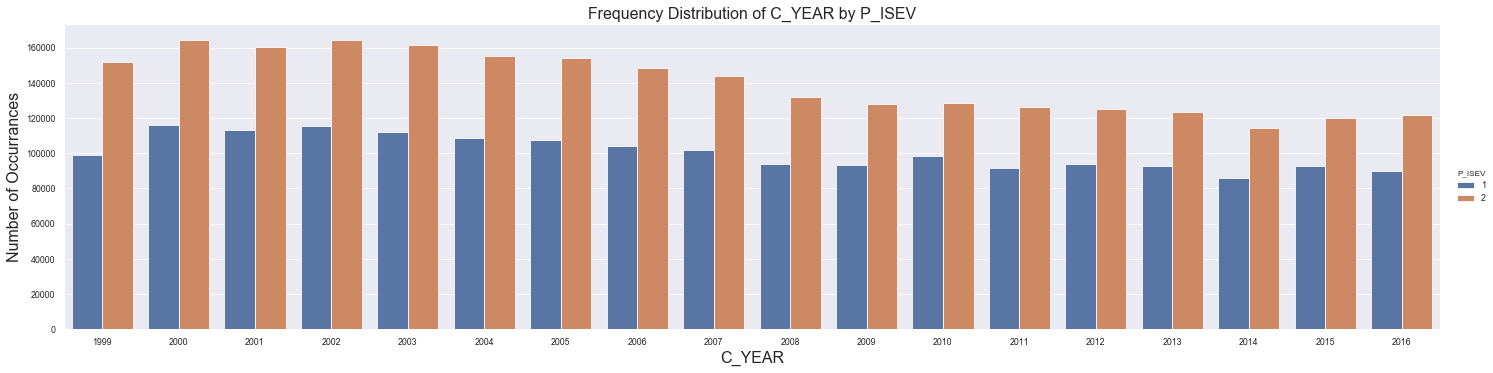

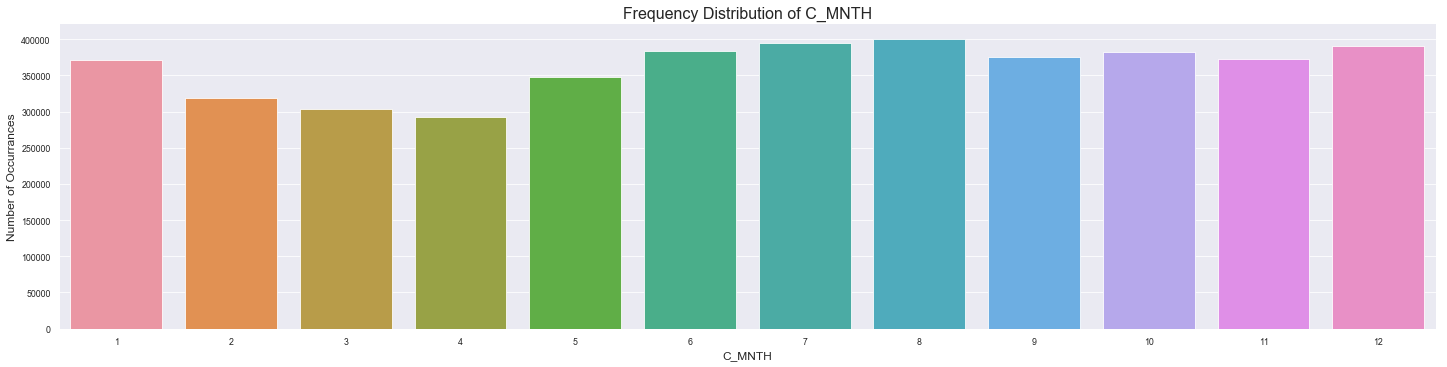

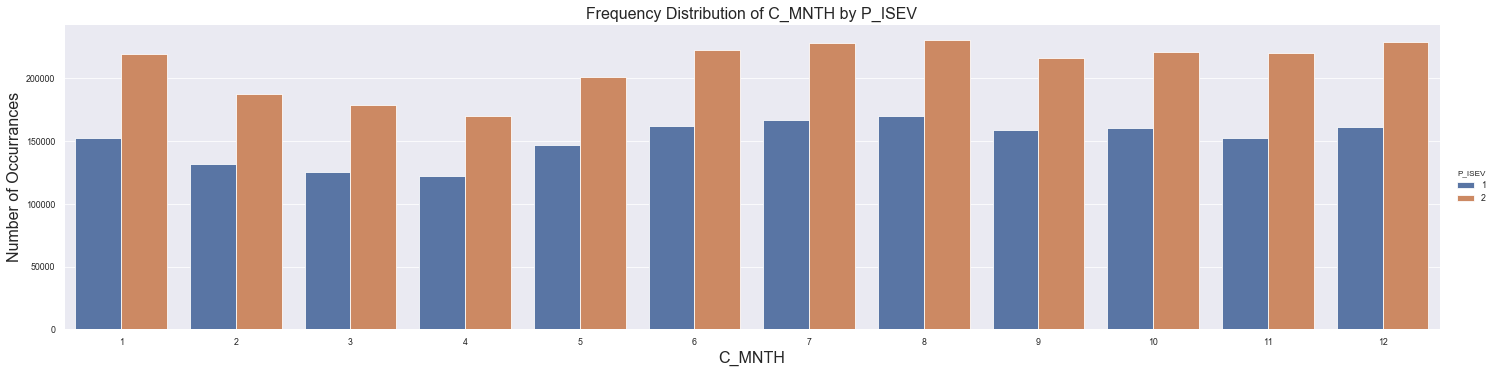

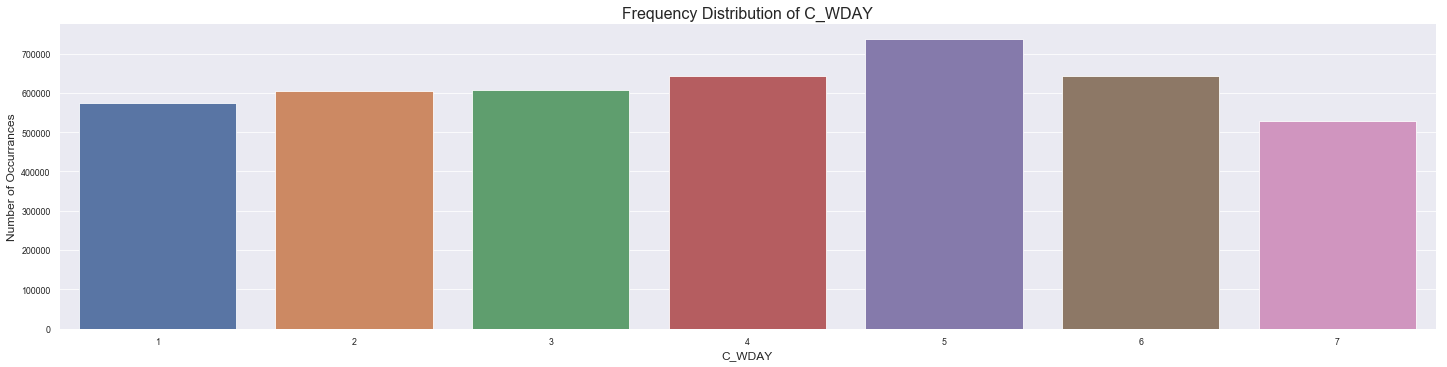

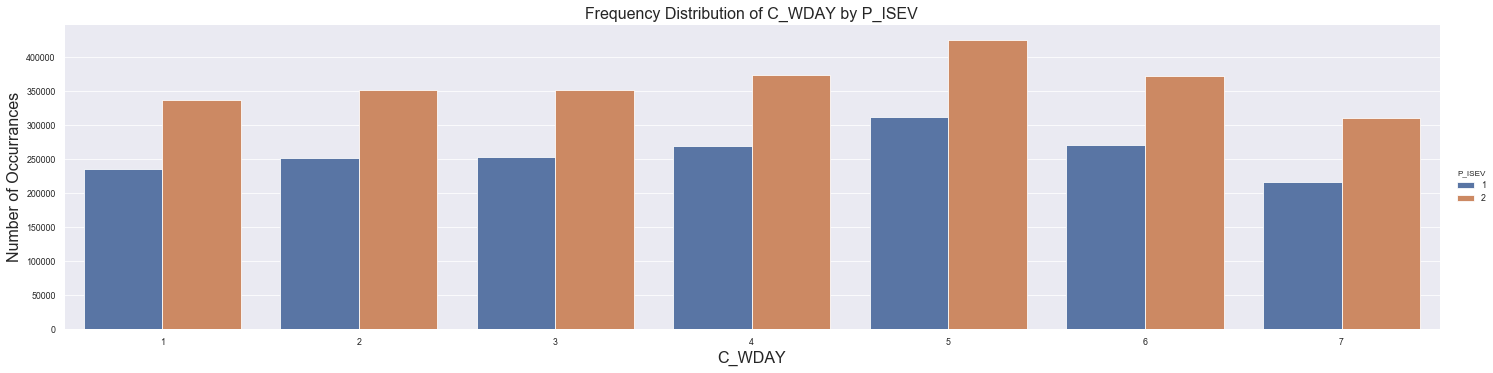

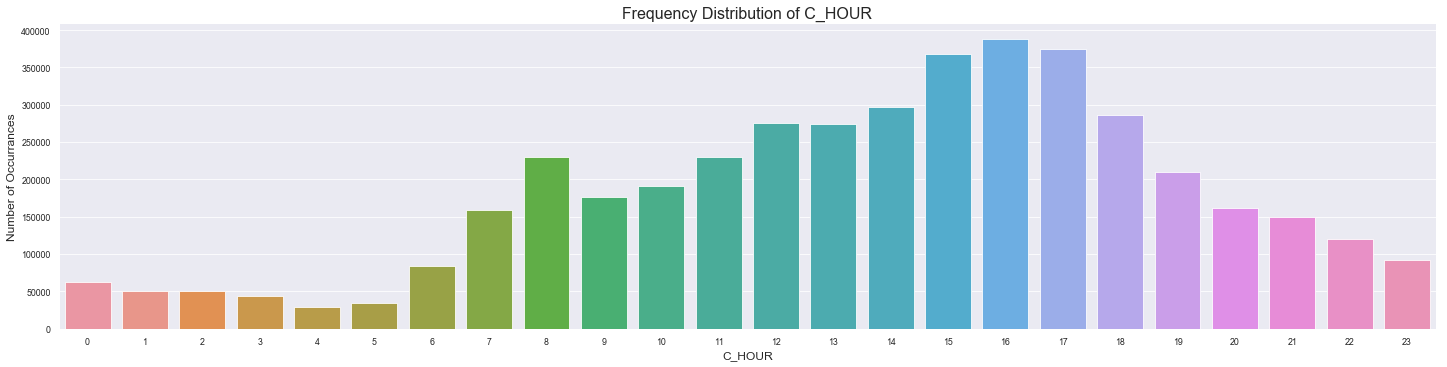

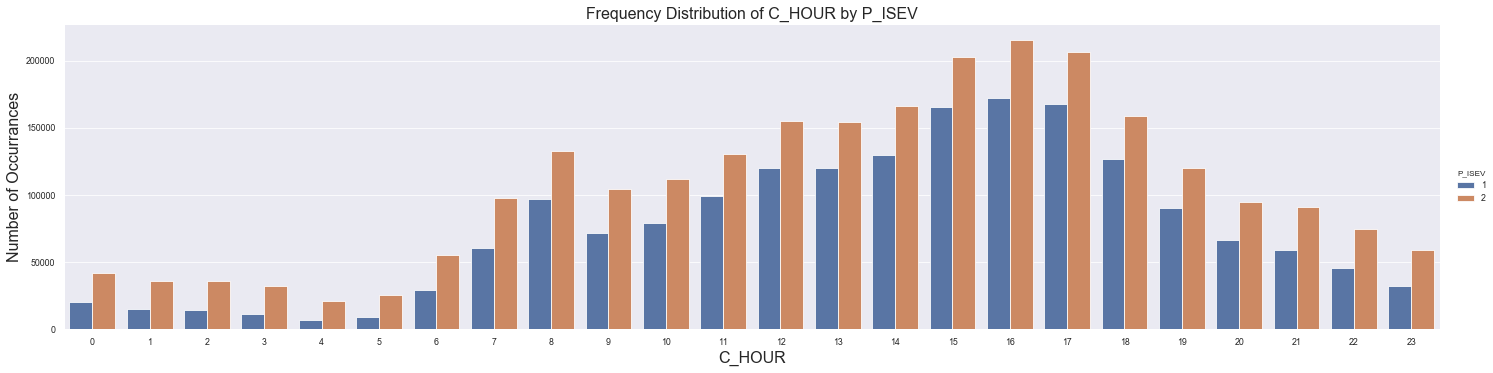

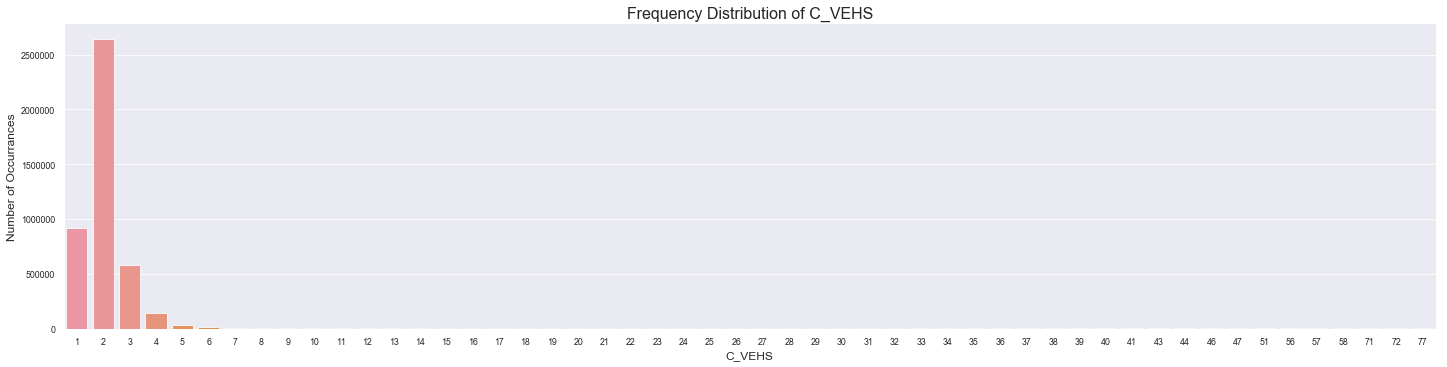

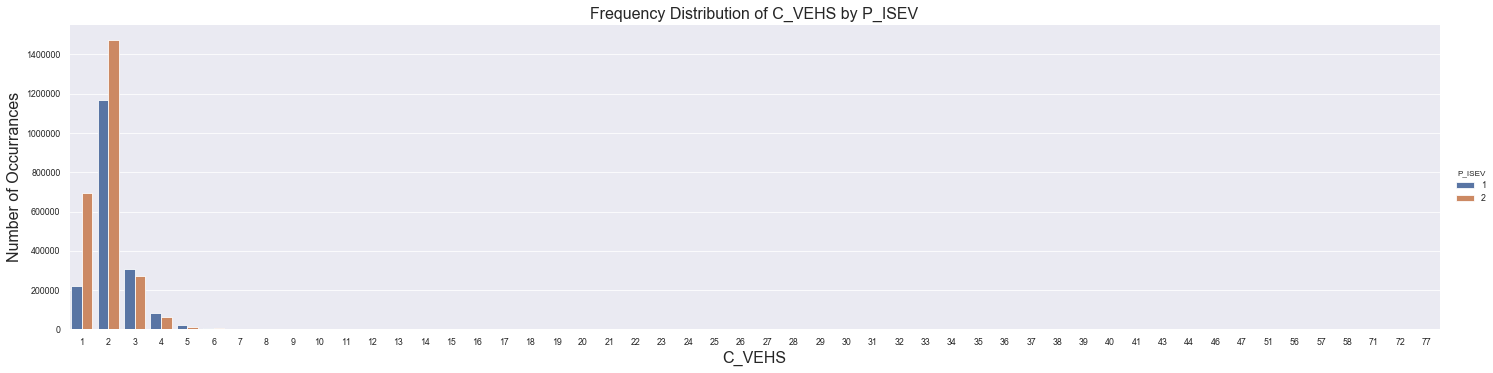

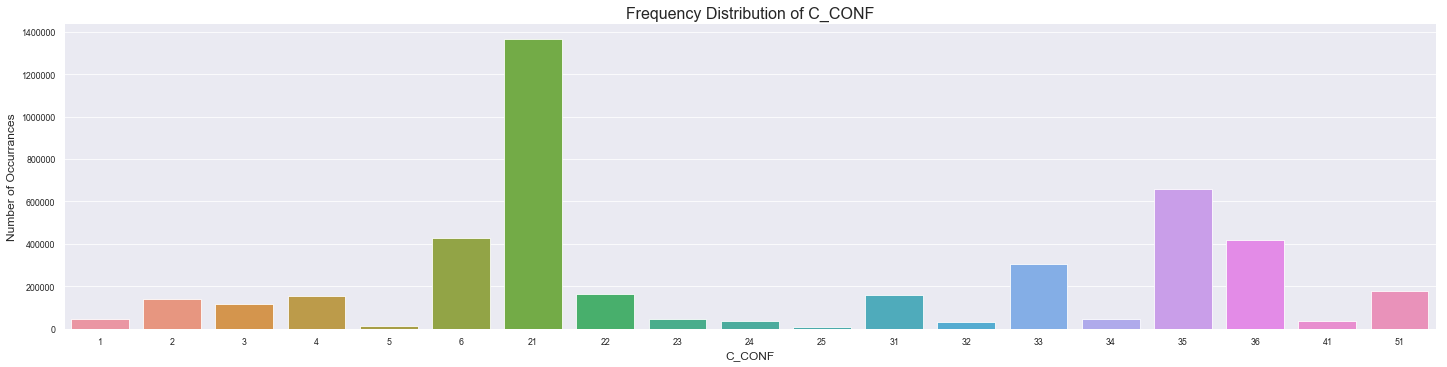

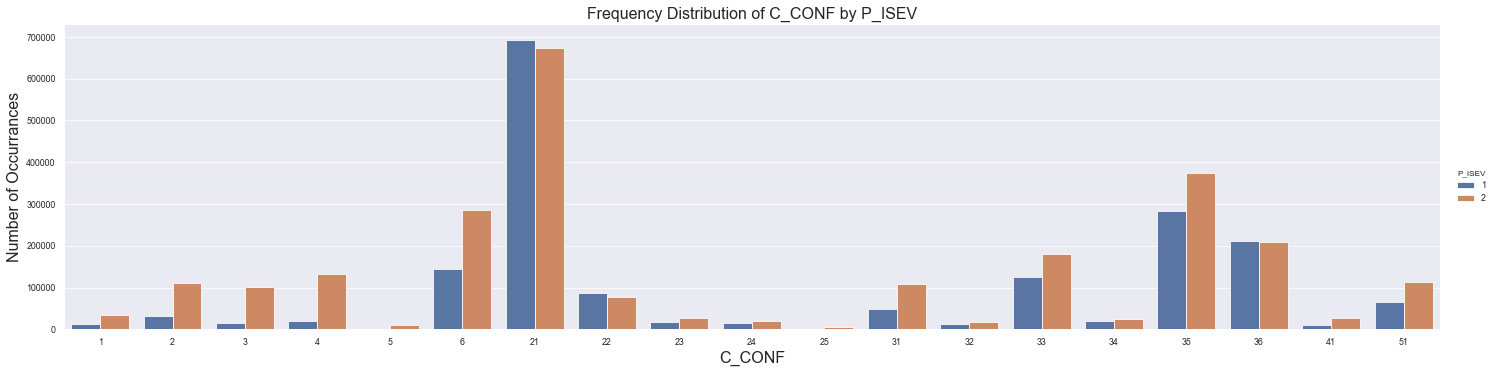

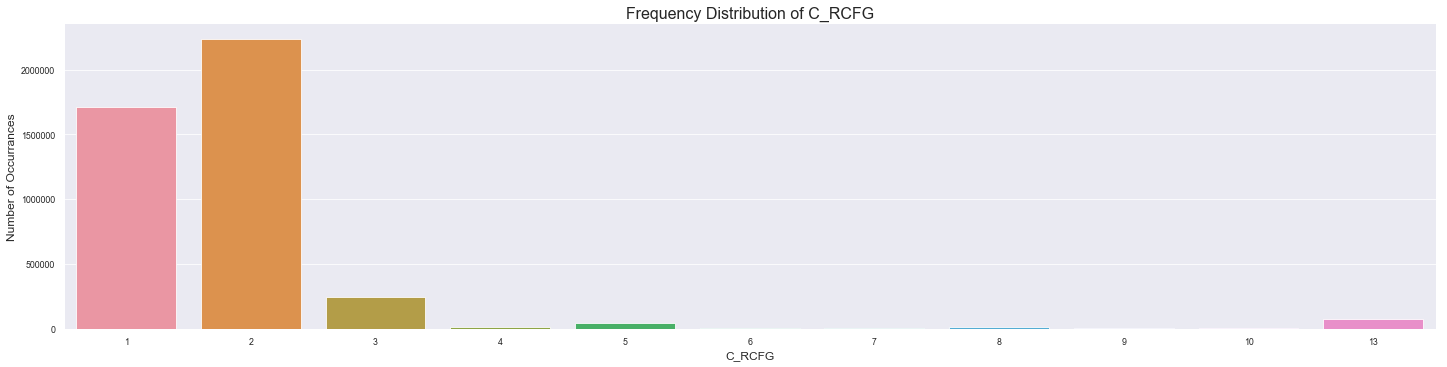

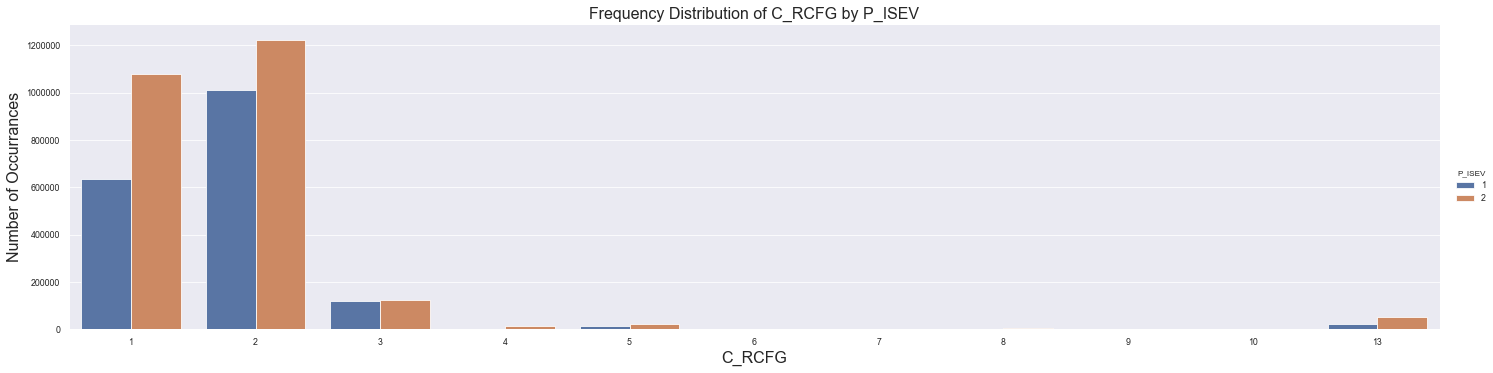

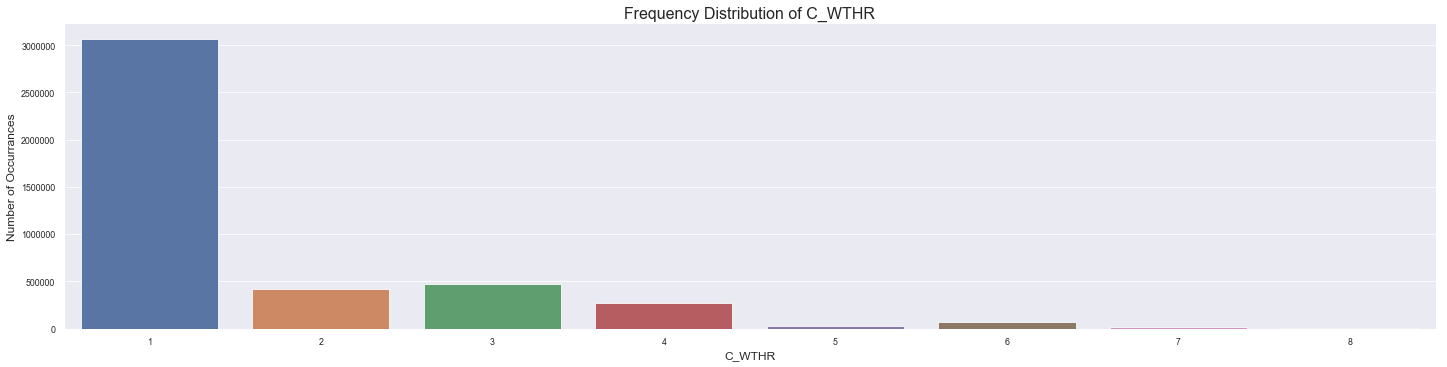

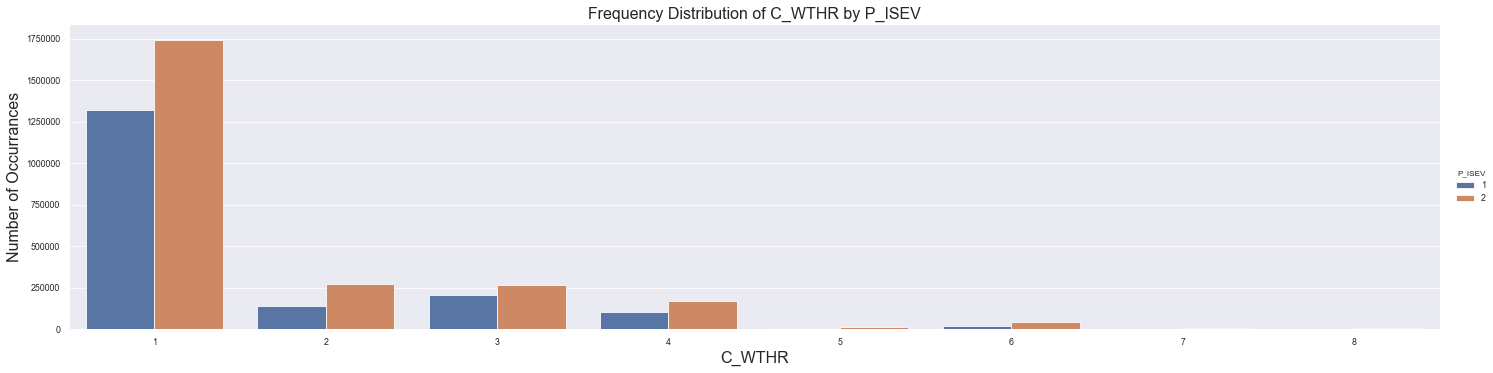

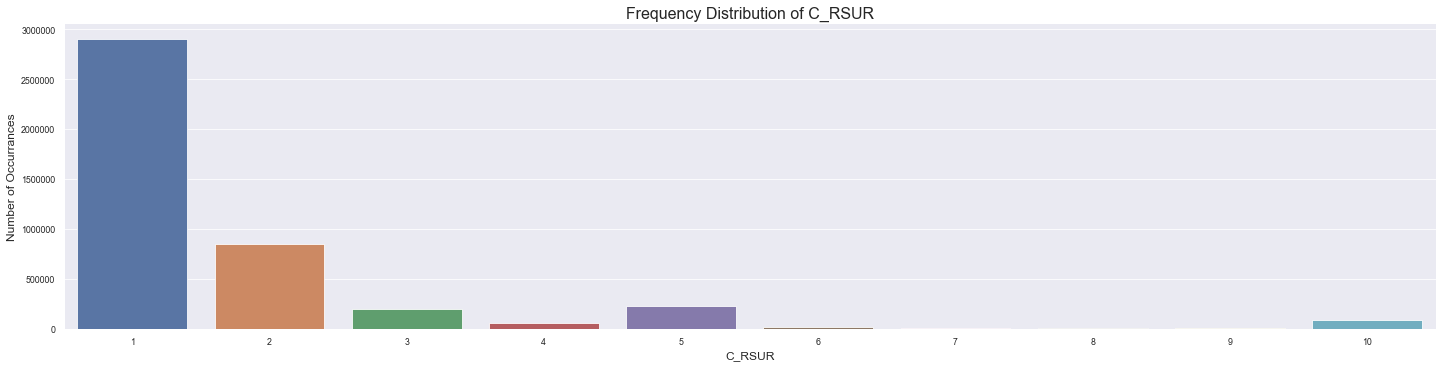

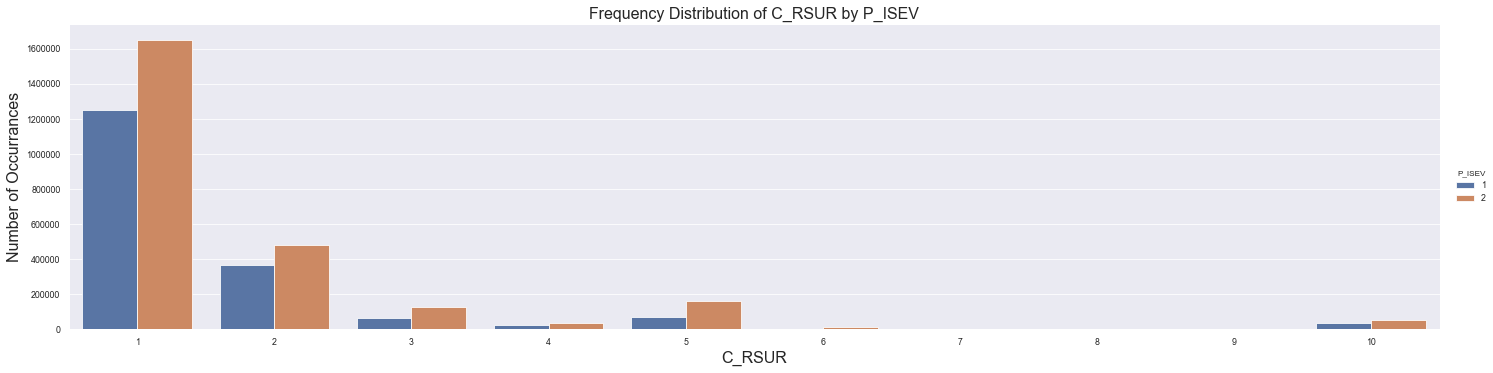

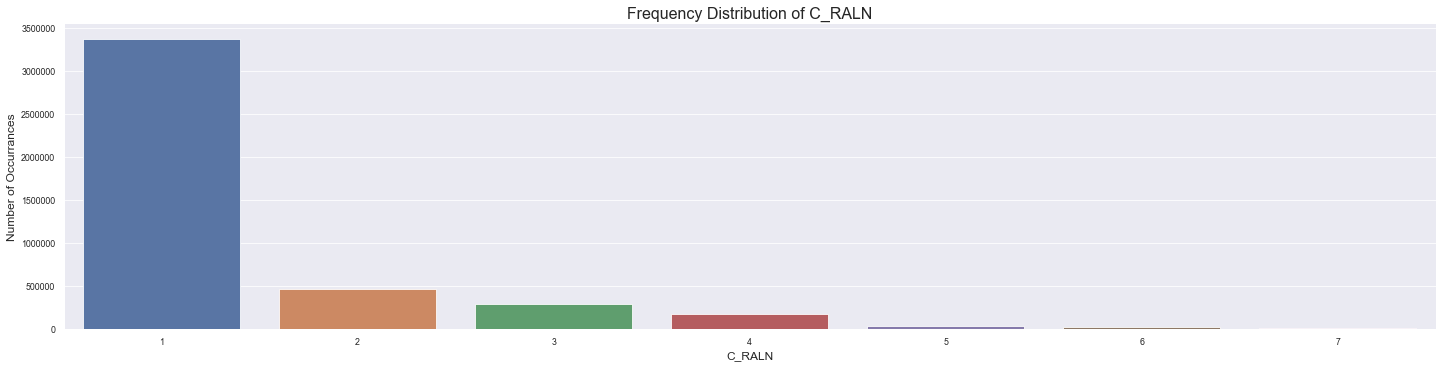

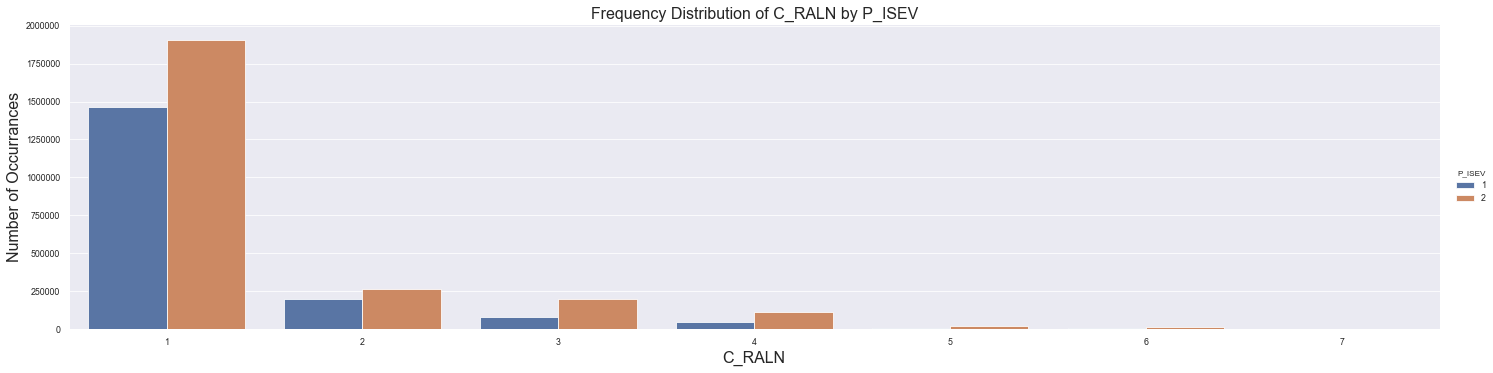

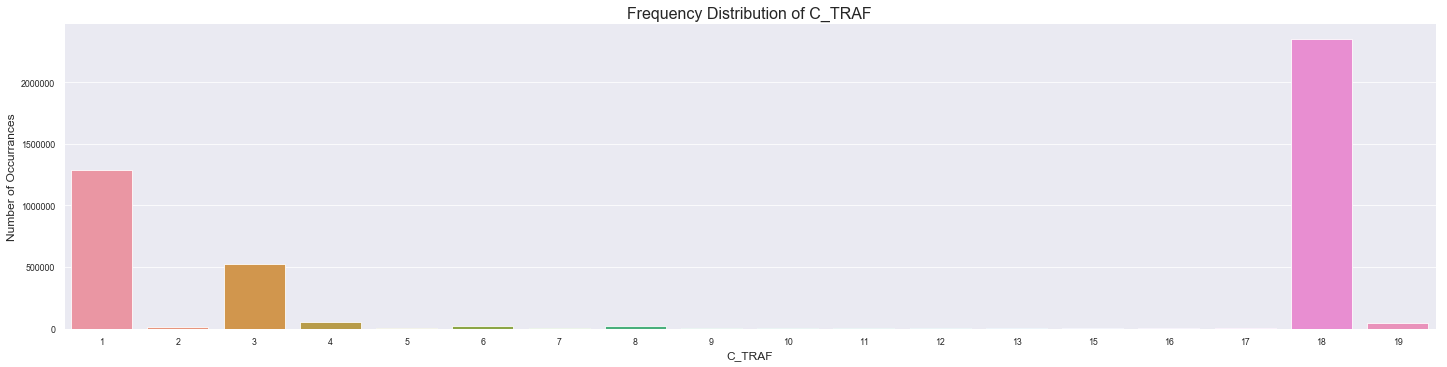

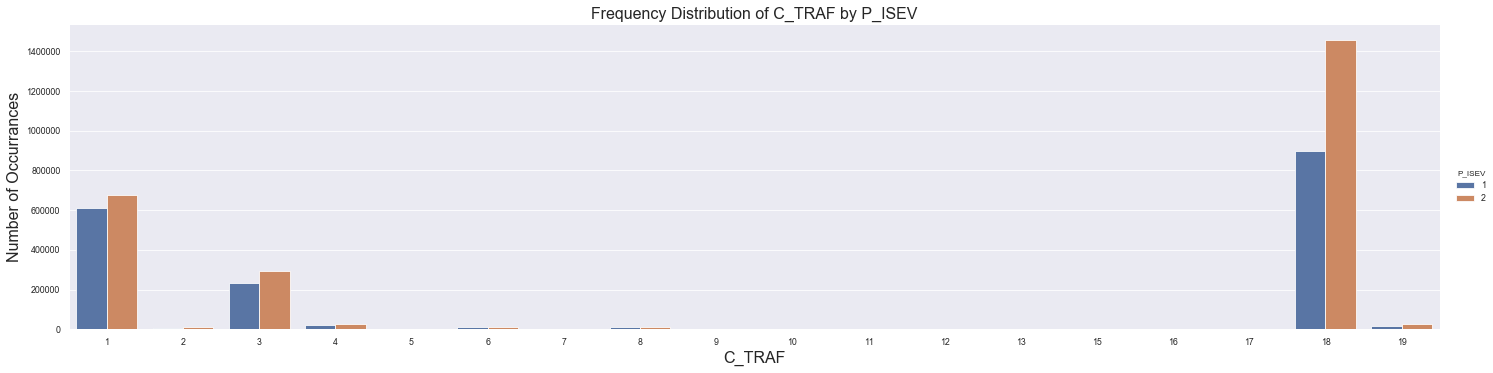

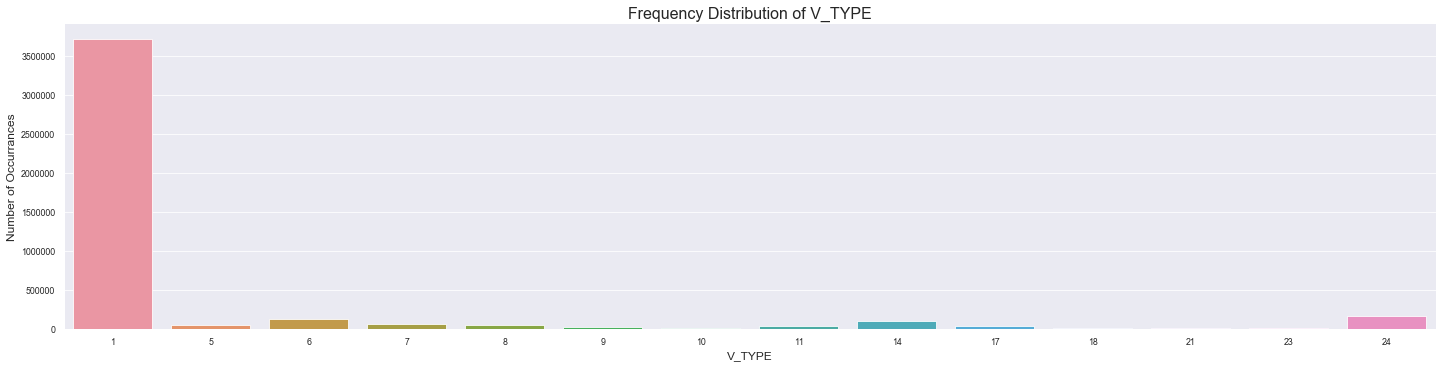

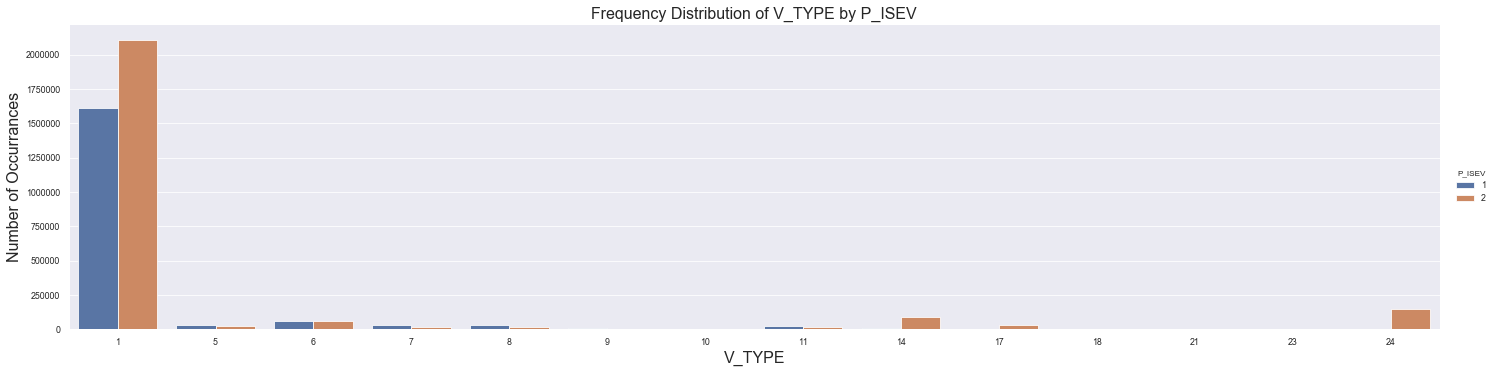

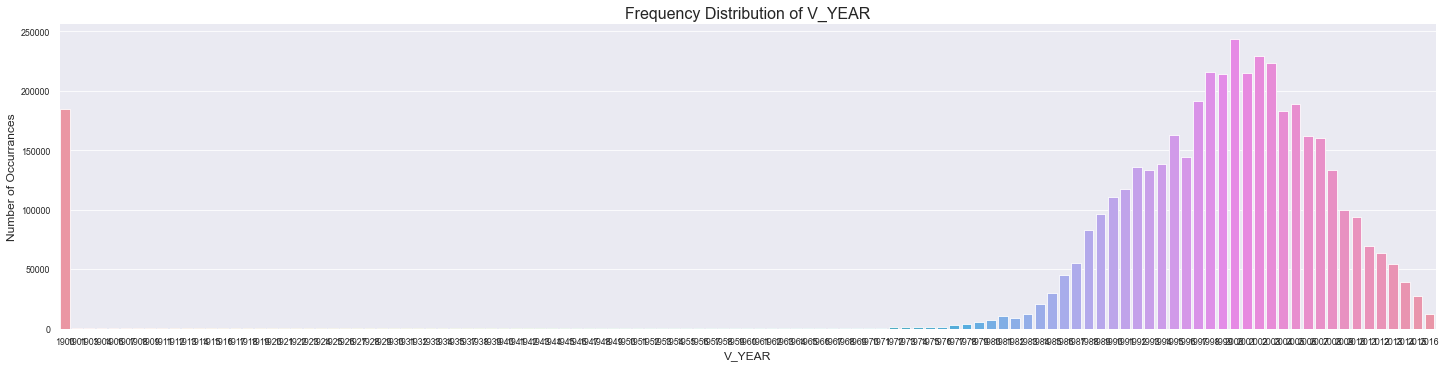

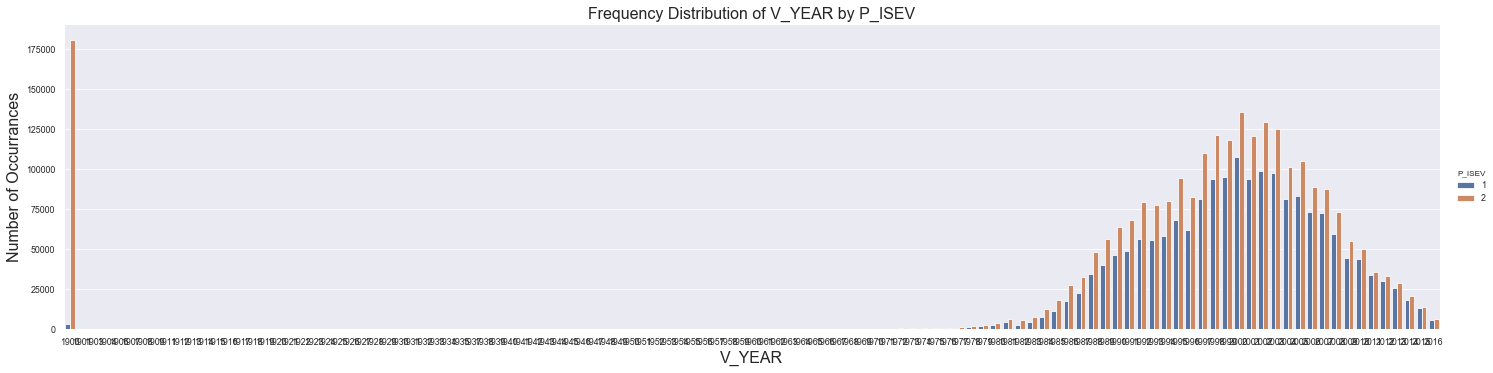

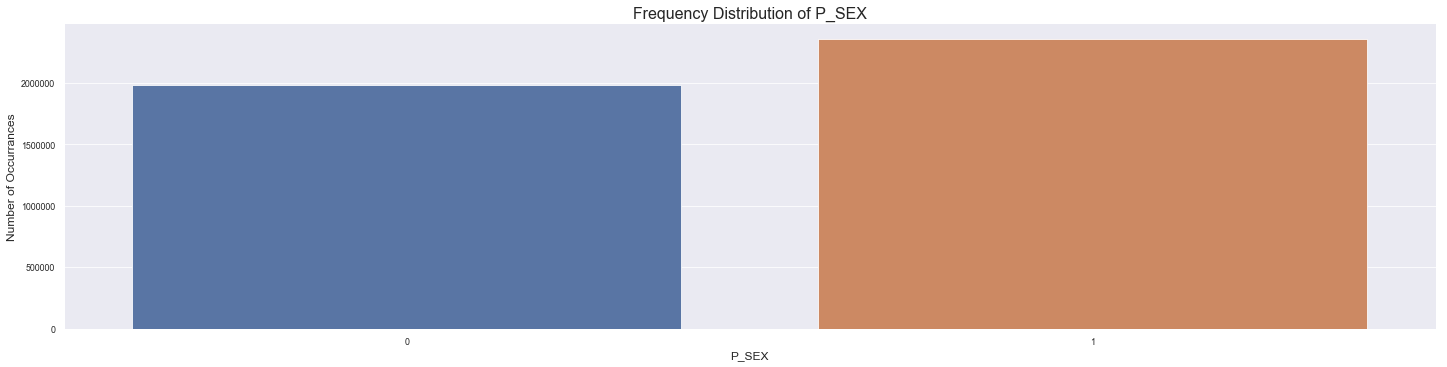

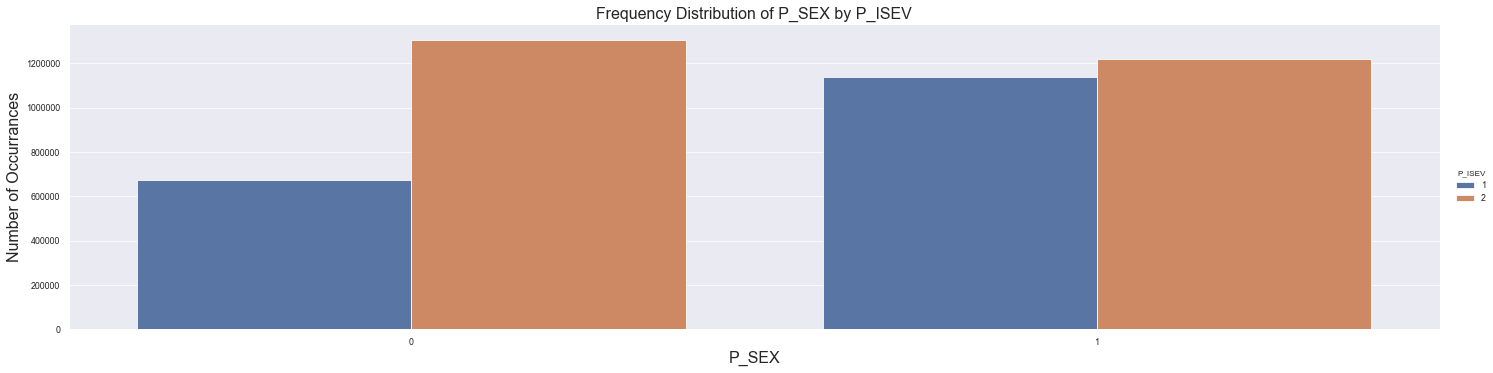

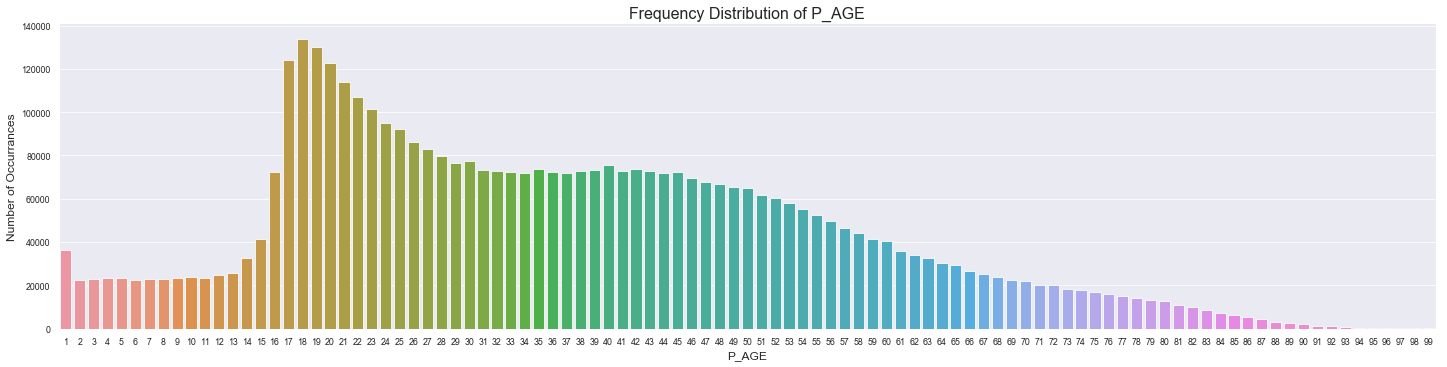

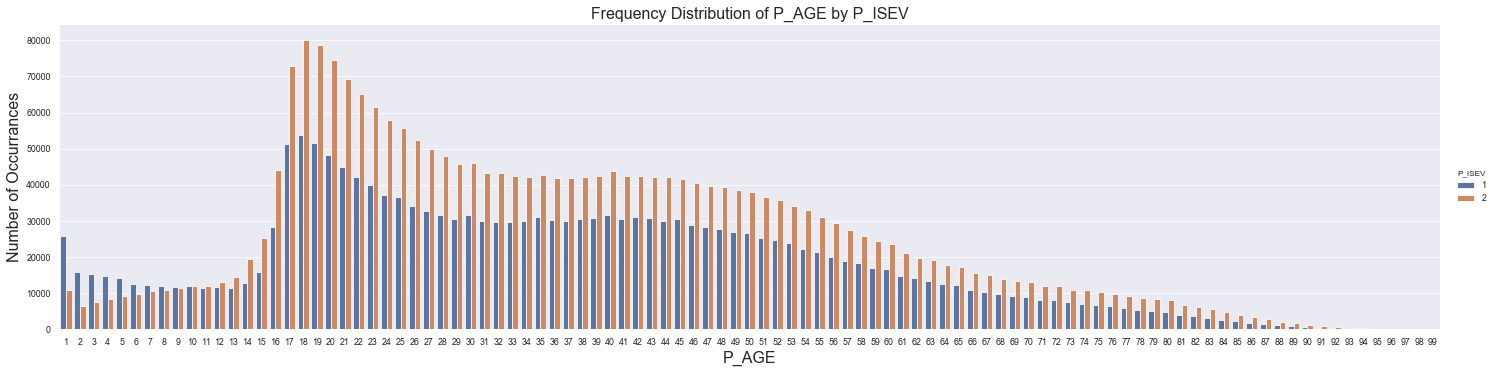

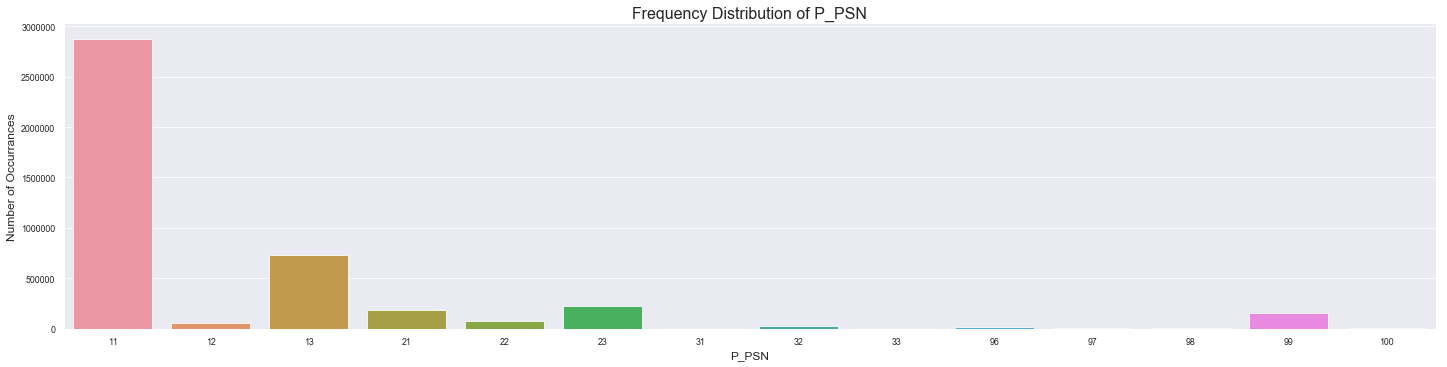

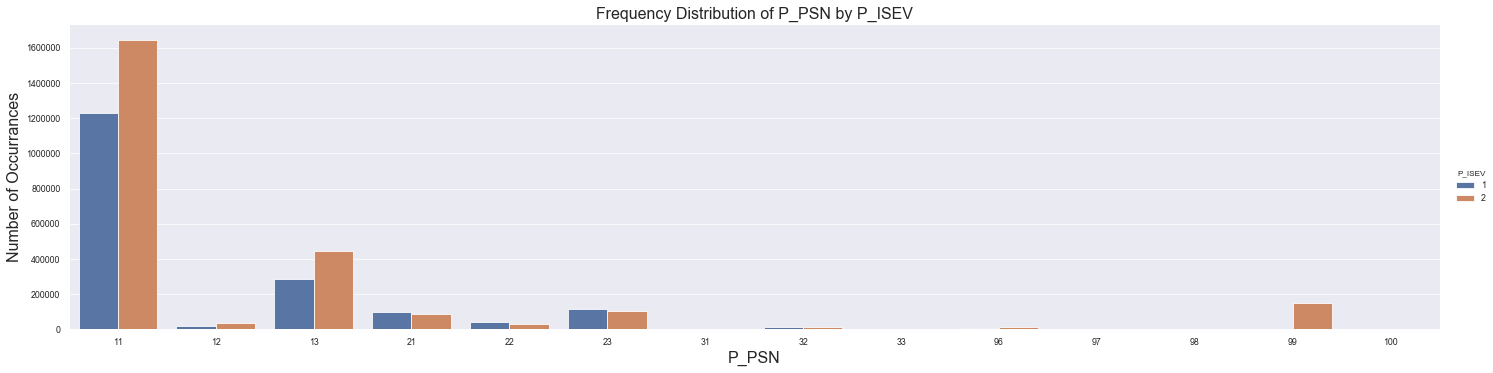

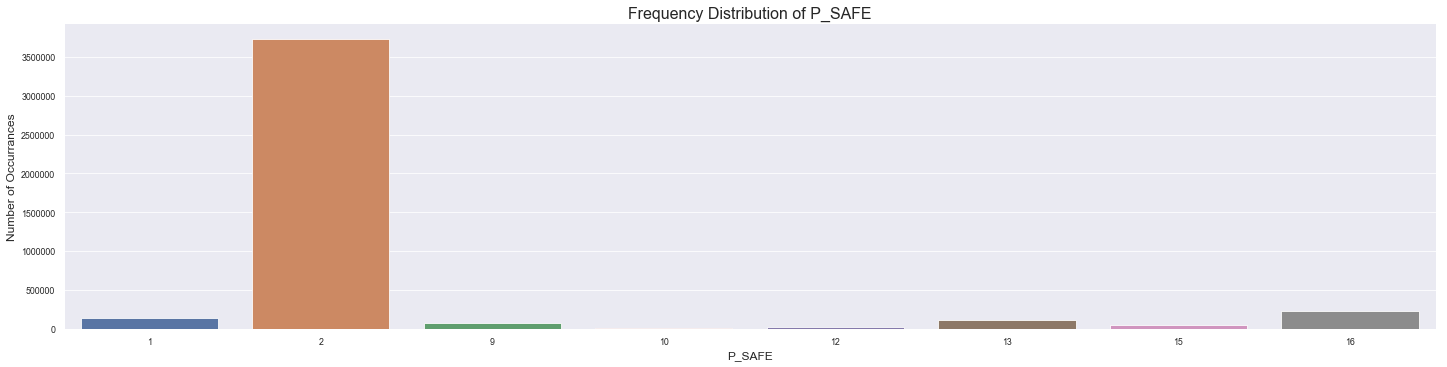

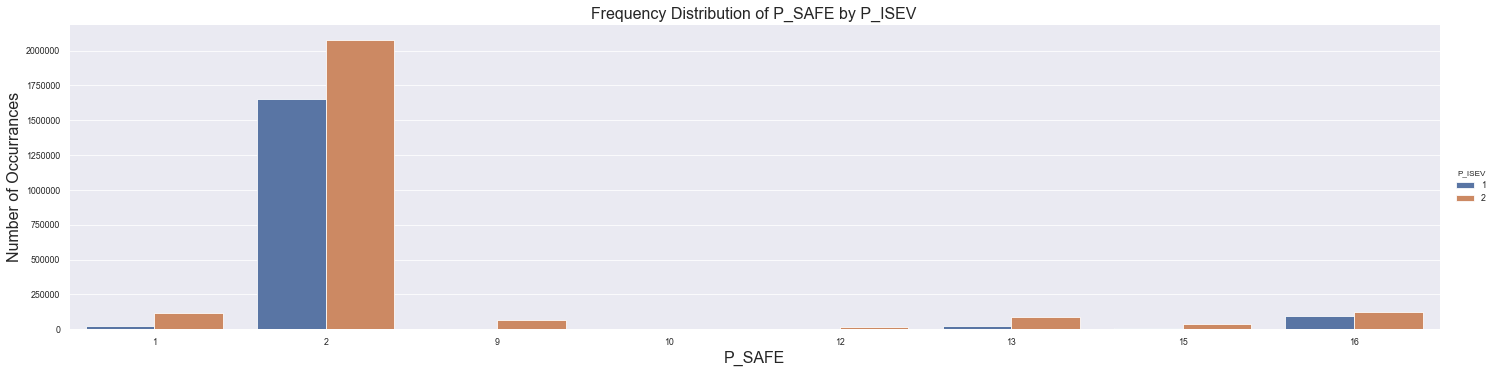

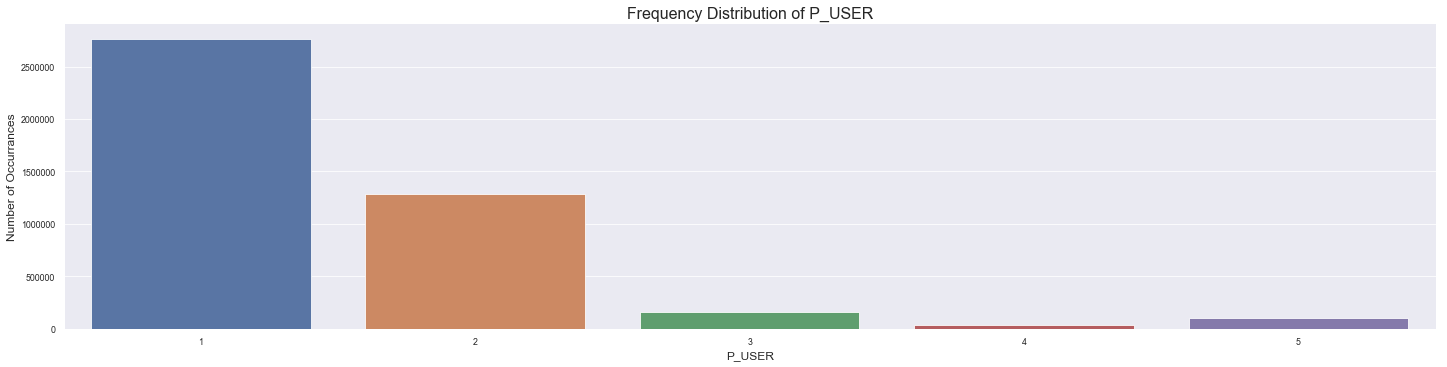

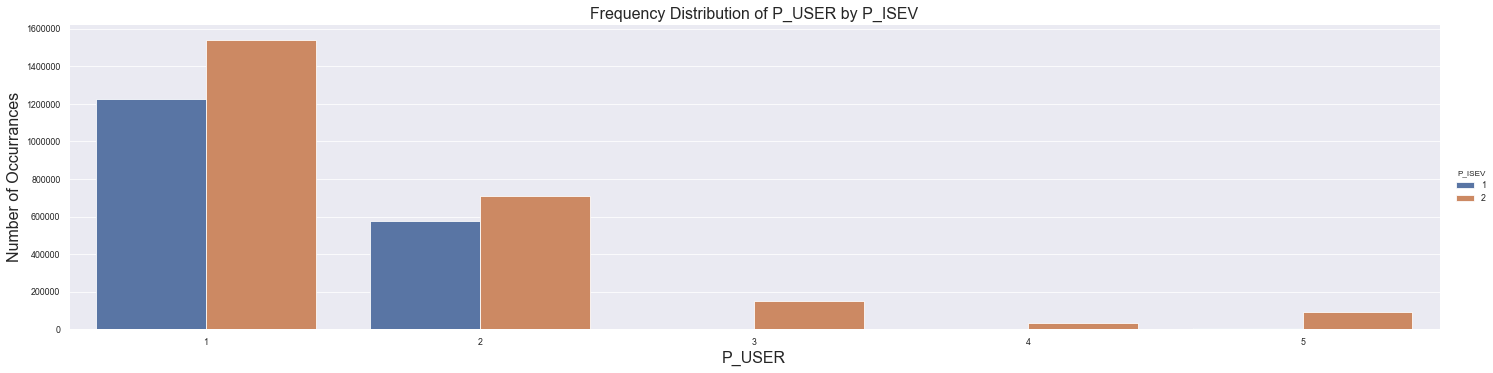

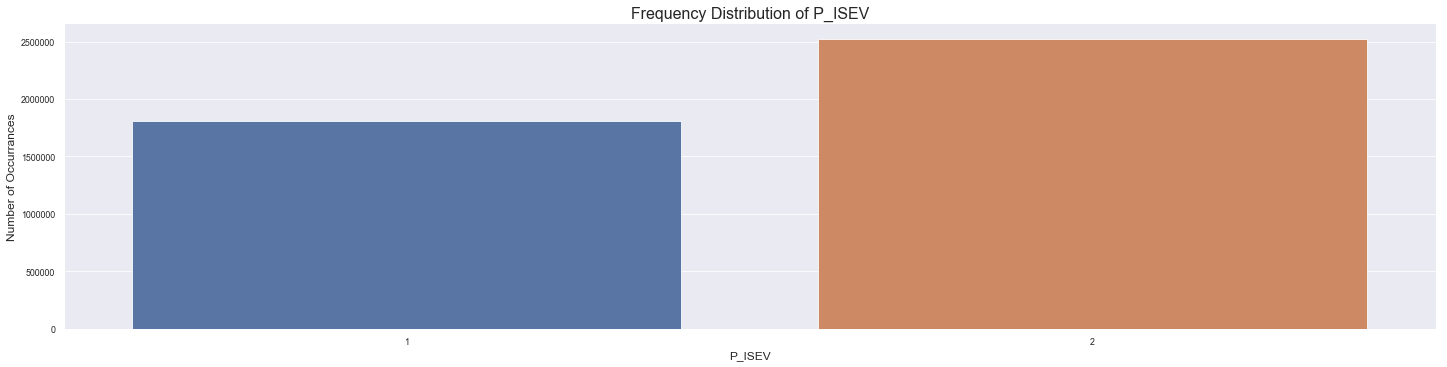

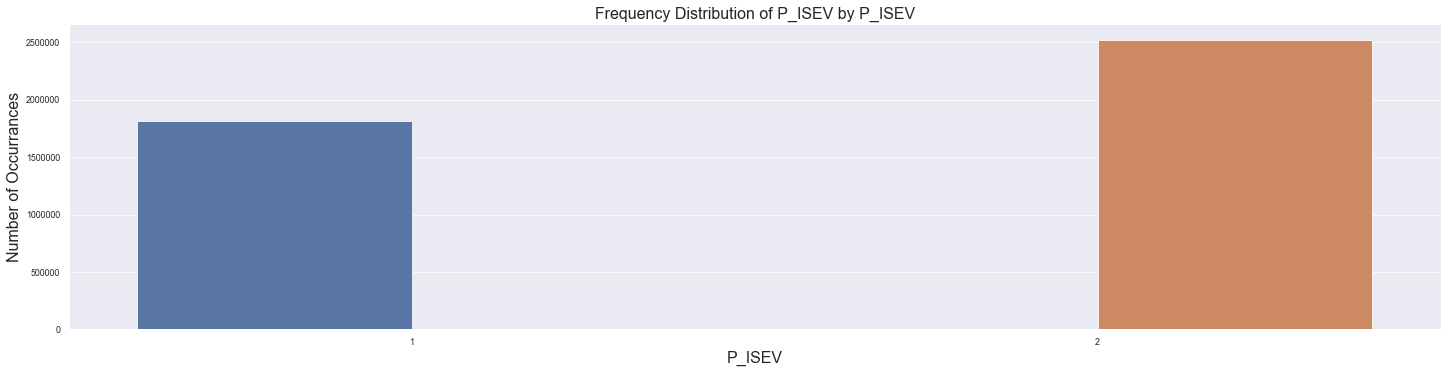

In [133]:
df_tmp = df_X.copy()
df_tmp['P_ISEV'] = df_Yb
for col in df_tmp.columns:
    g = sns.catplot(x = col, data=df_tmp, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    
    h = sns.catplot(col, data=df_tmp, kind="count", legend = True, height = 5, aspect = 4, hue = 'P_ISEV')
    h.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0} by P_ISEV'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.show()

### Box Plot

C:\Users\pradeep\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


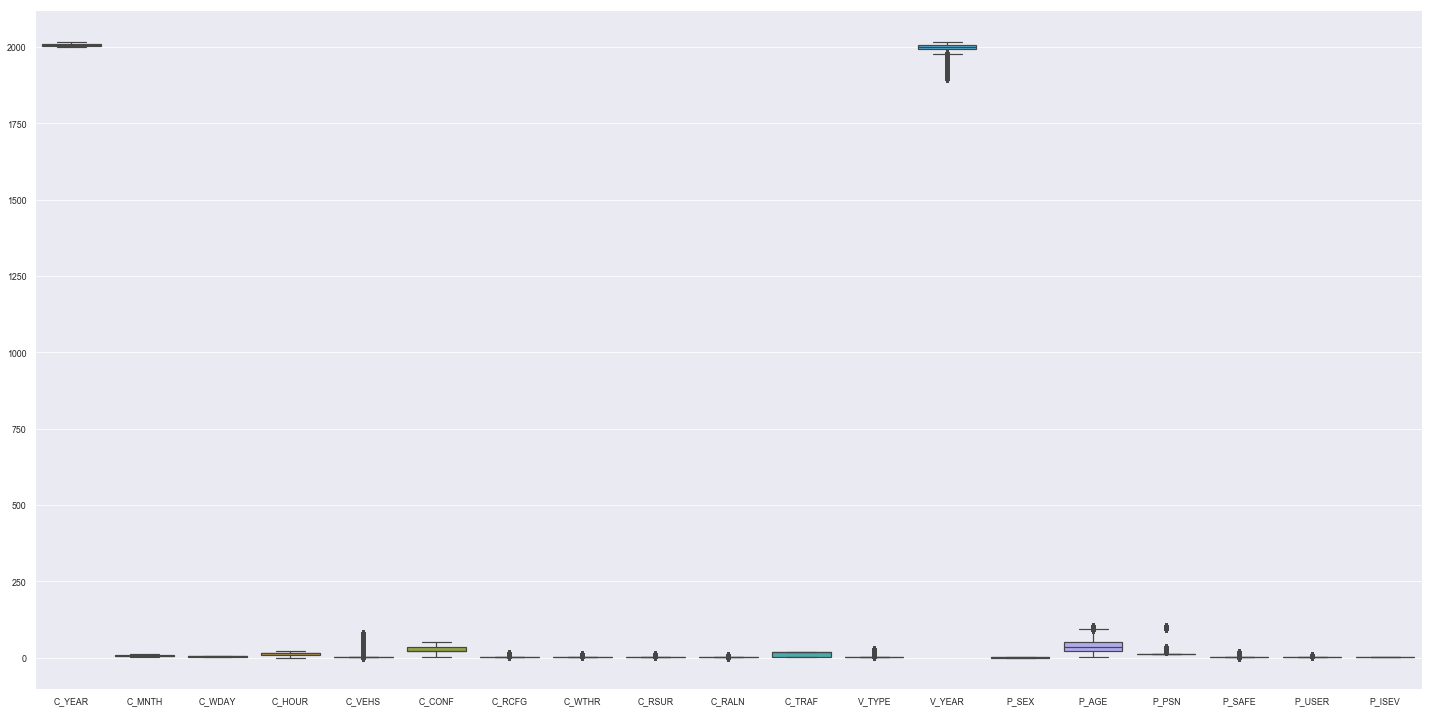

<Figure size 360x720 with 0 Axes>

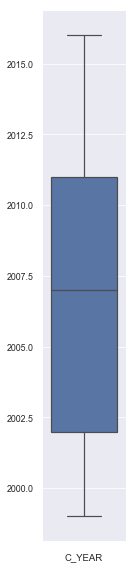

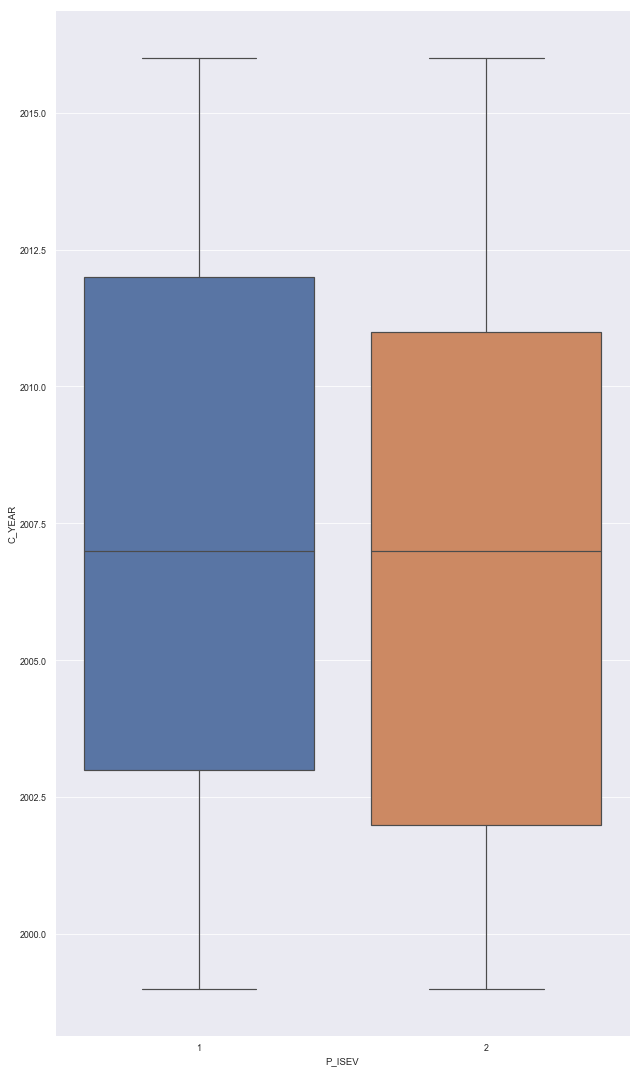

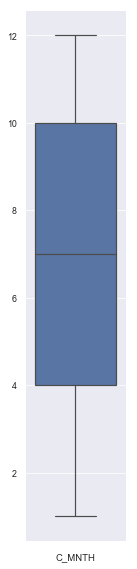

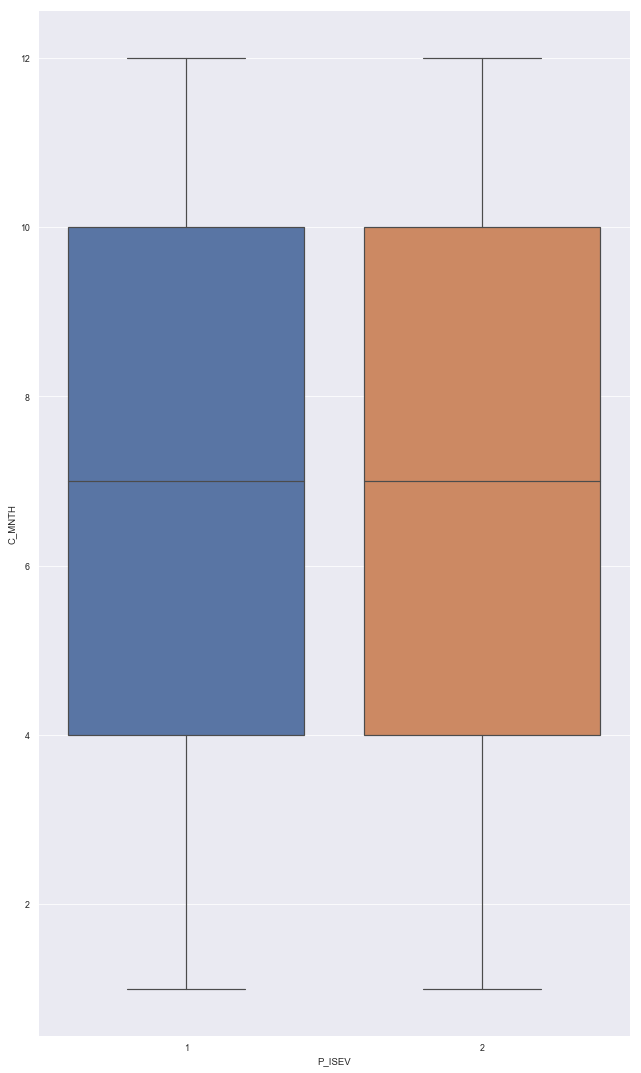

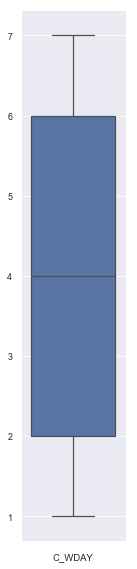

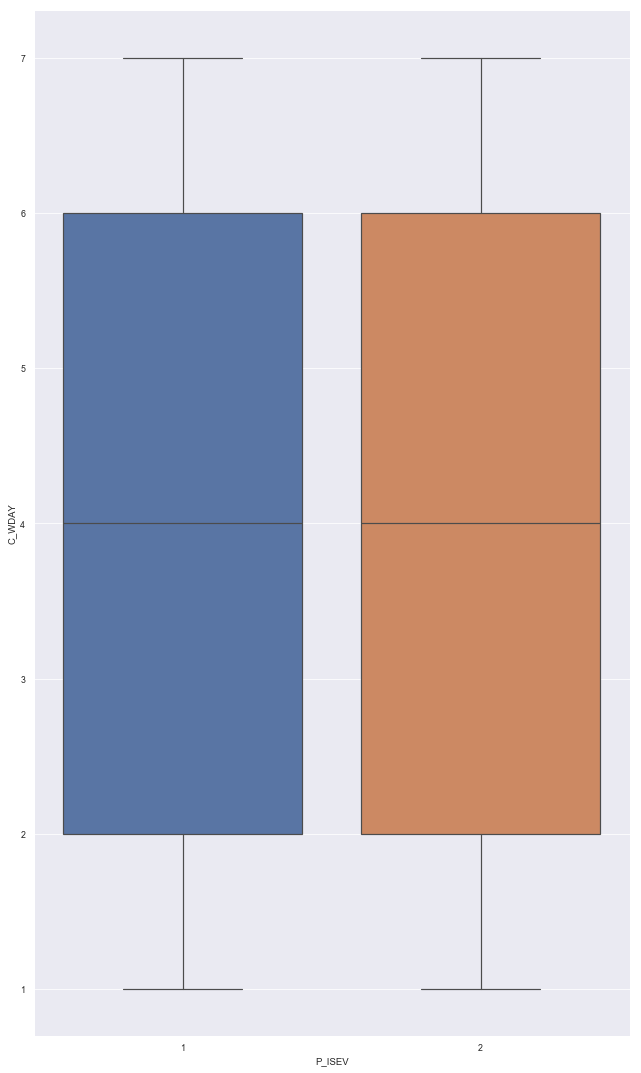

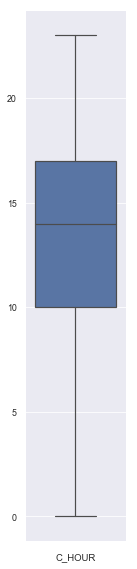

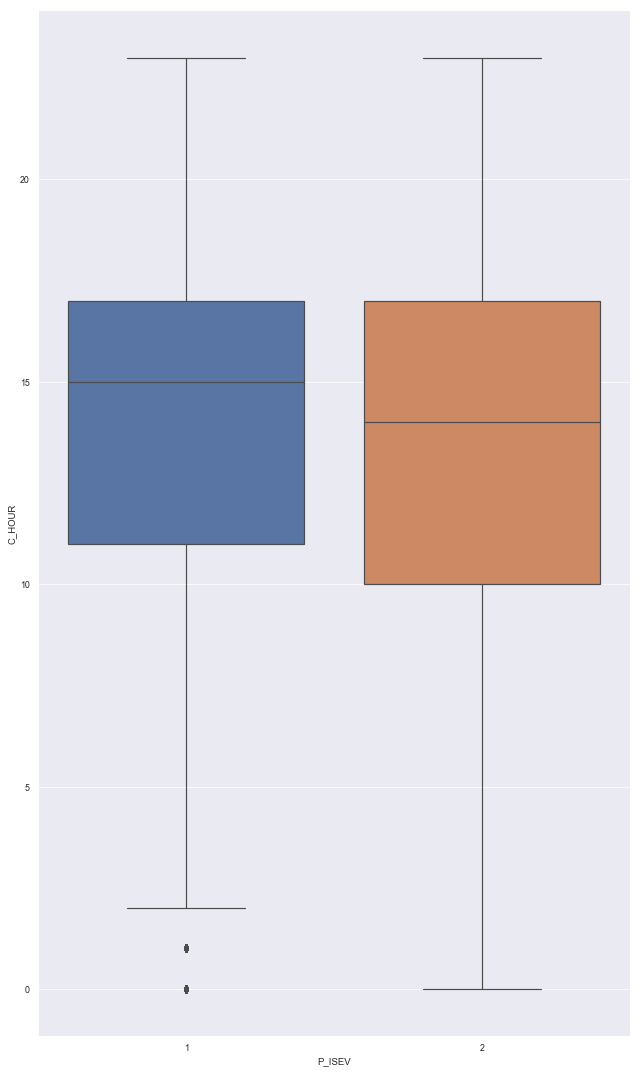

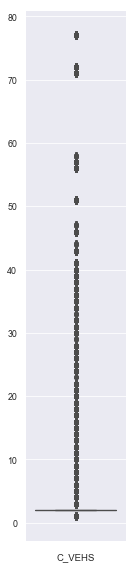

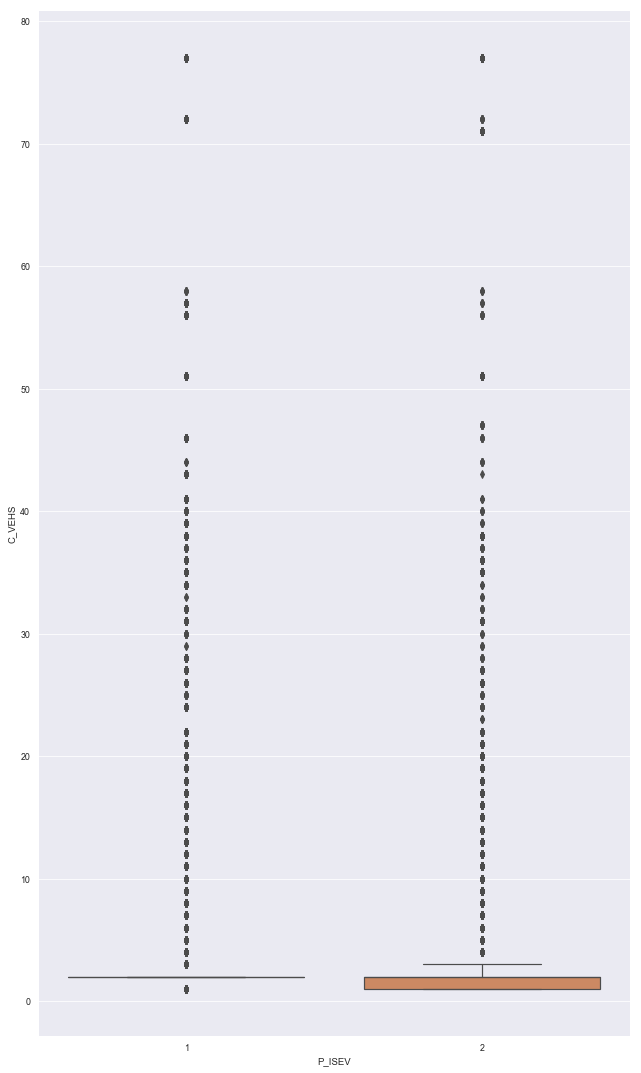

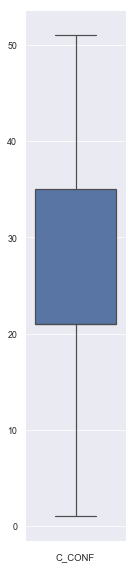

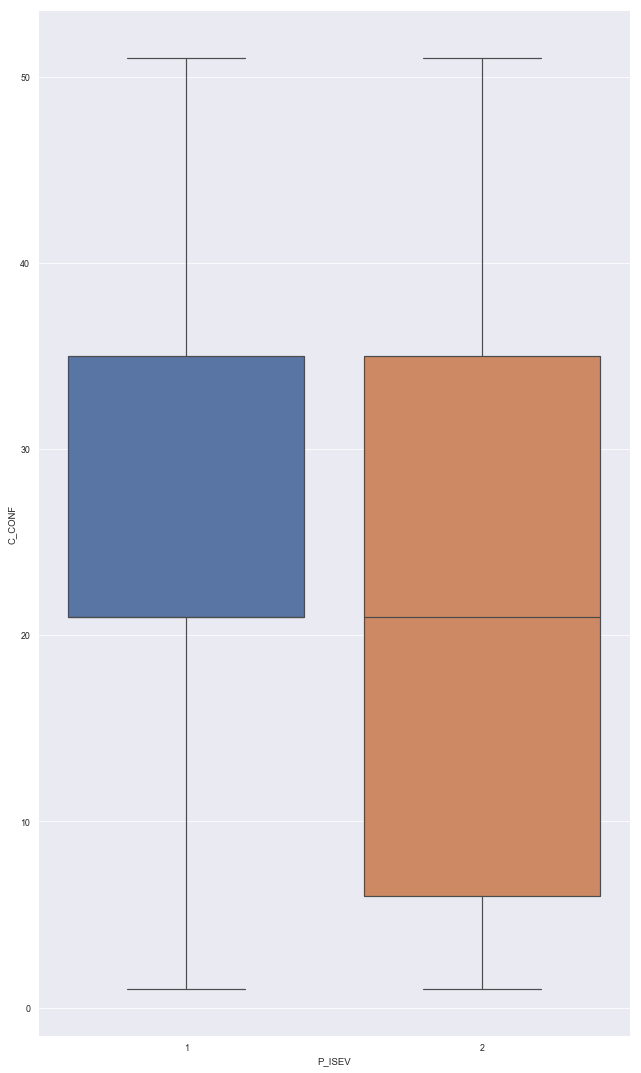

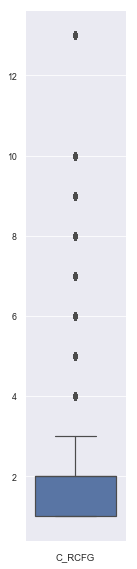

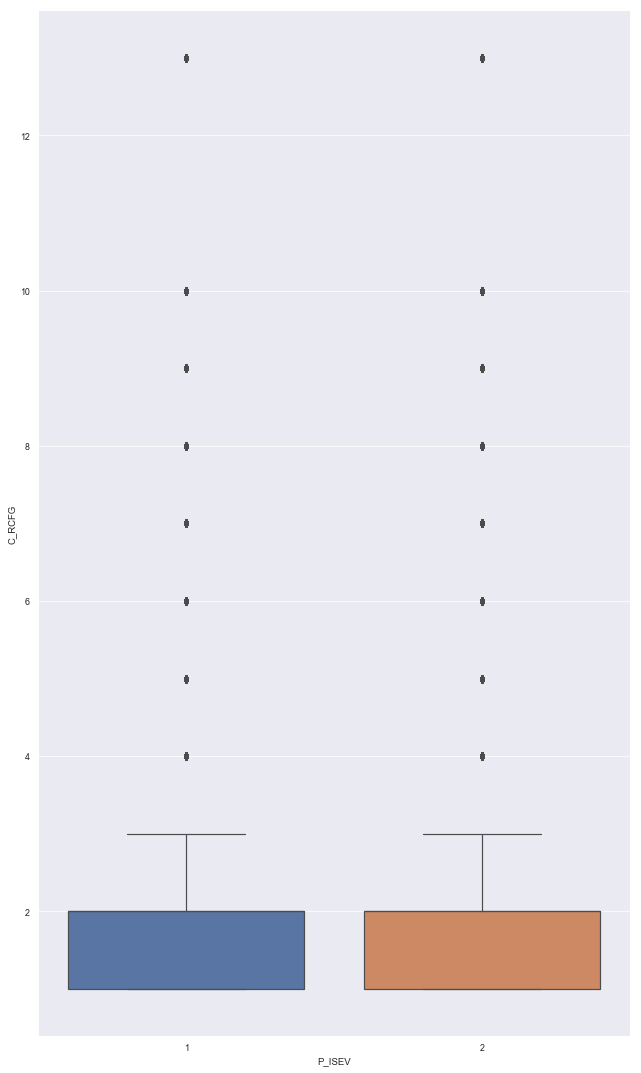

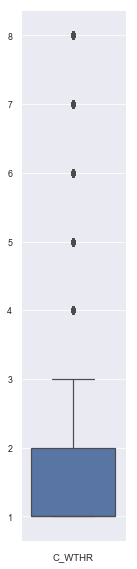

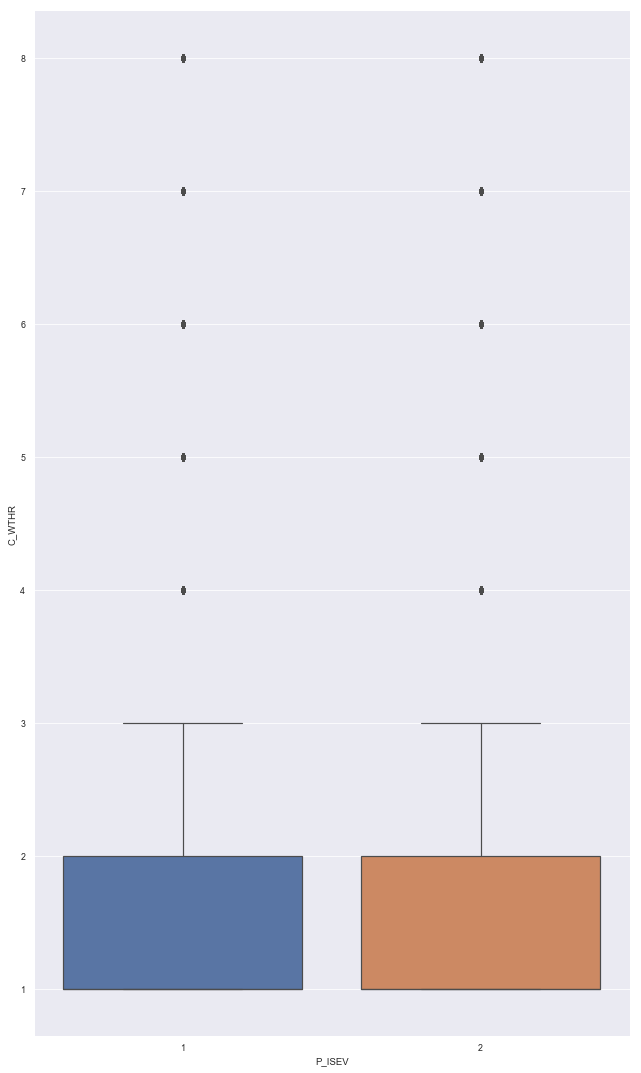

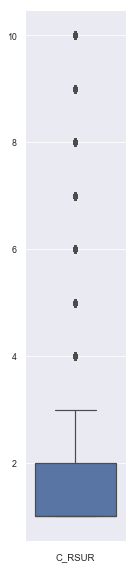

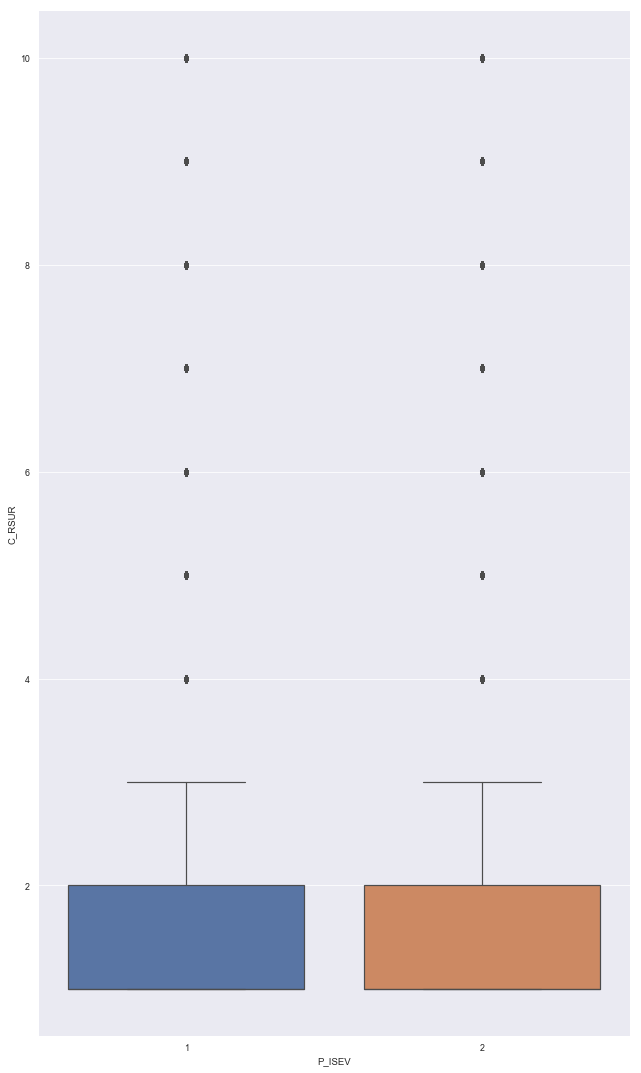

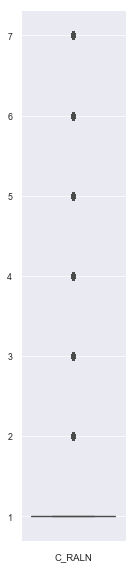

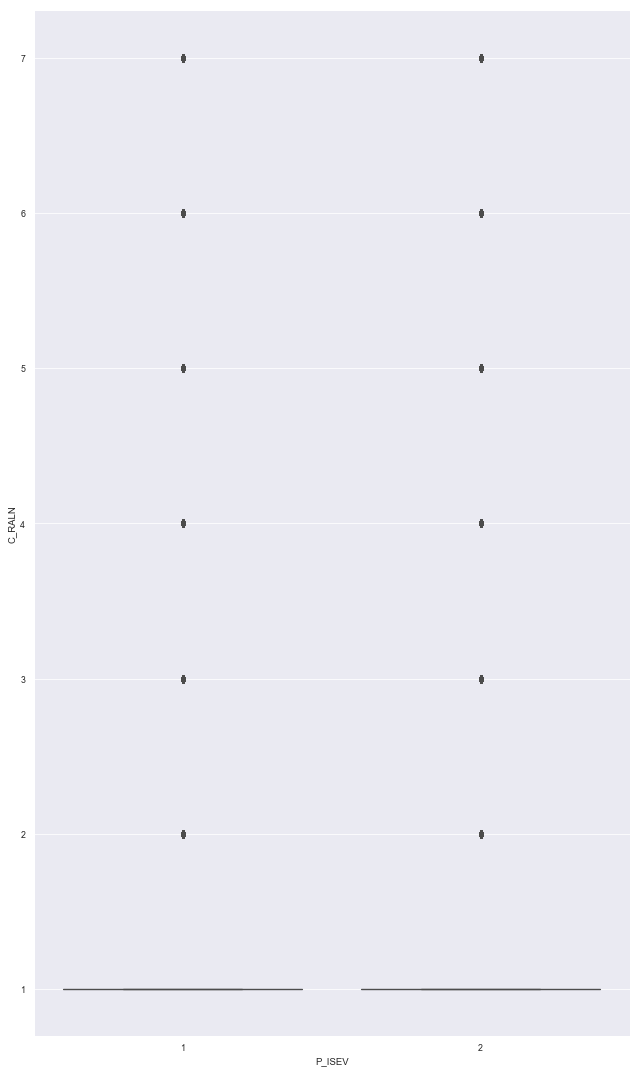

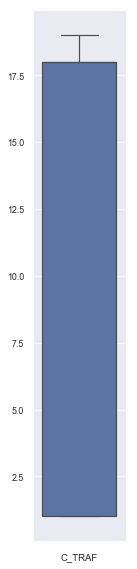

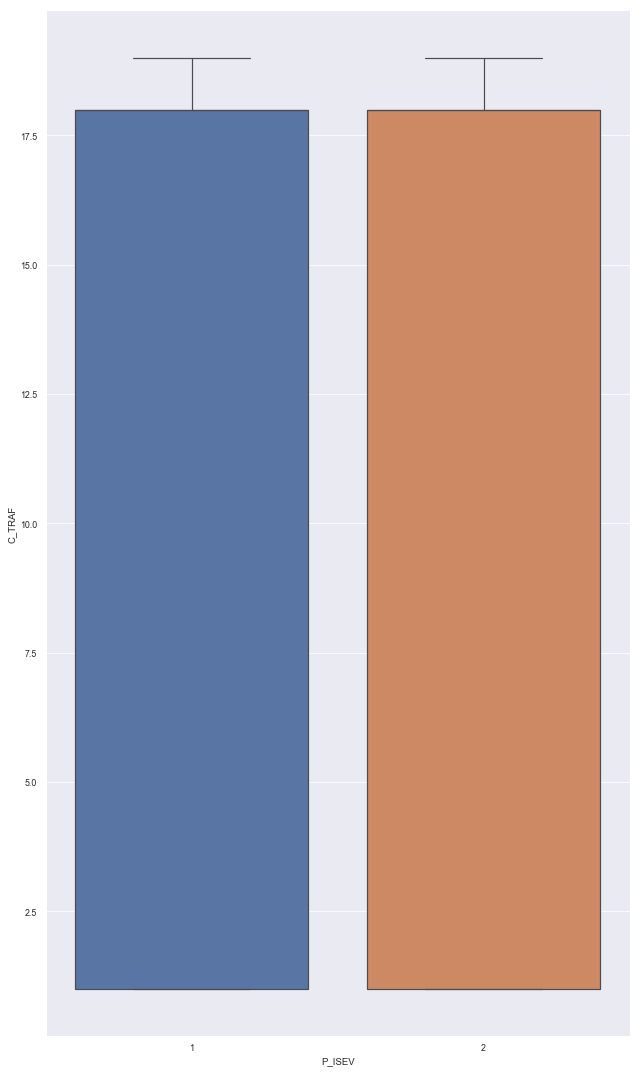

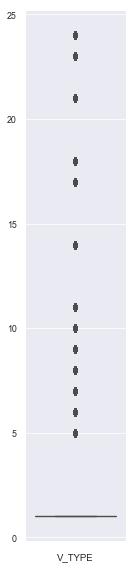

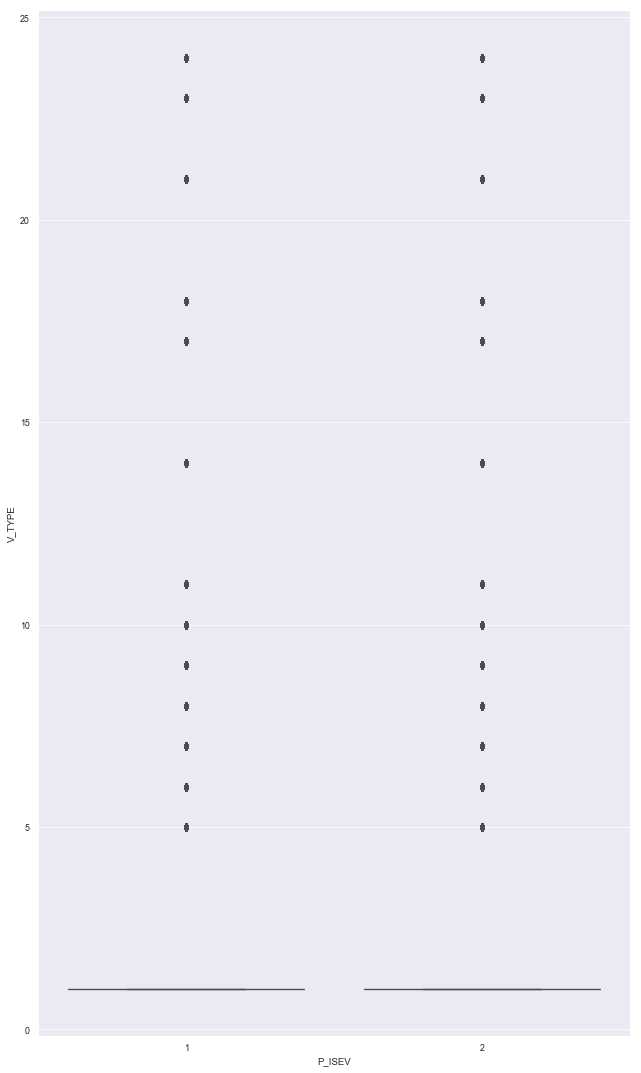

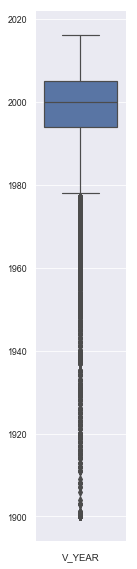

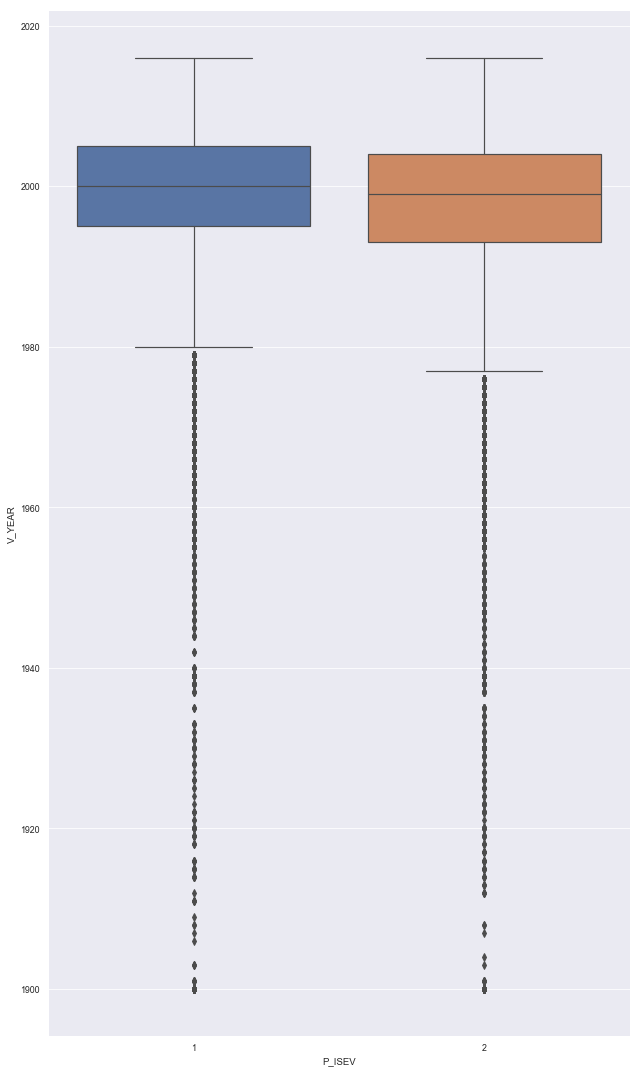

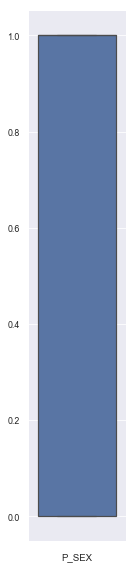

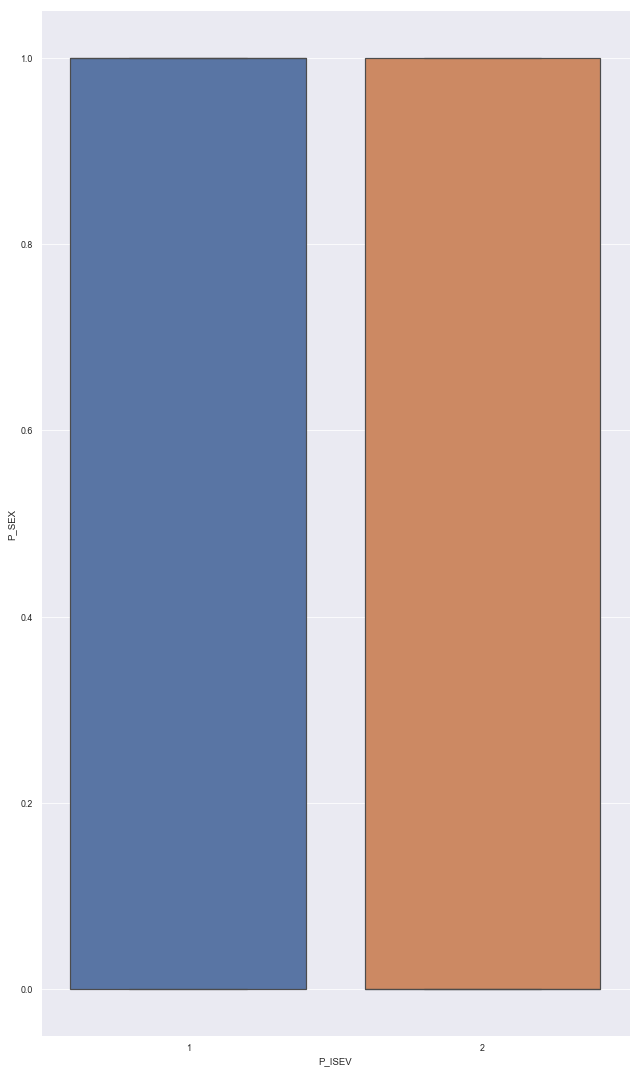

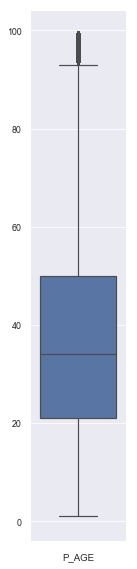

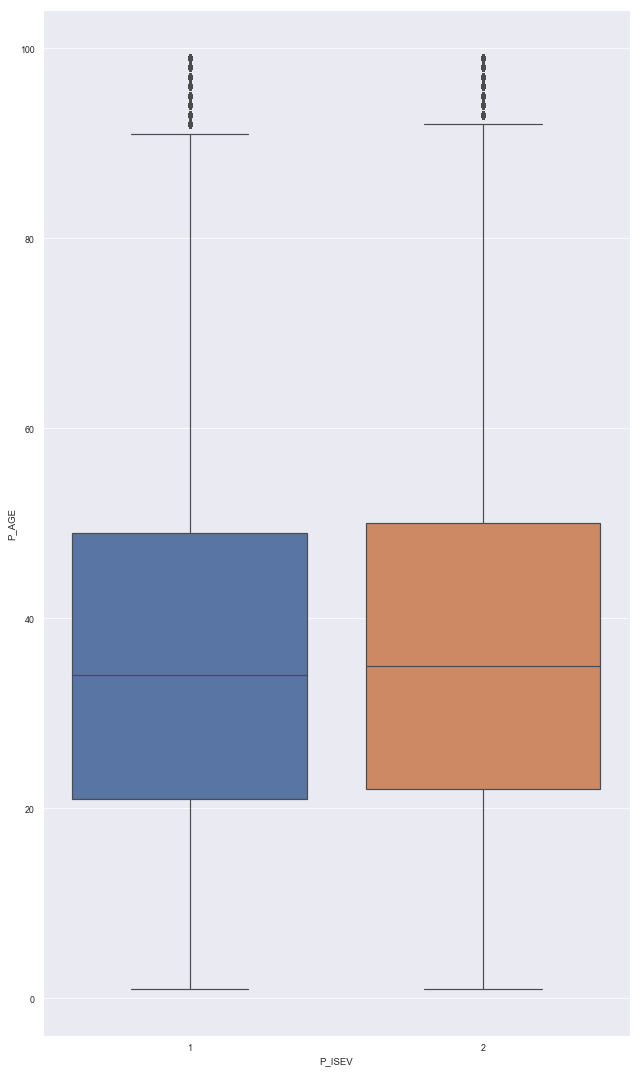

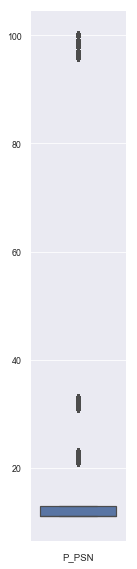

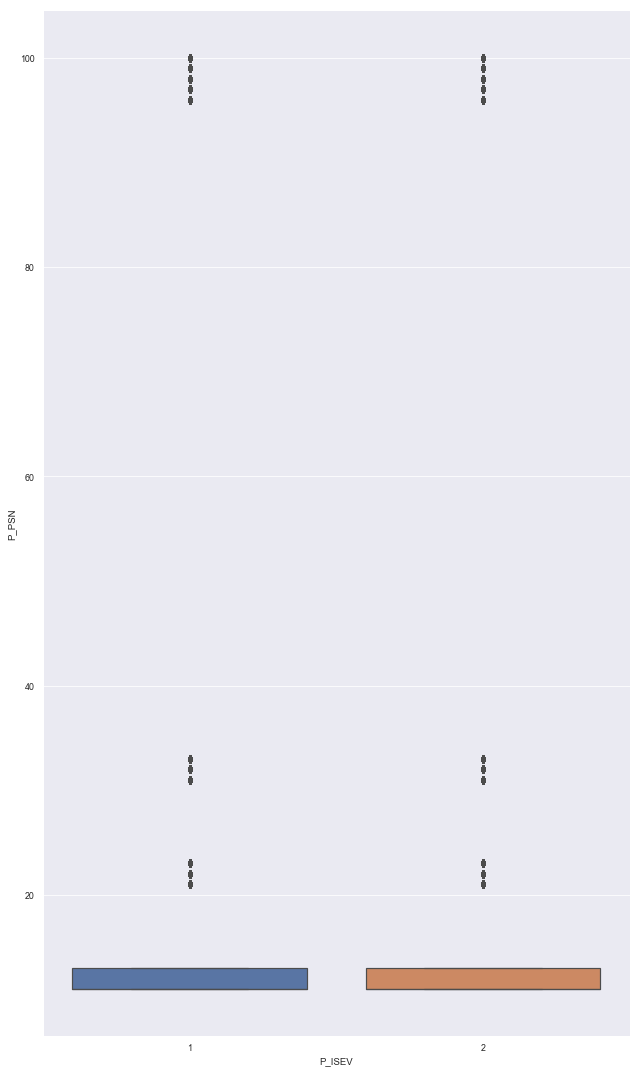

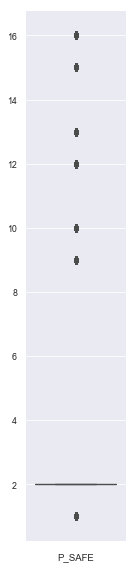

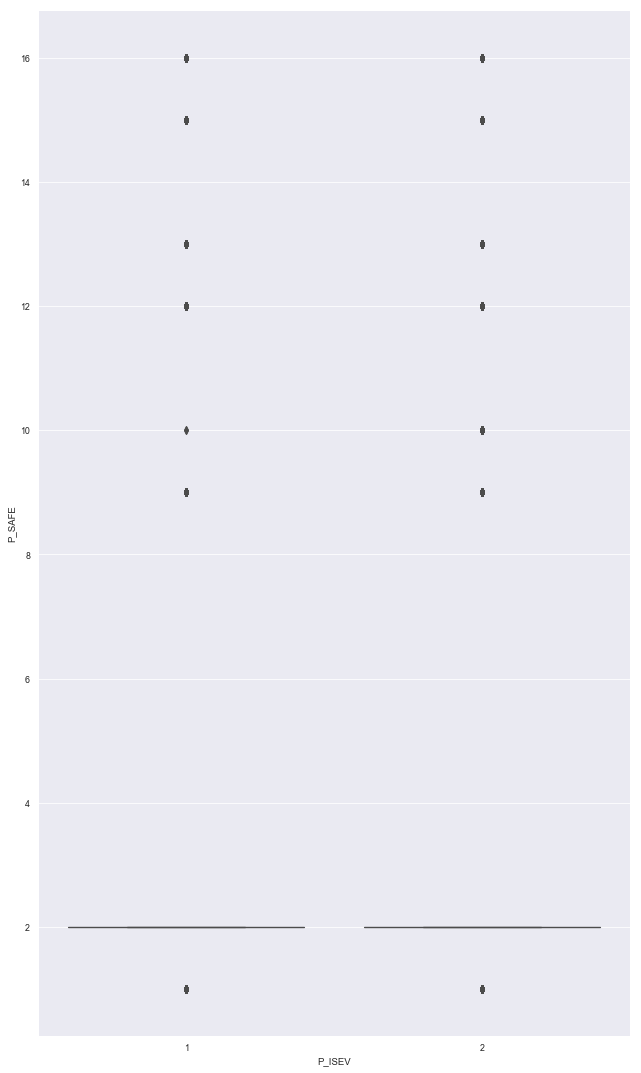

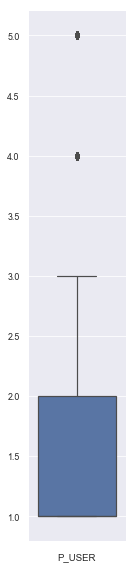

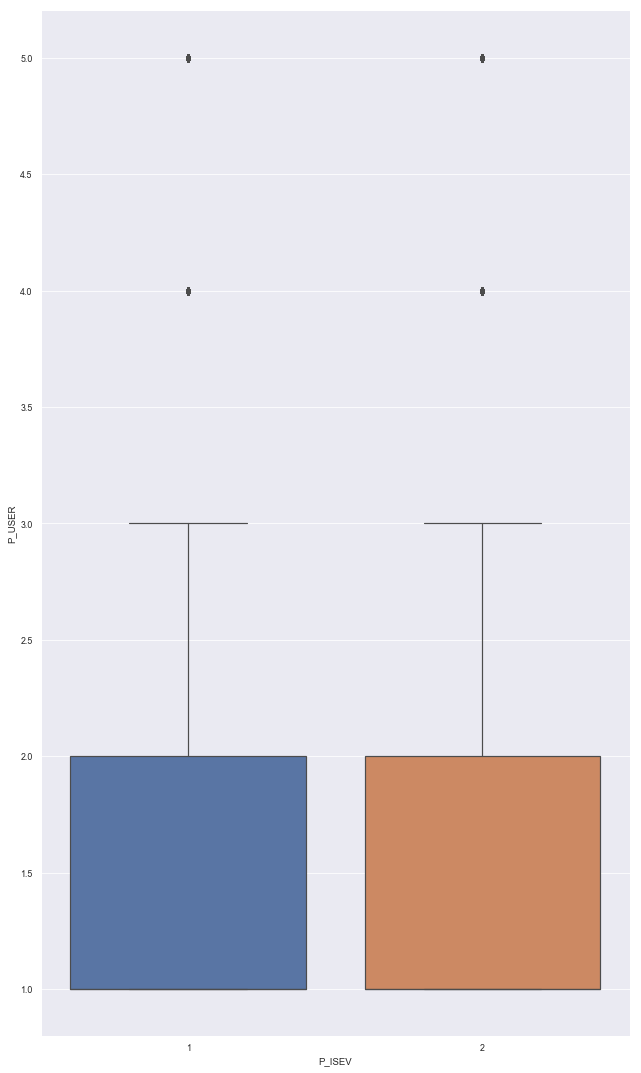

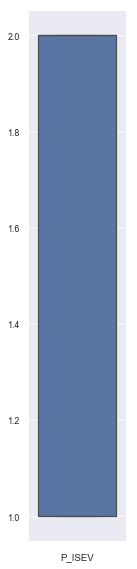

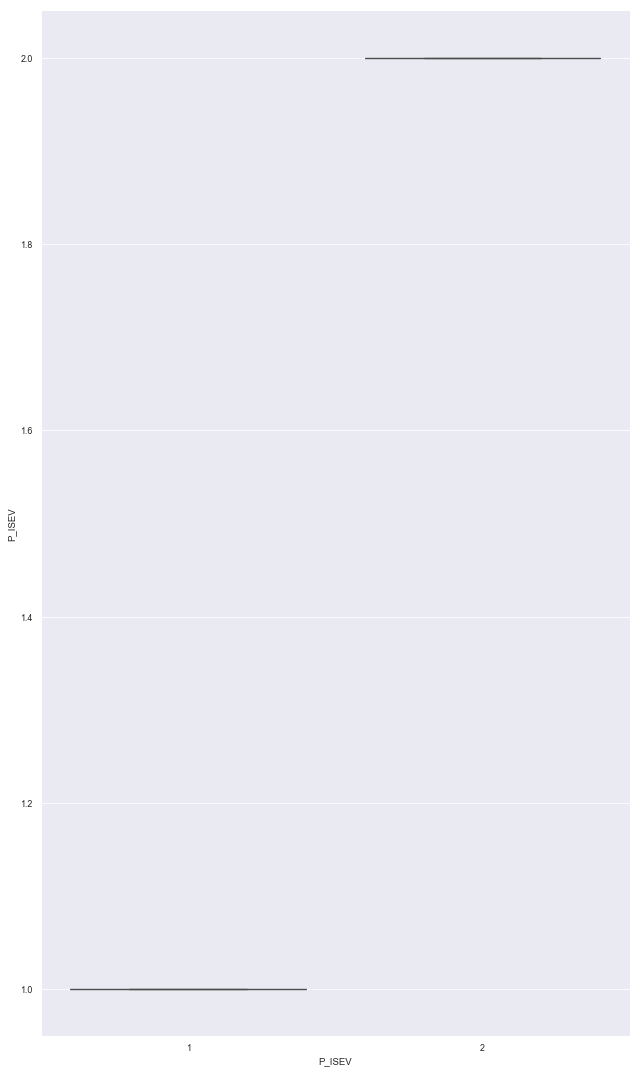

In [134]:
g = sns.catplot(data=df_tmp, kind="box", orient="v", height = 10, aspect = 2)
g.set_xticklabels(step=1)

plt.figure(figsize=(5,10))
for col in df.columns:
    g = sns.catplot(col, data=df_tmp, kind="box", orient="v", height = 8, aspect = 0.25)
    g.set_xticklabels(step=1)
    
    h = sns.catplot(x = 'P_ISEV', y = col, data=df_tmp, kind="box", orient="v", height = 15, aspect = 0.6, legend = True)
    h.set_xticklabels(step=1)

<Figure size 864x864 with 0 Axes>

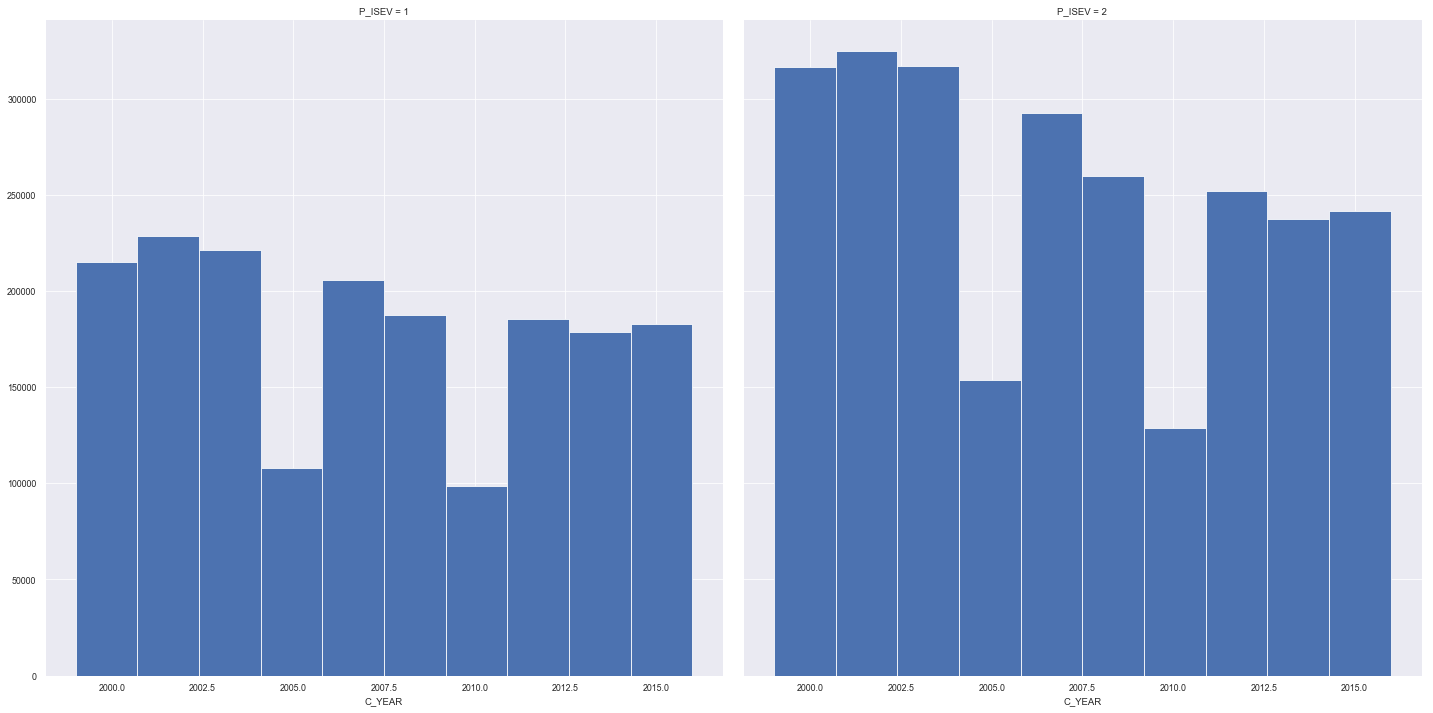

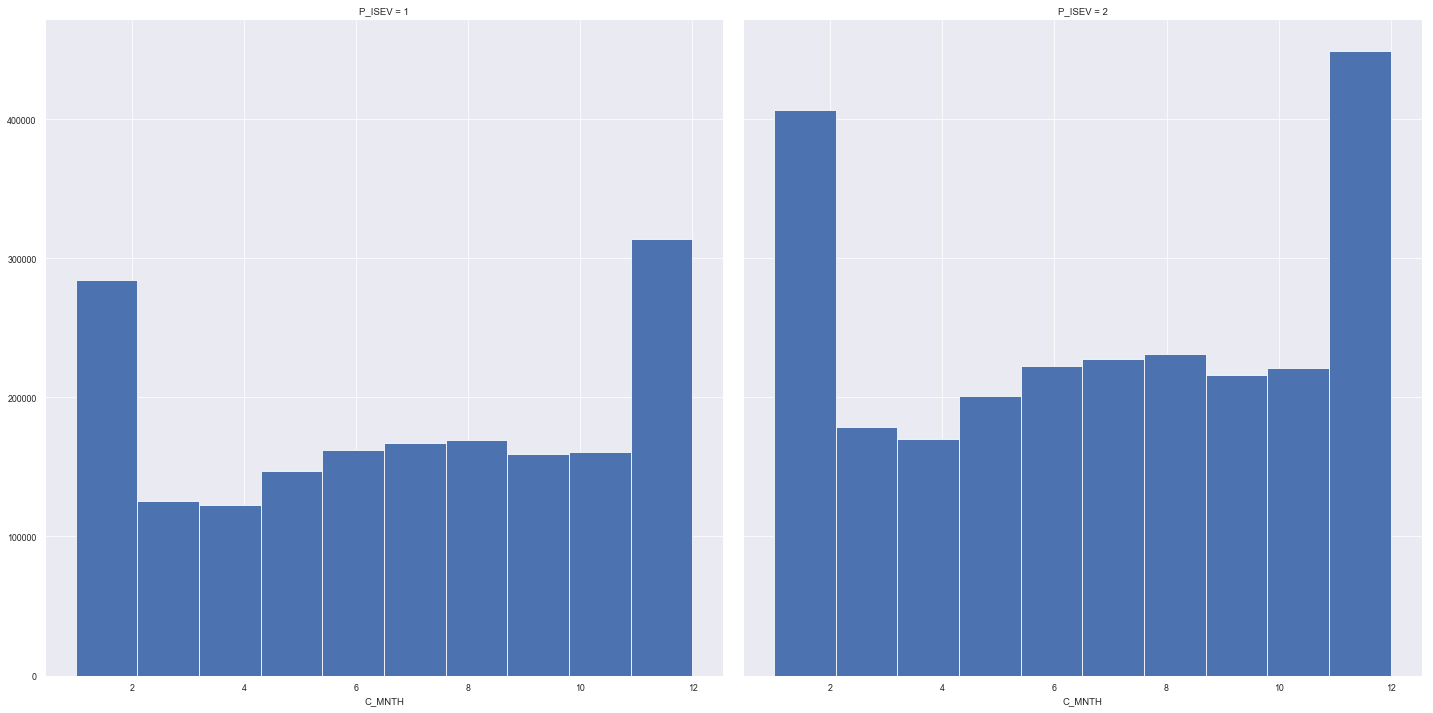

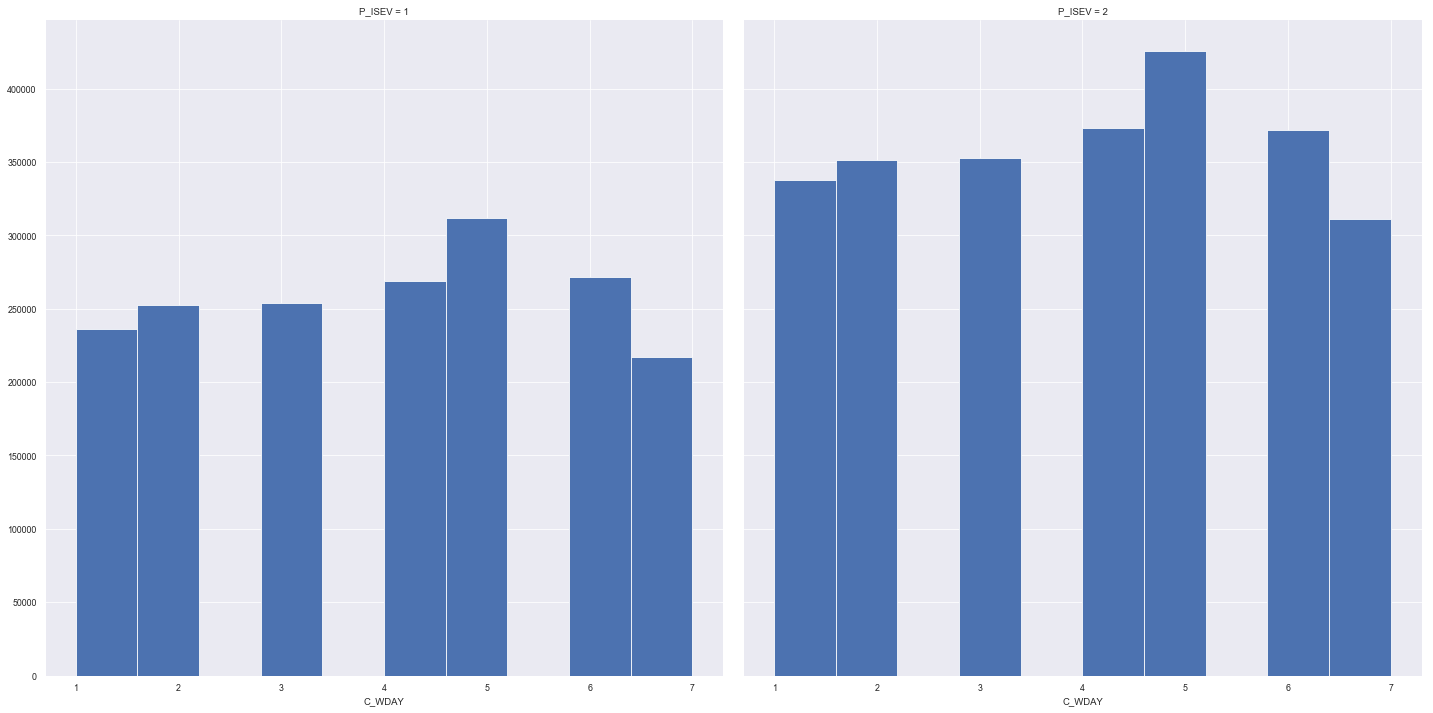

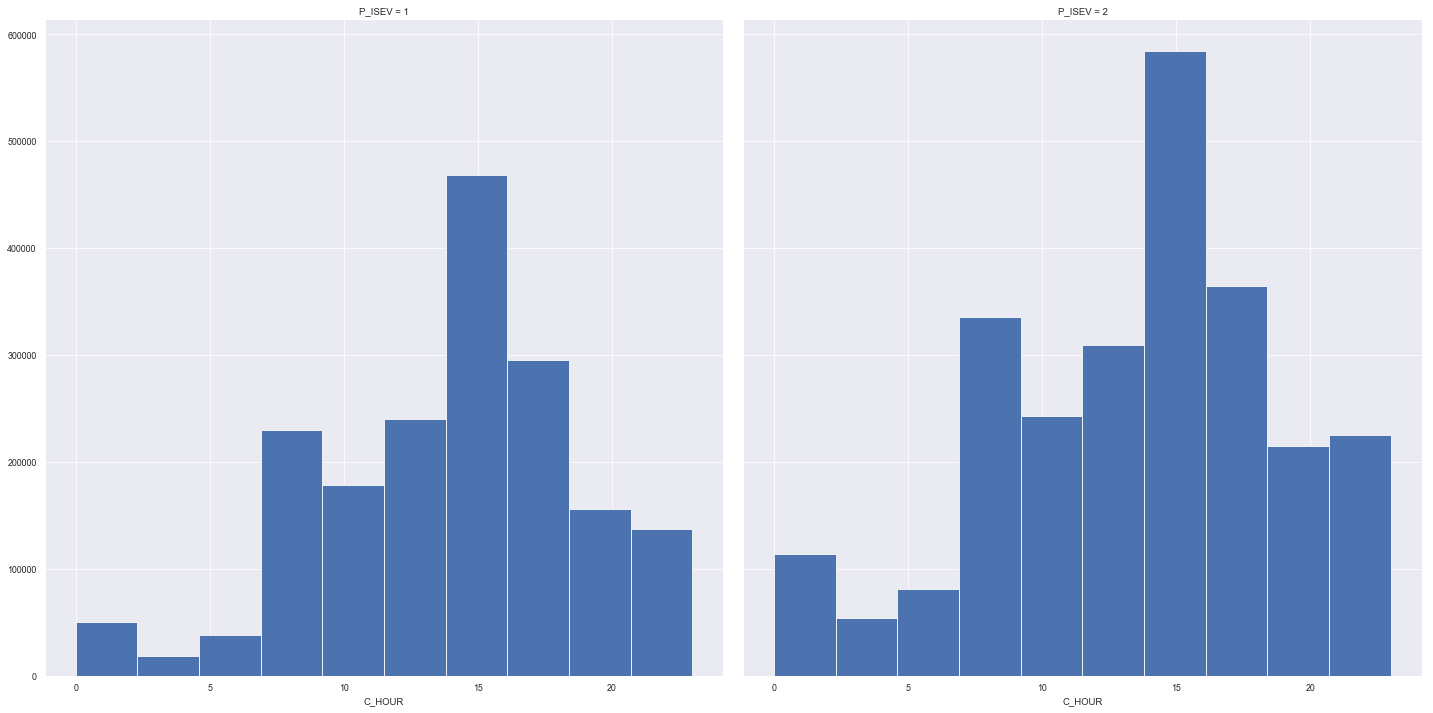

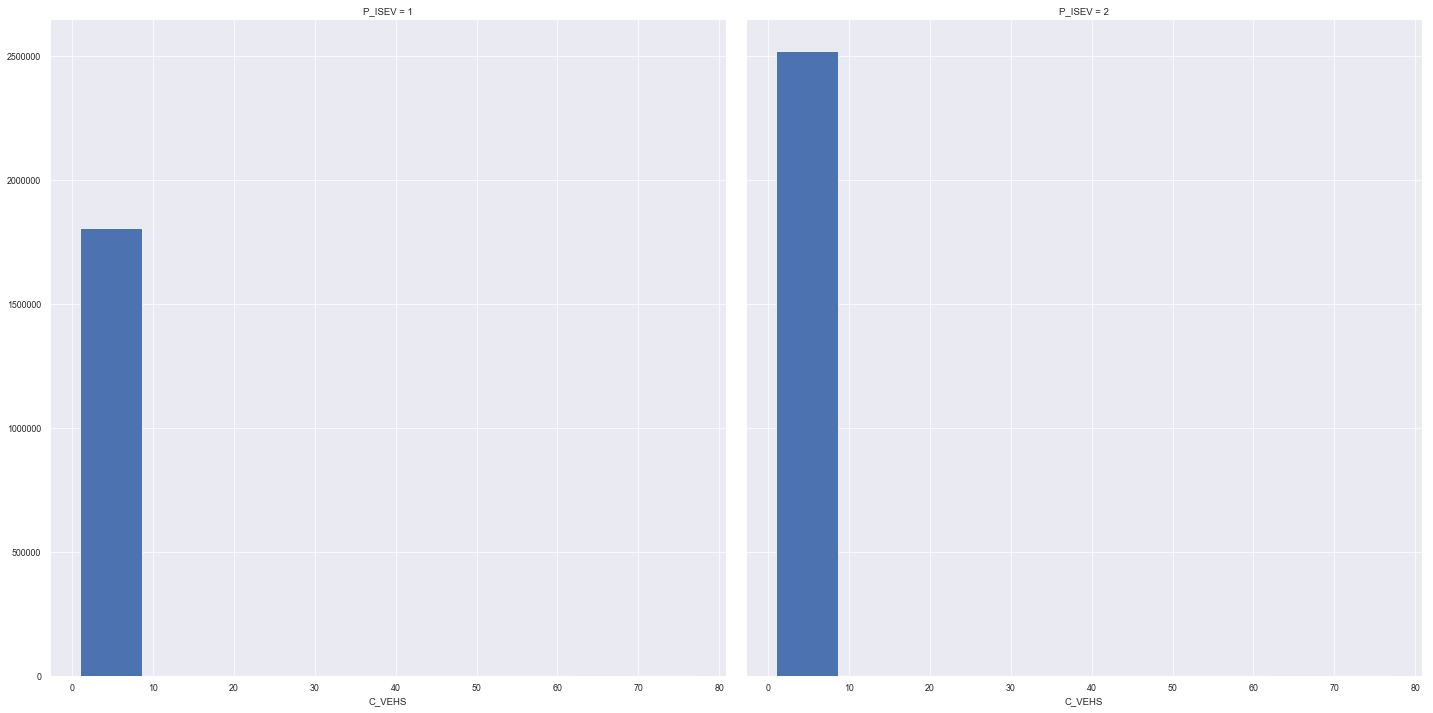

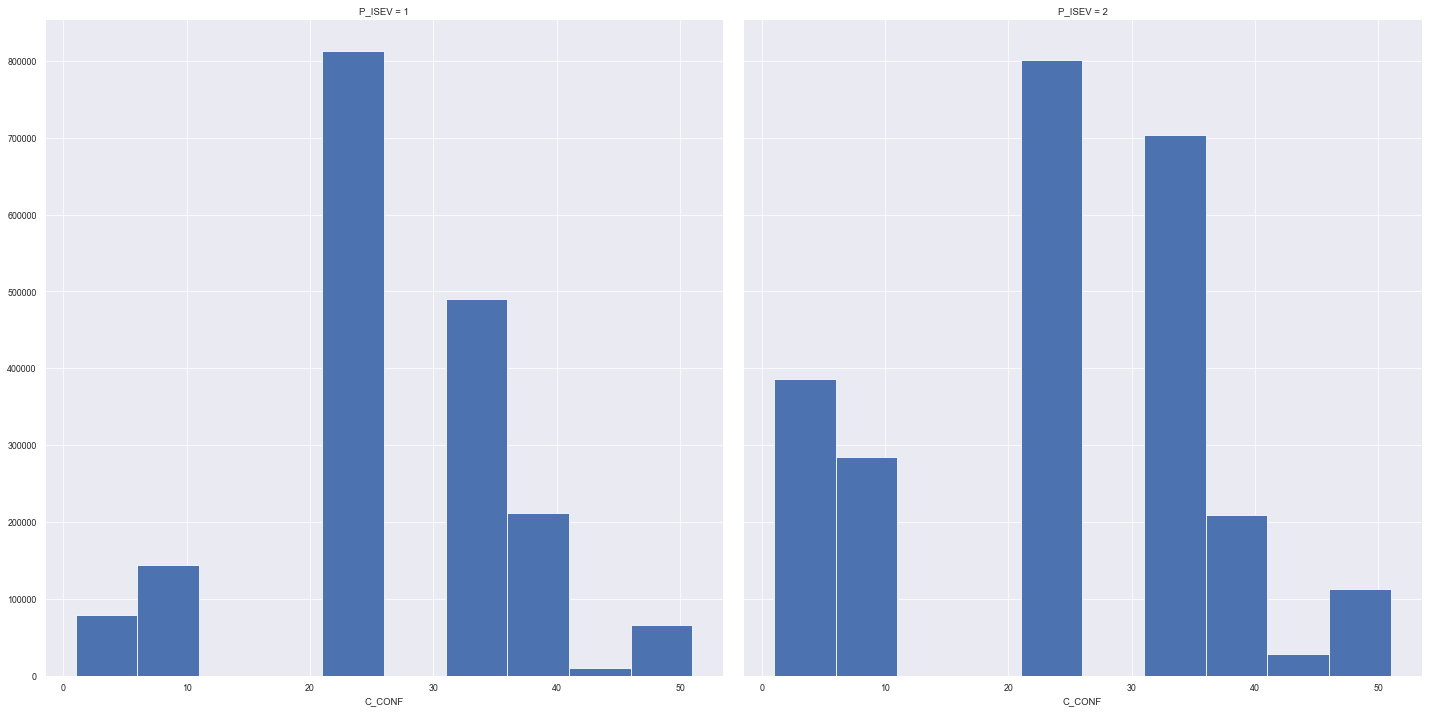

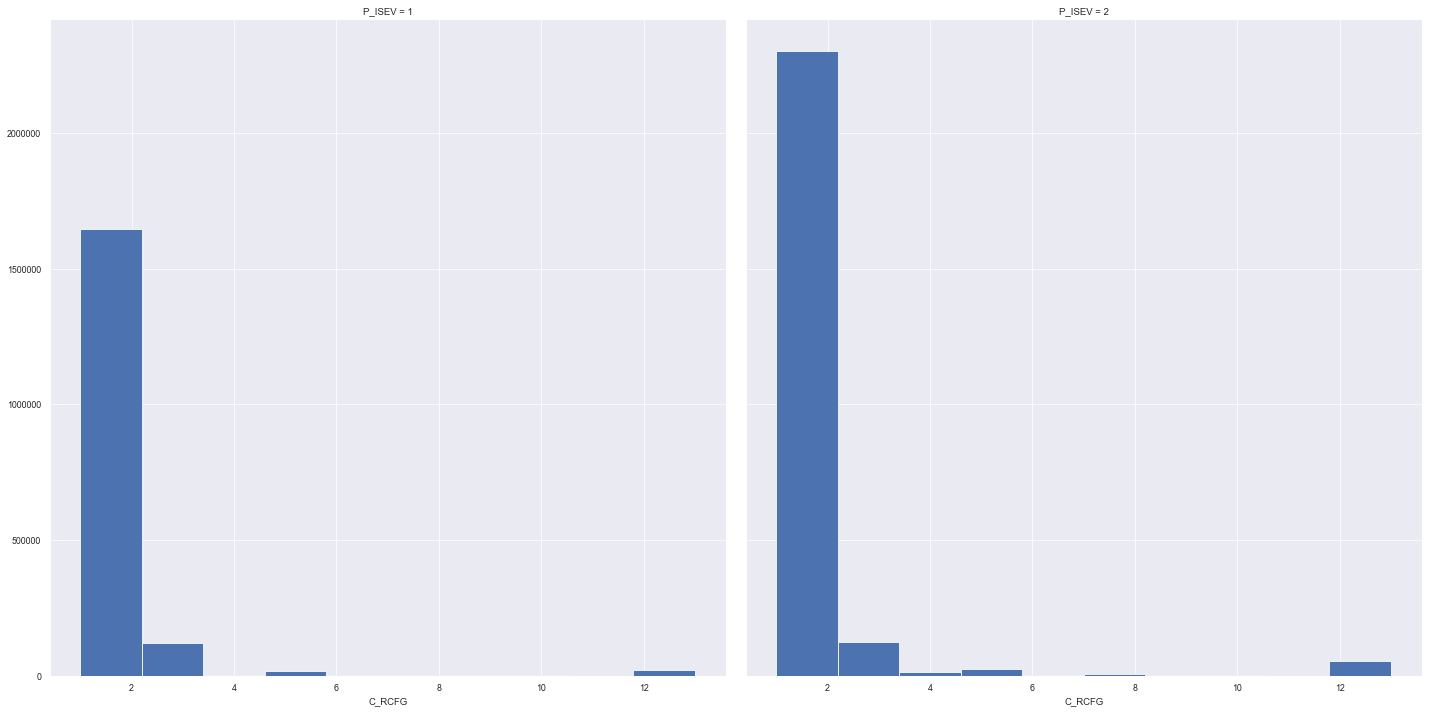

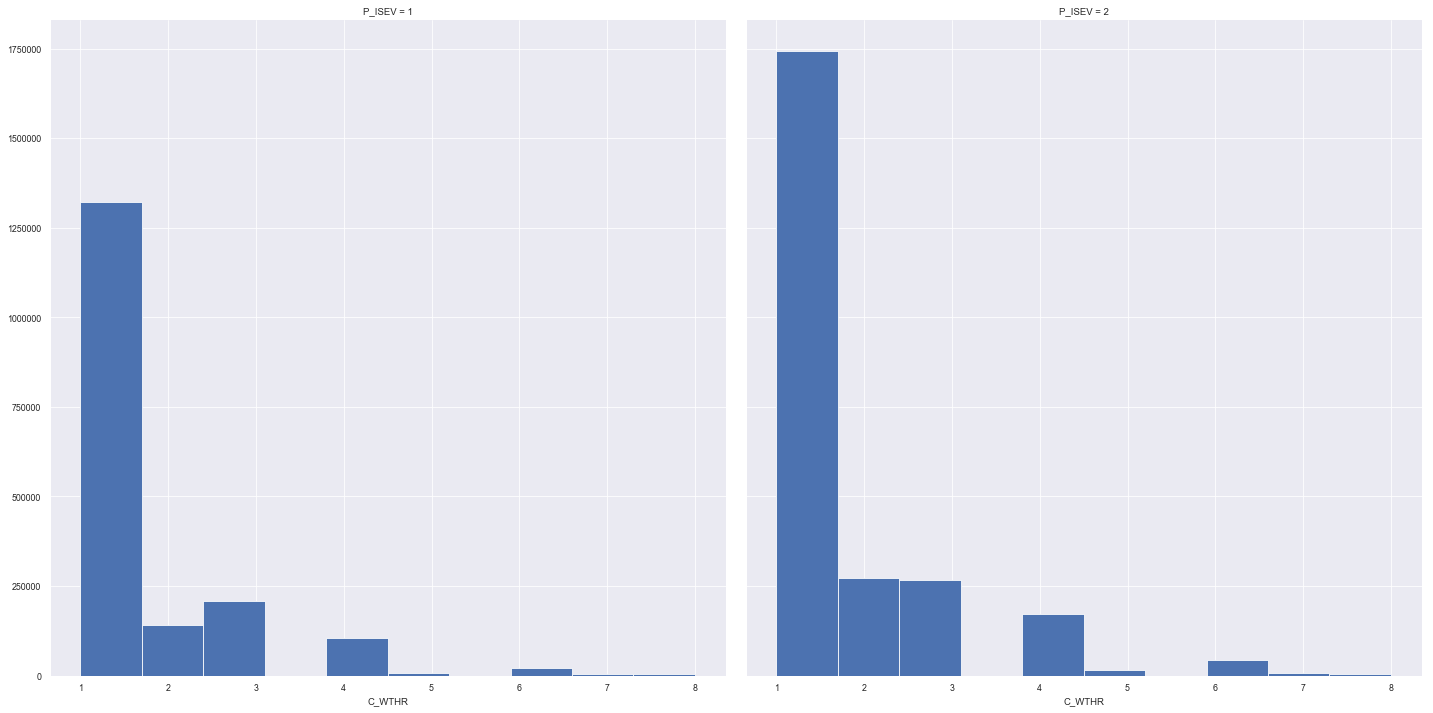

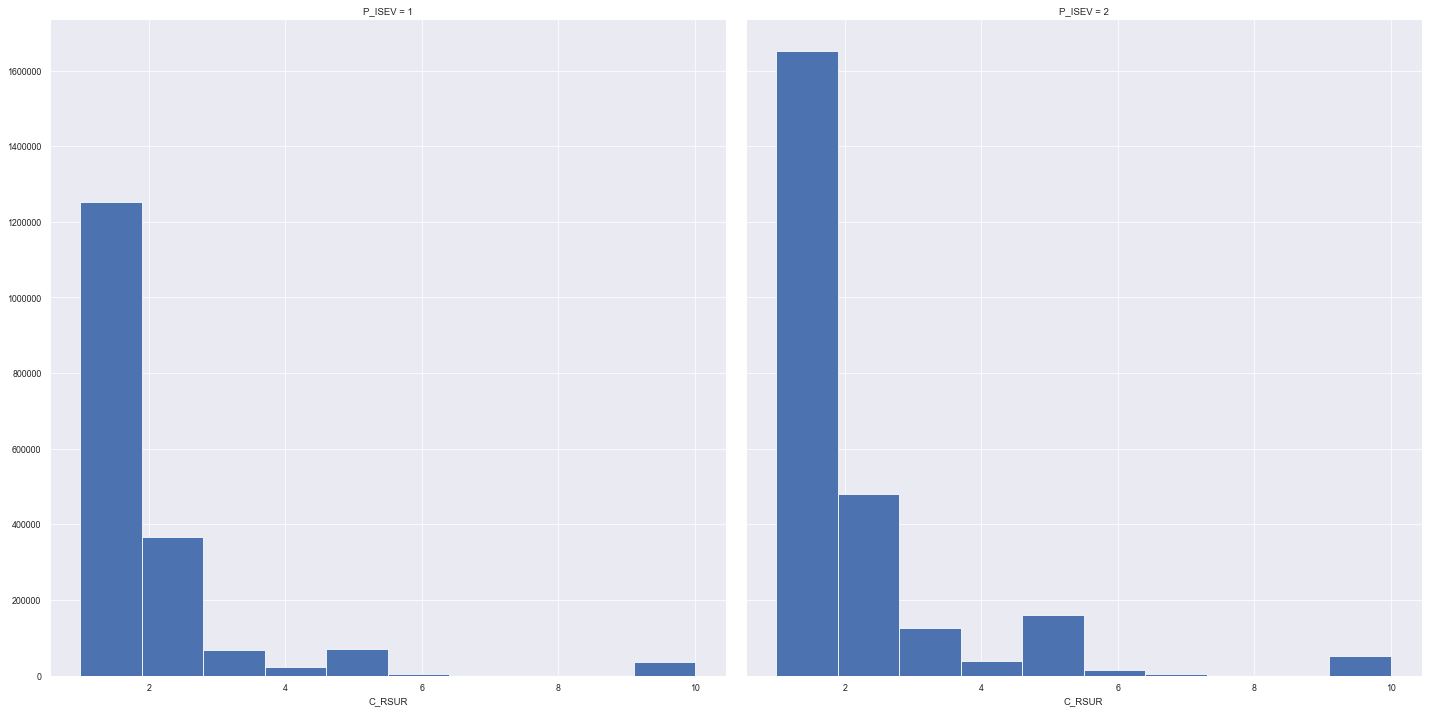

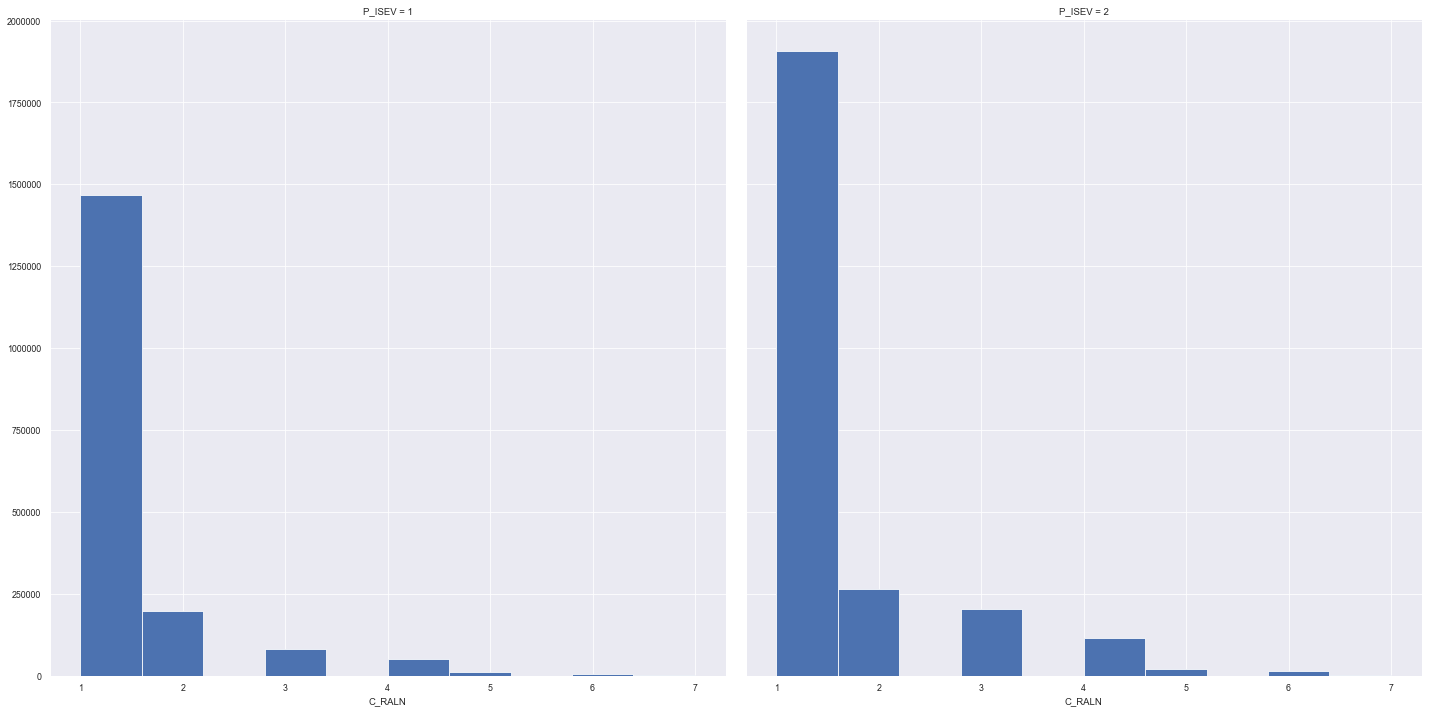

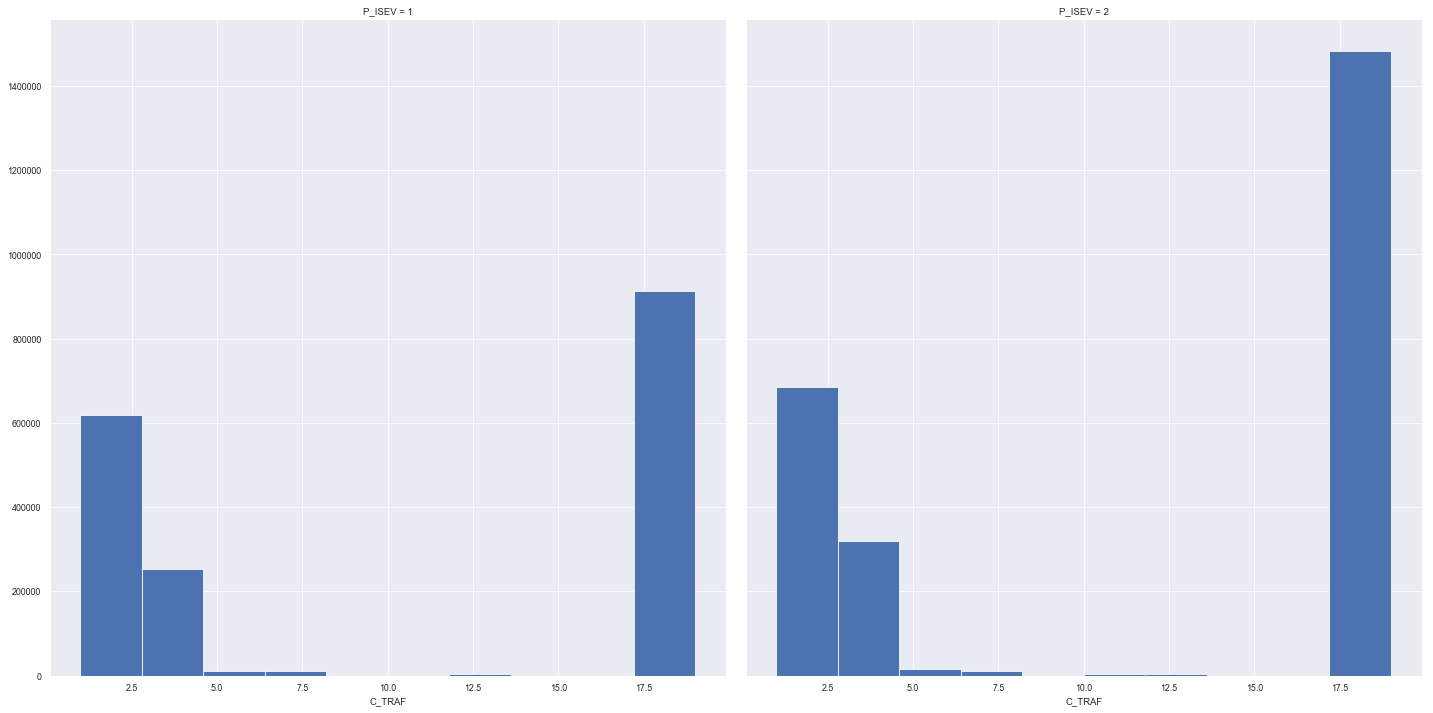

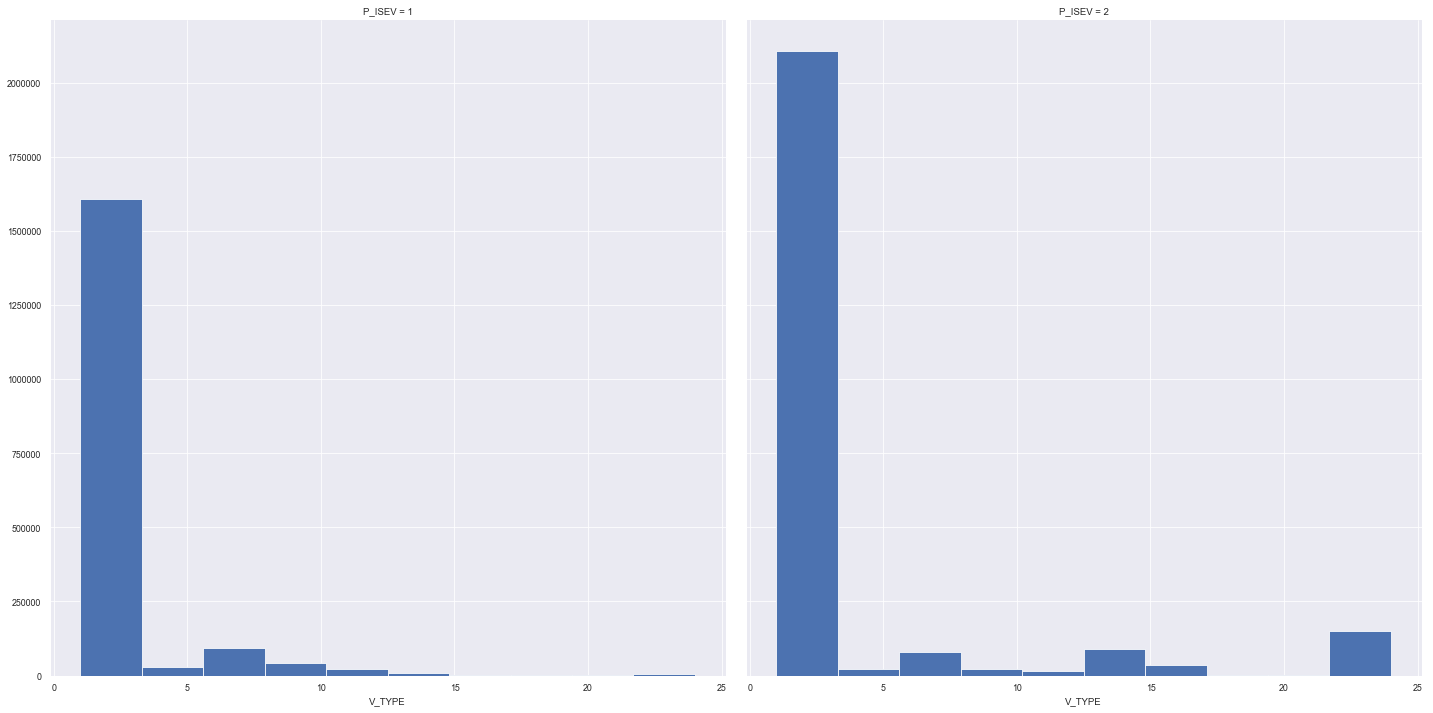

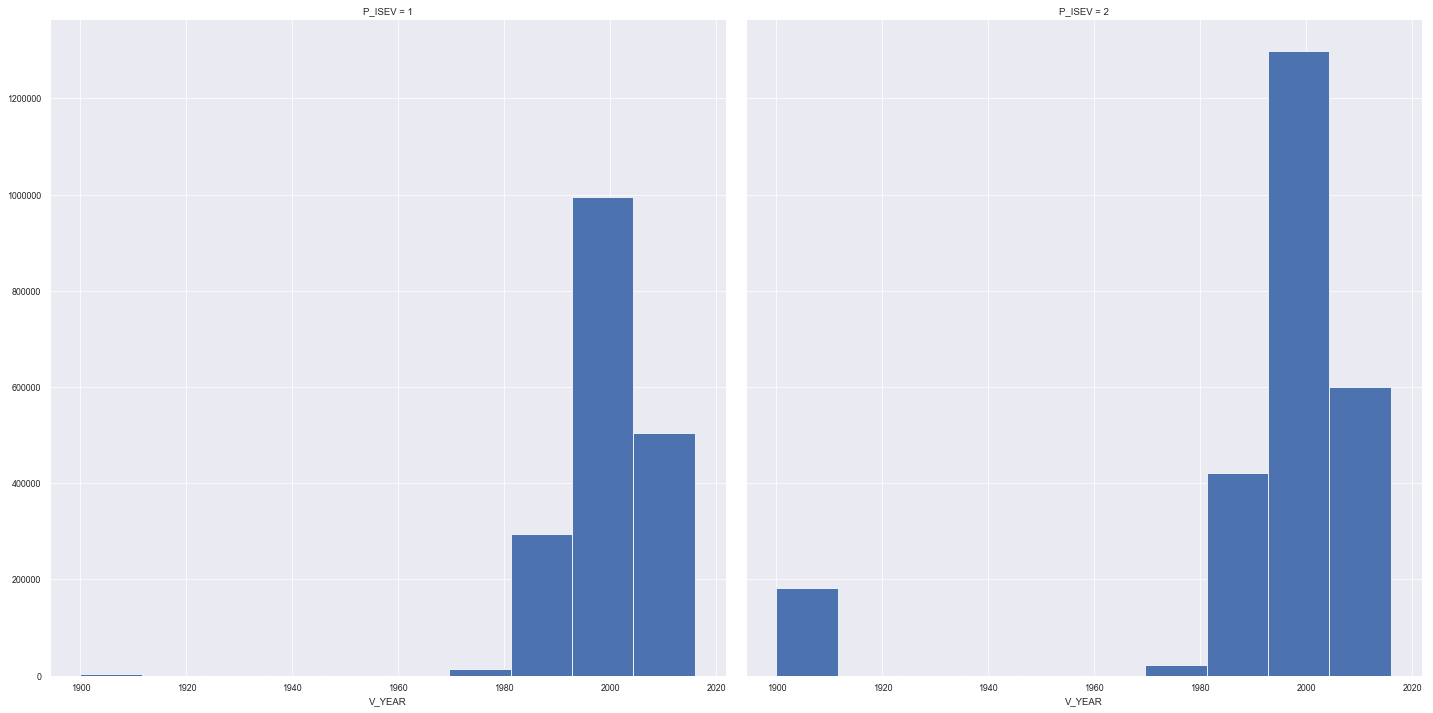

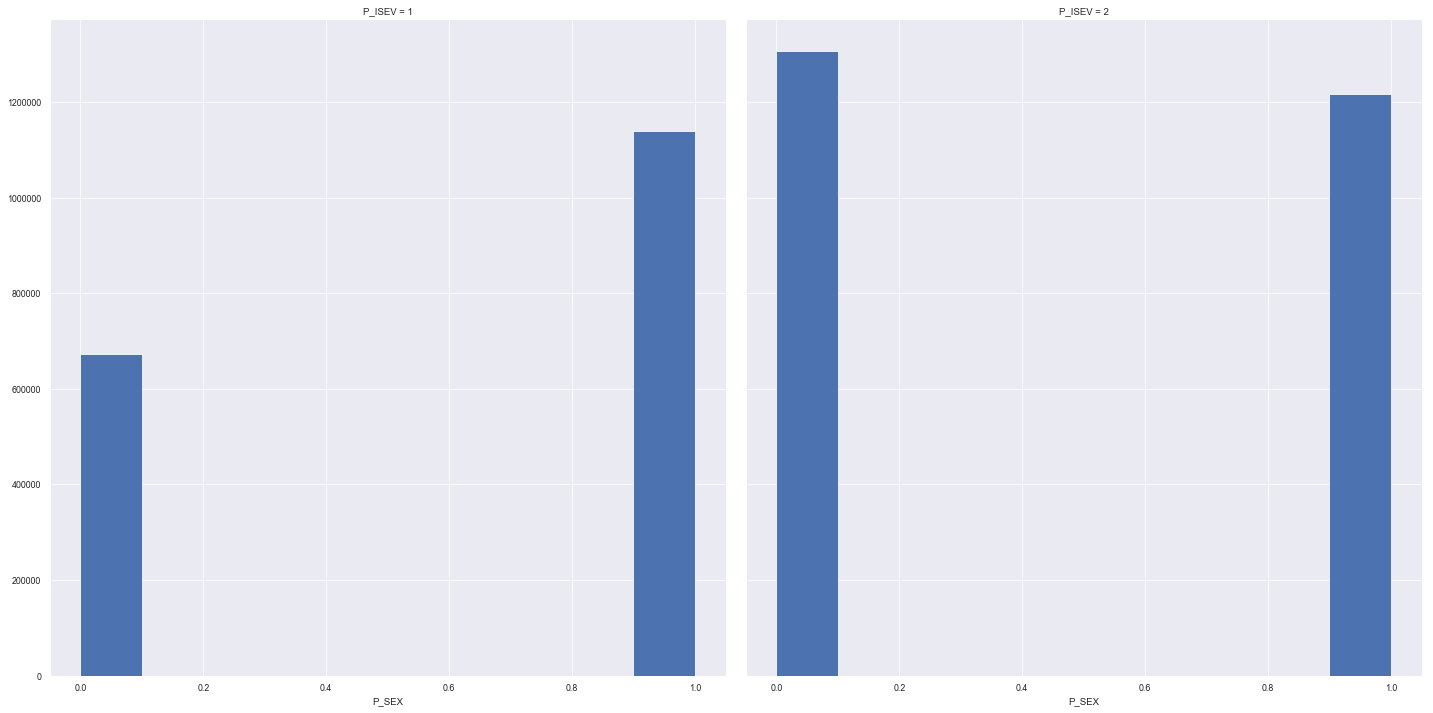

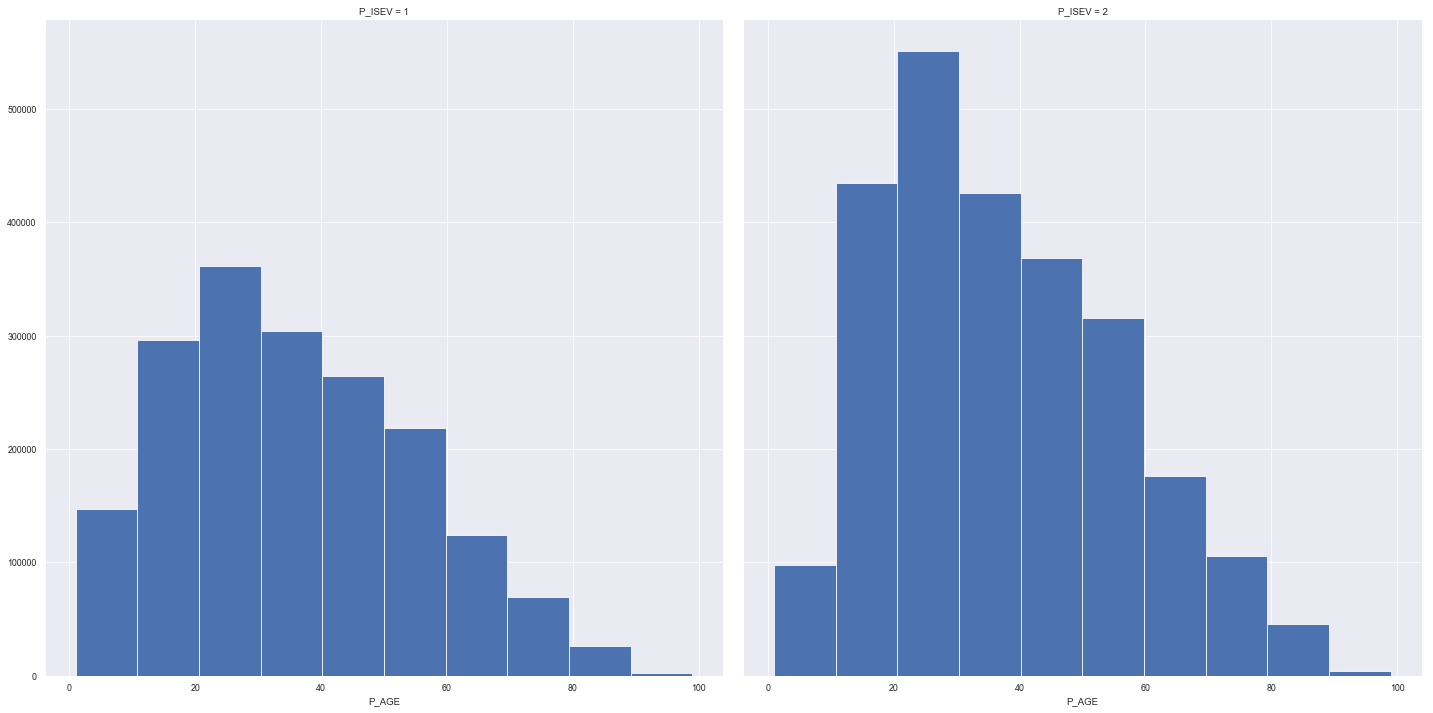

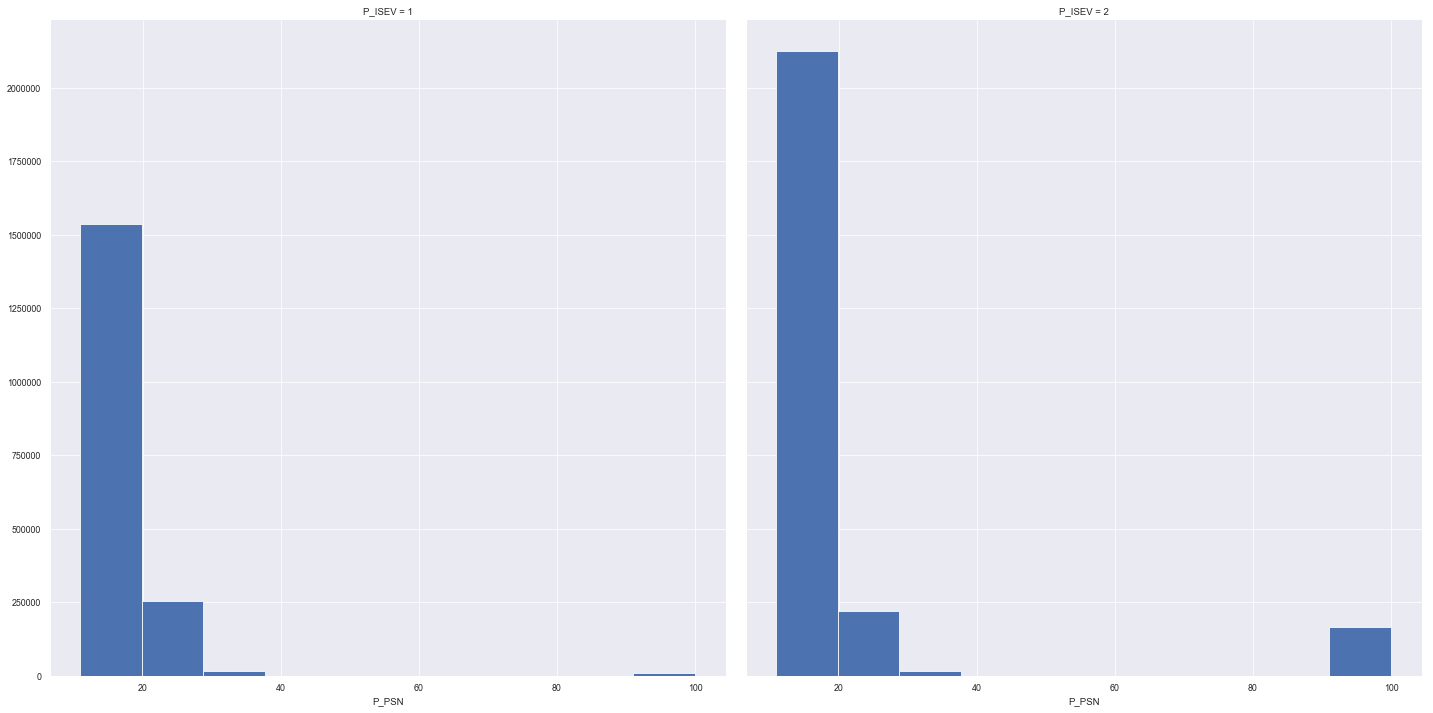

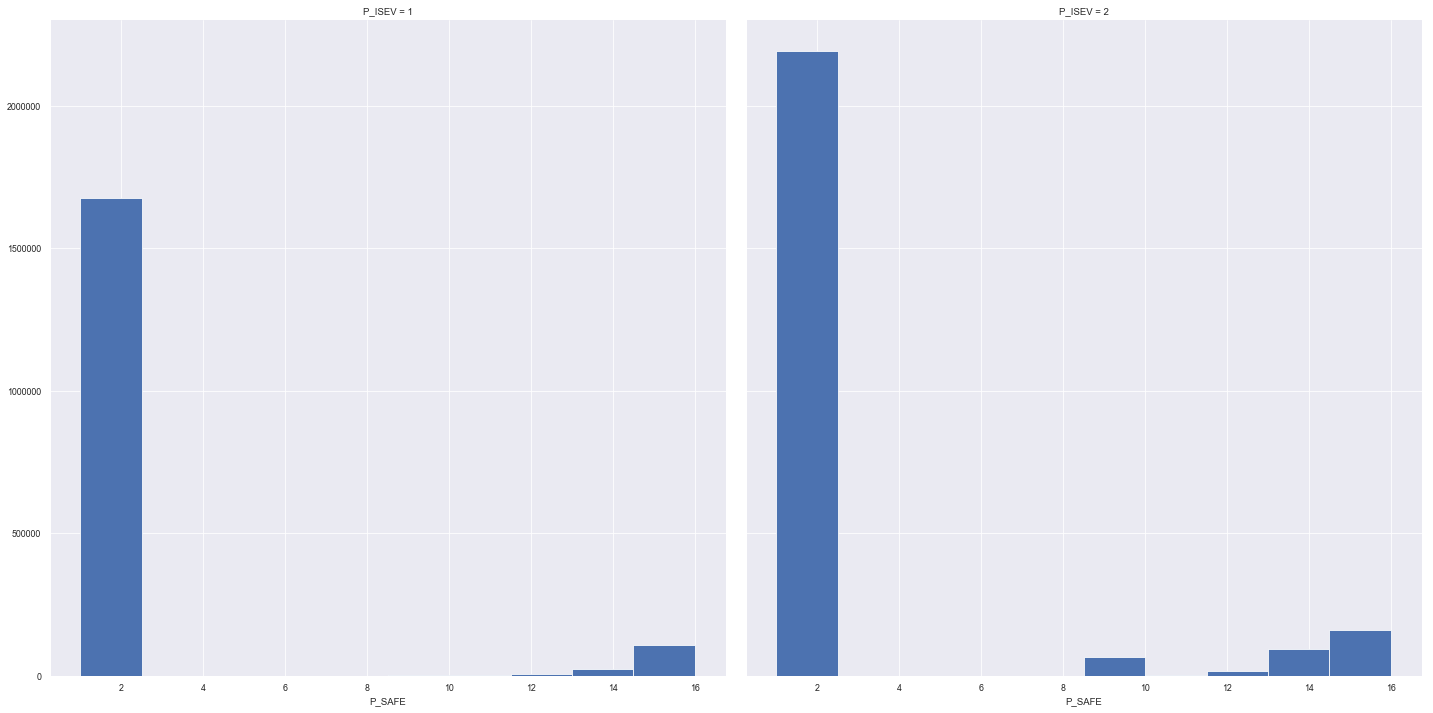

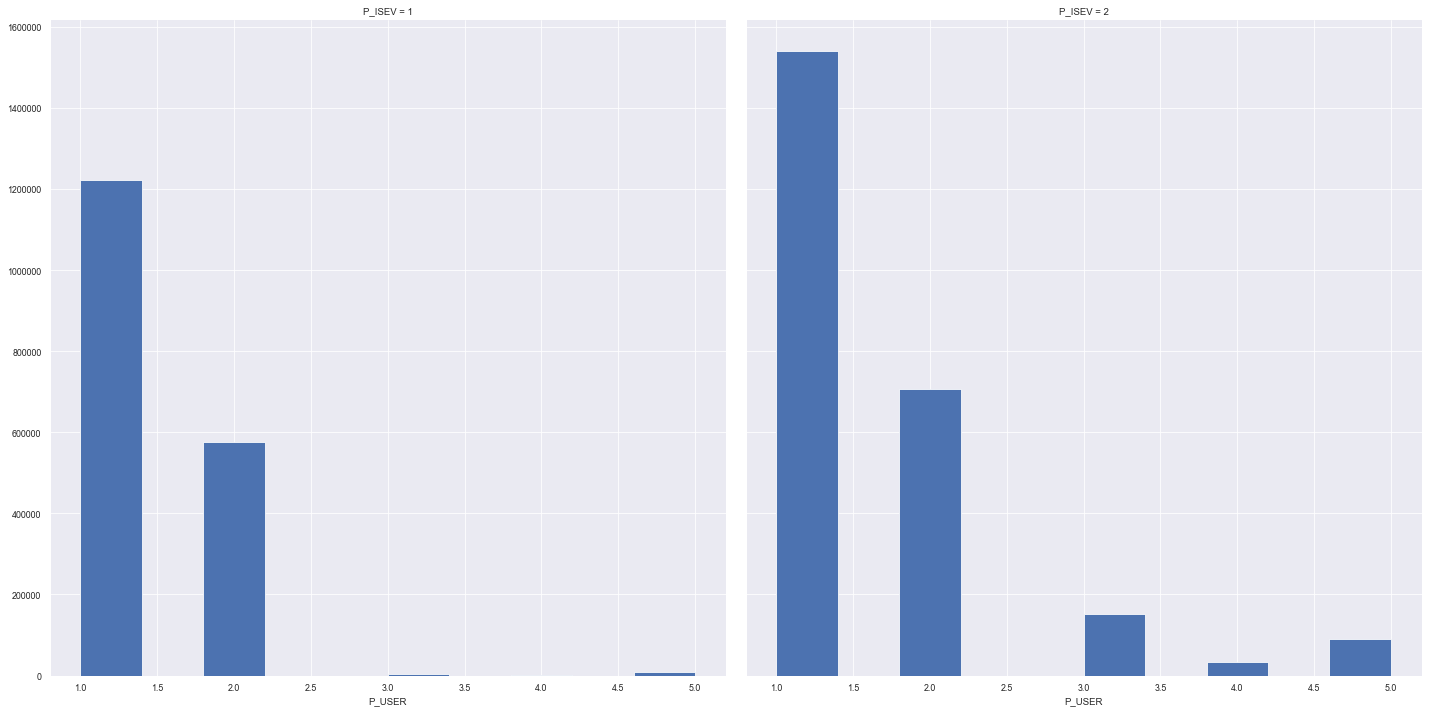

In [135]:
plt.figure(figsize=(12,12))

for col in df_tmp.columns[0:len(df.columns)-1]:
    k = sns.FacetGrid(df_tmp, col="P_ISEV", height = 10, aspect=1)
    k = k.map(plt.hist, col)

In [136]:
### 8b. Data Visualization for Multi Class

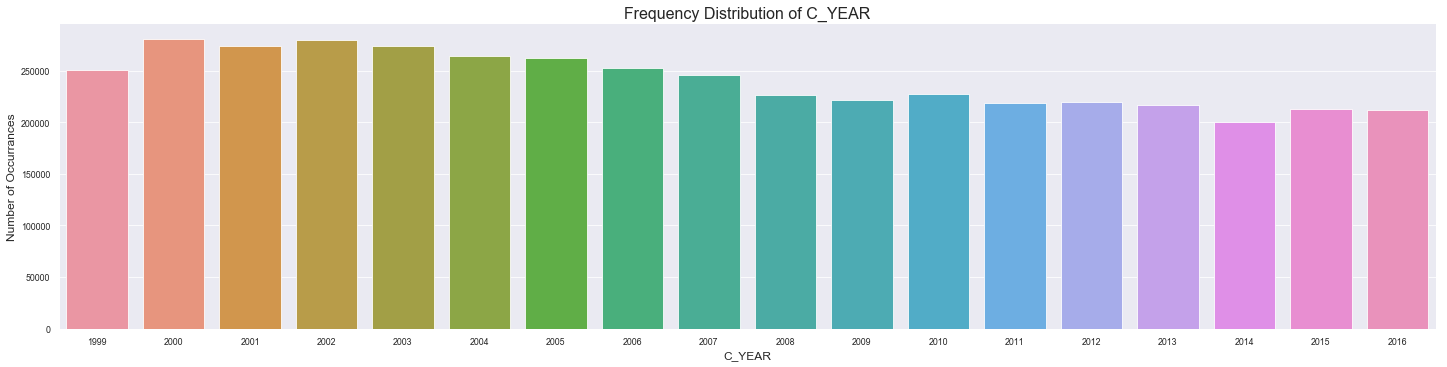

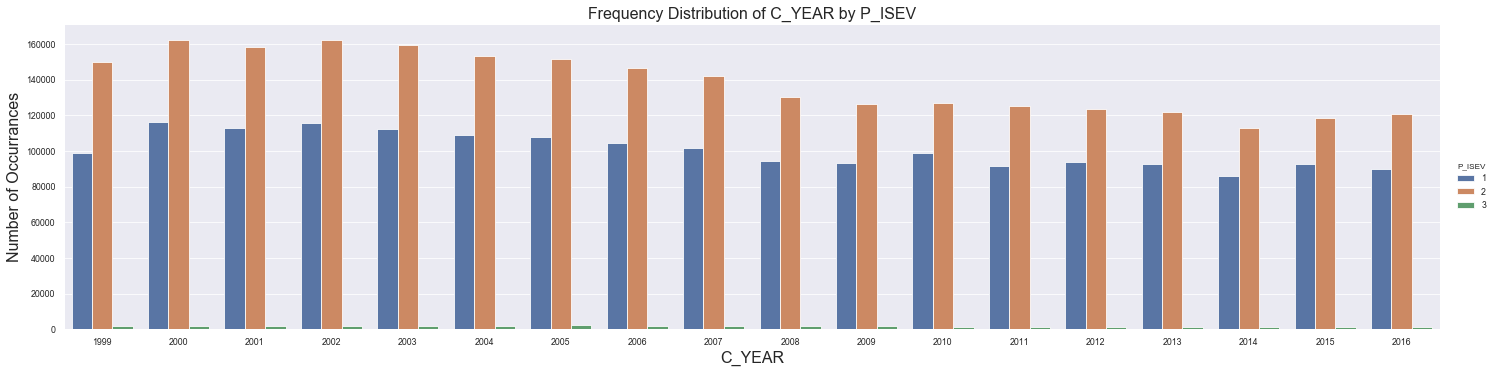

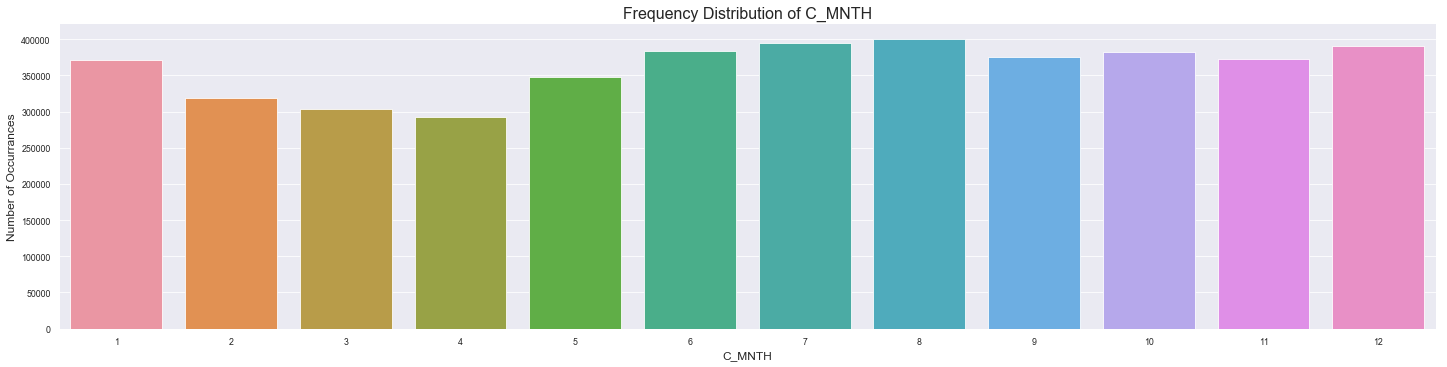

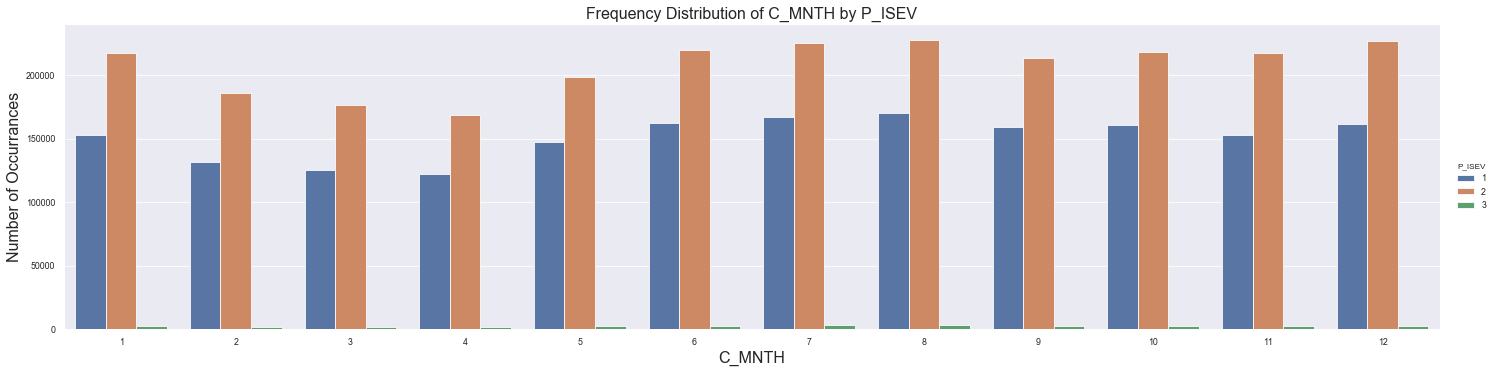

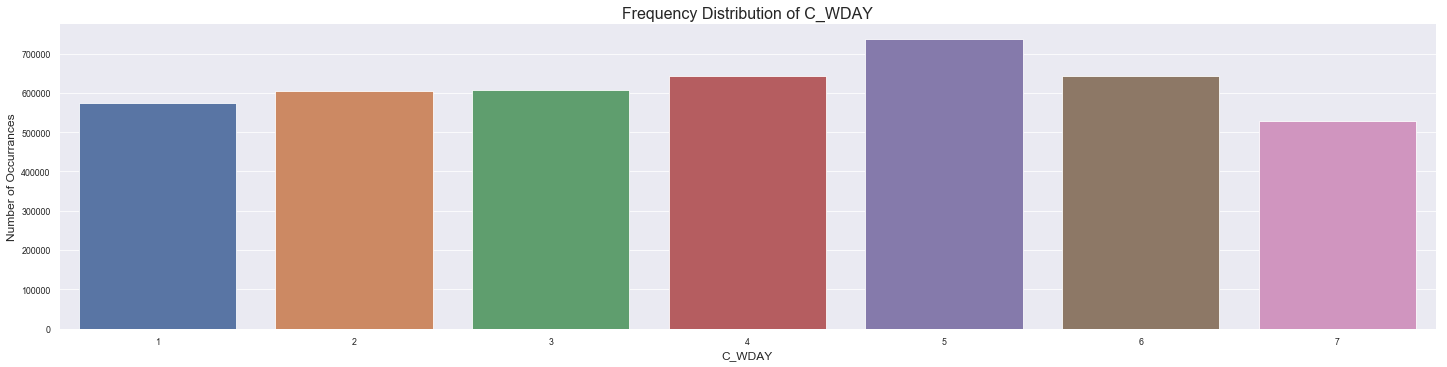

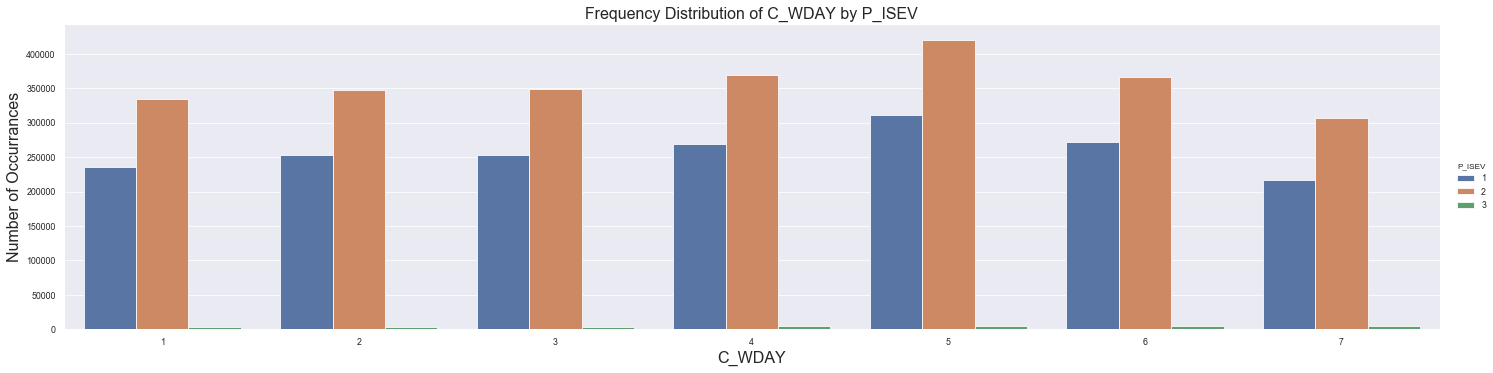

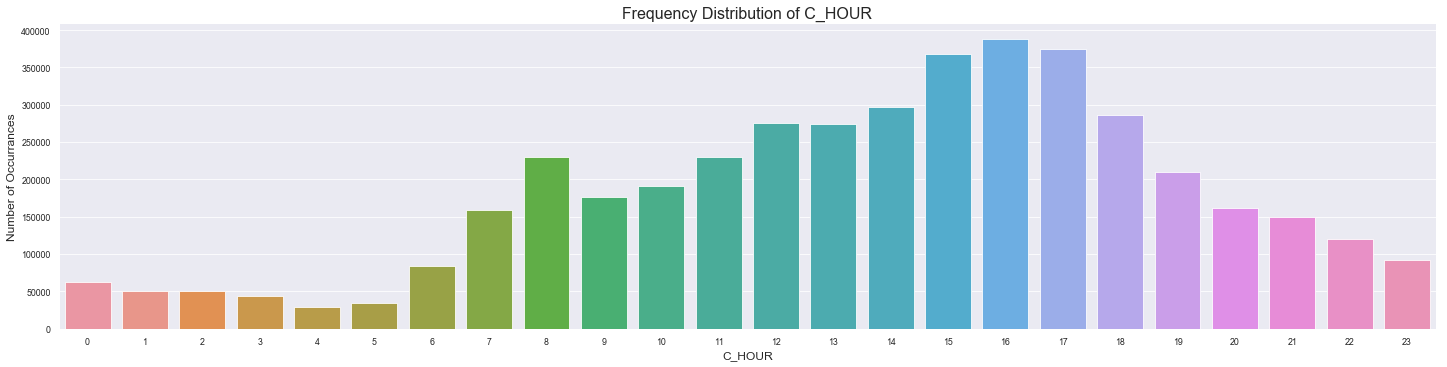

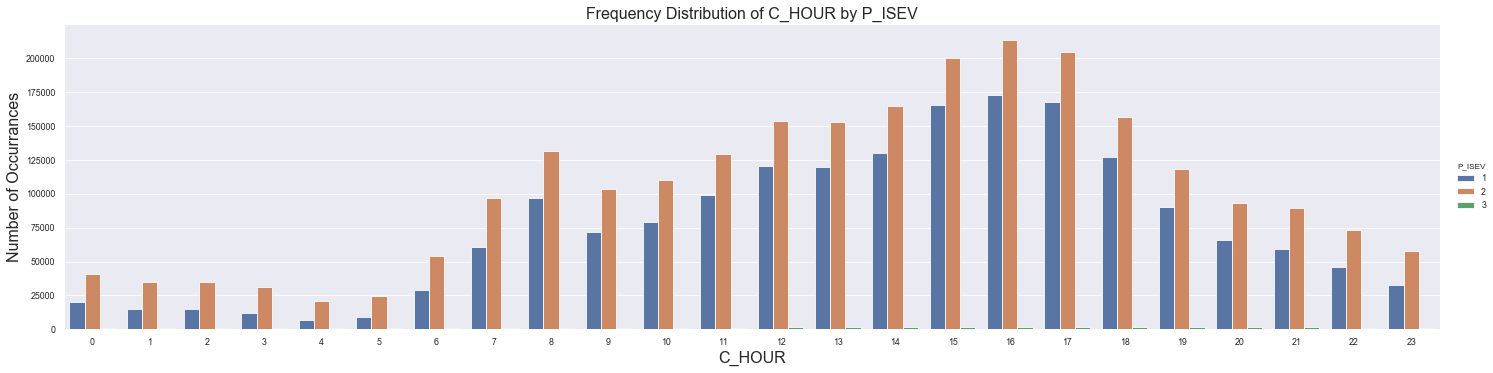

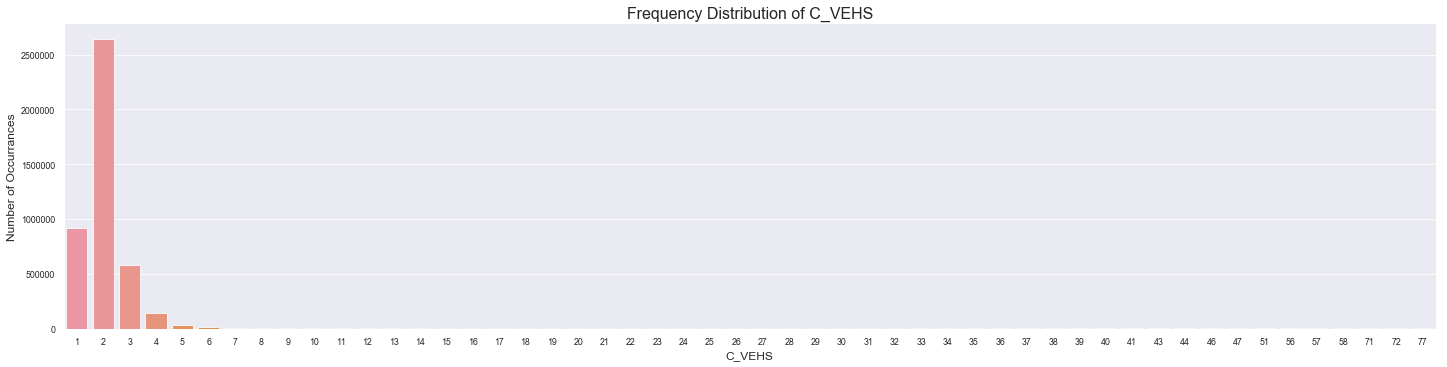

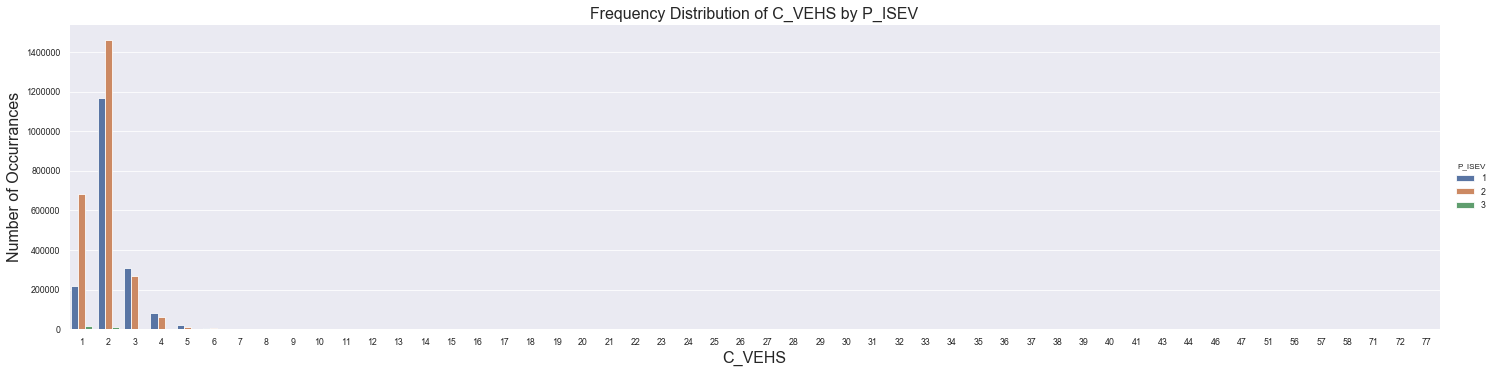

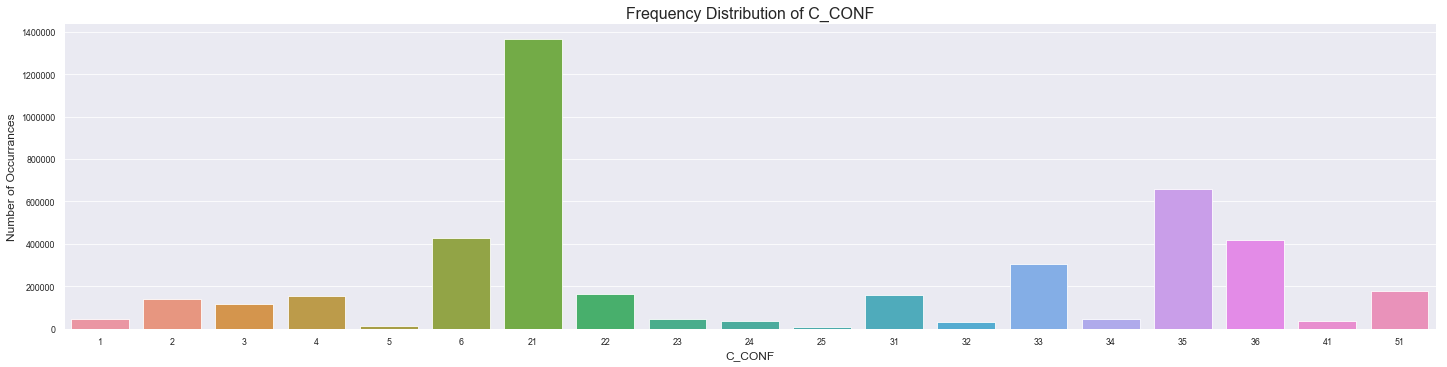

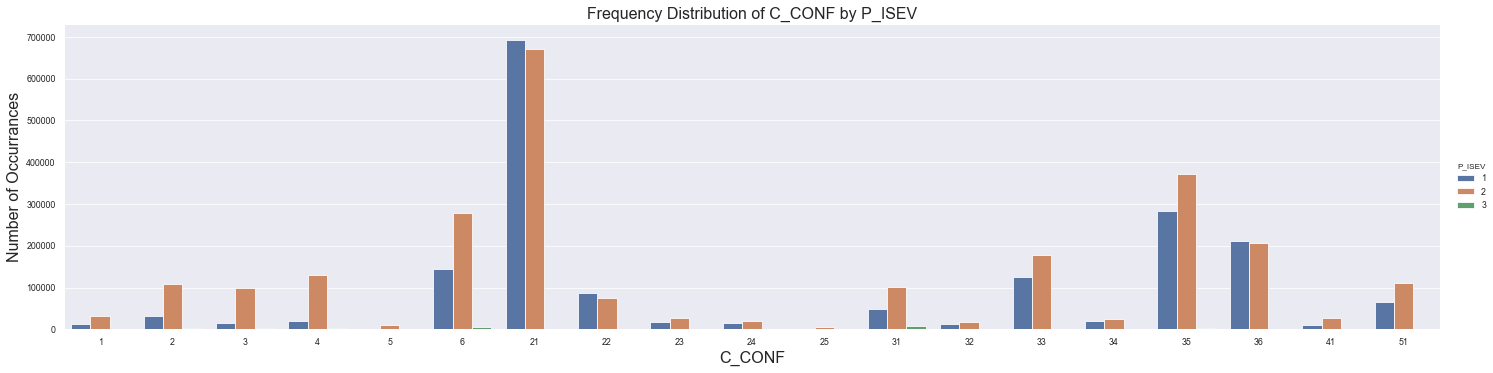

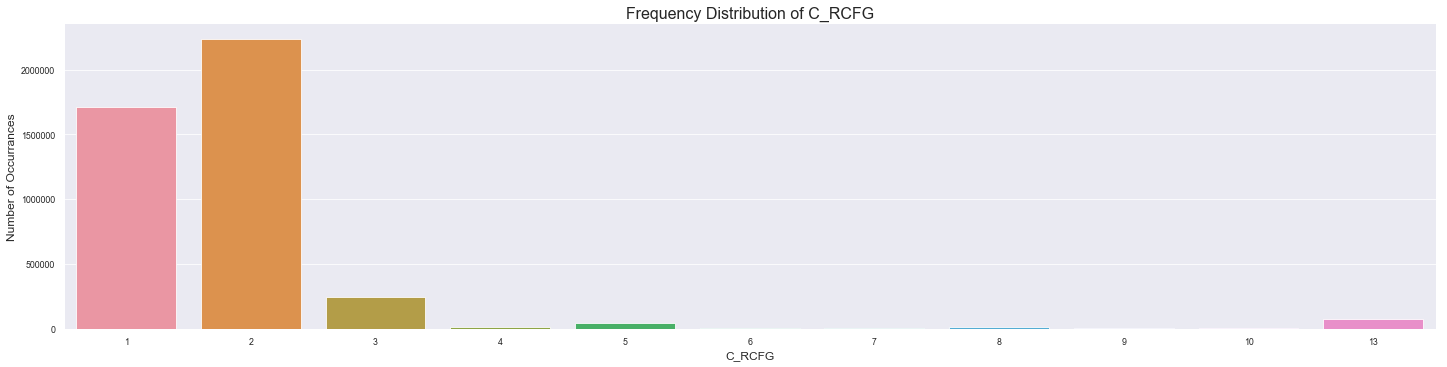

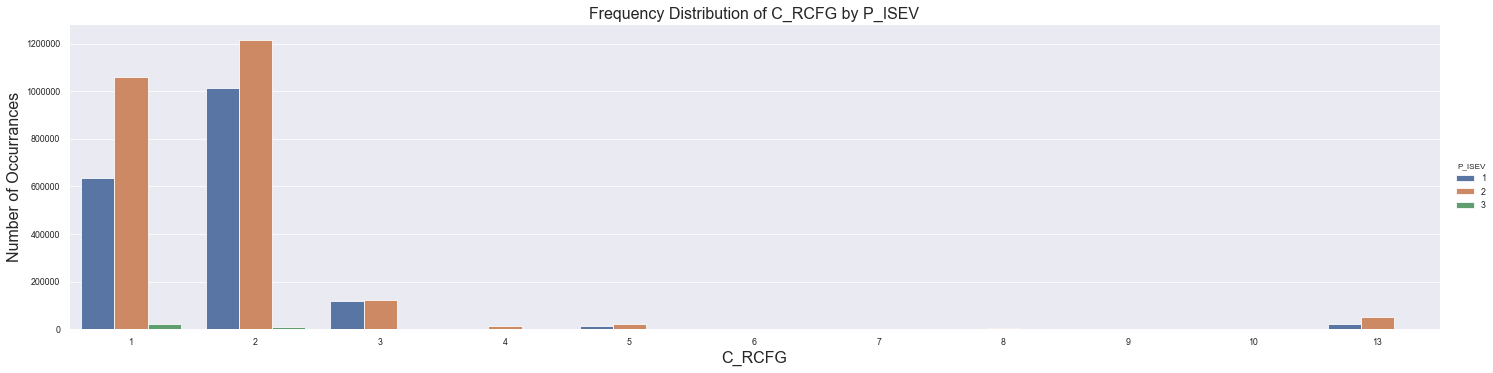

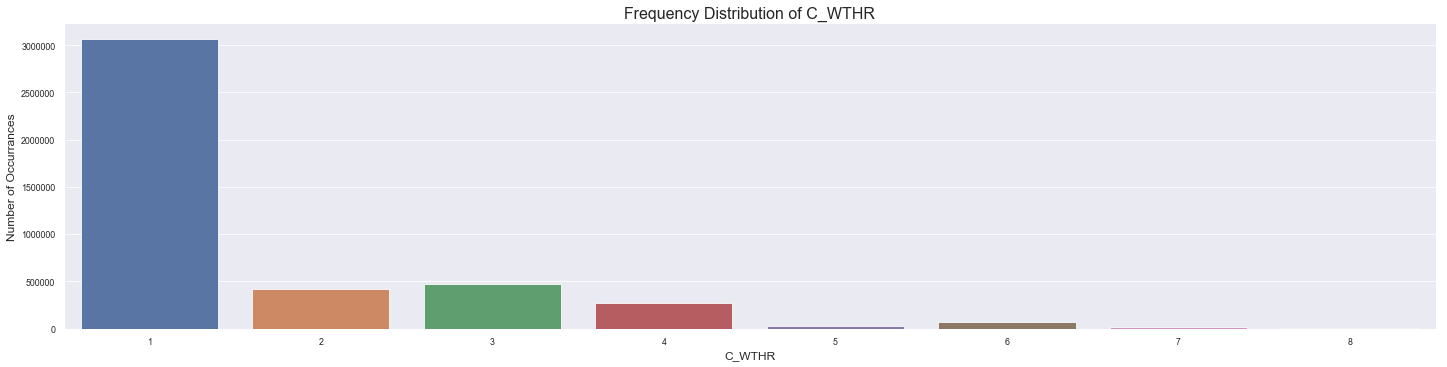

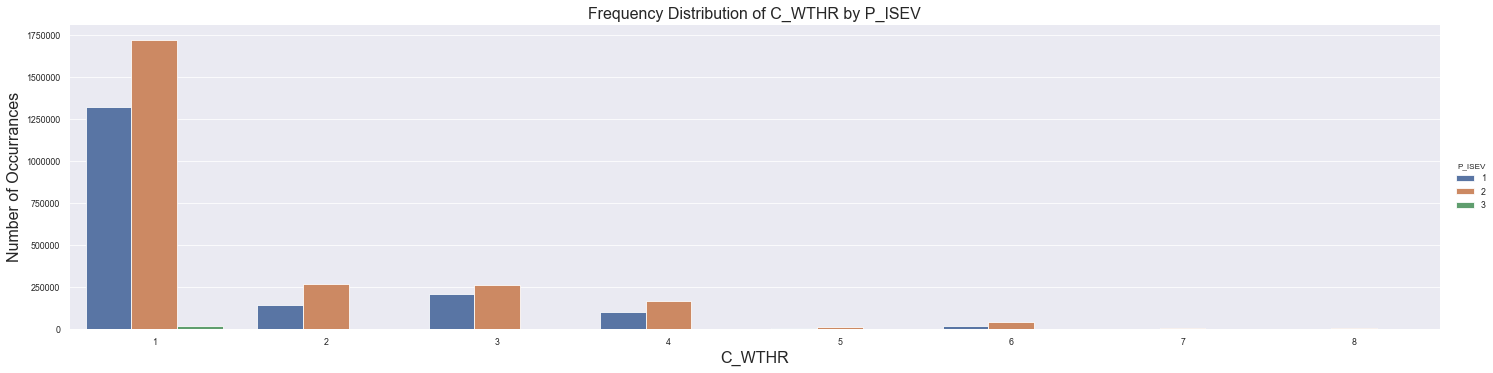

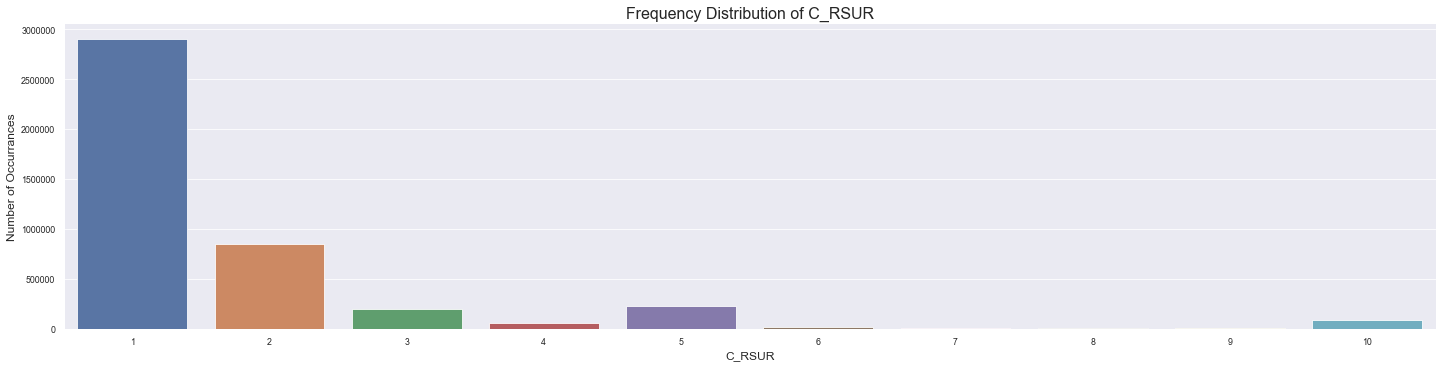

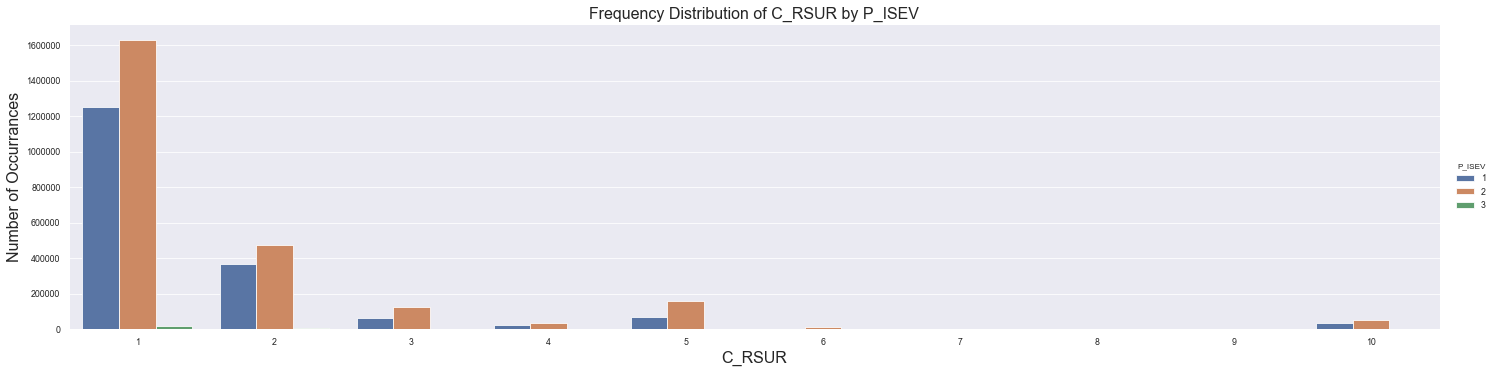

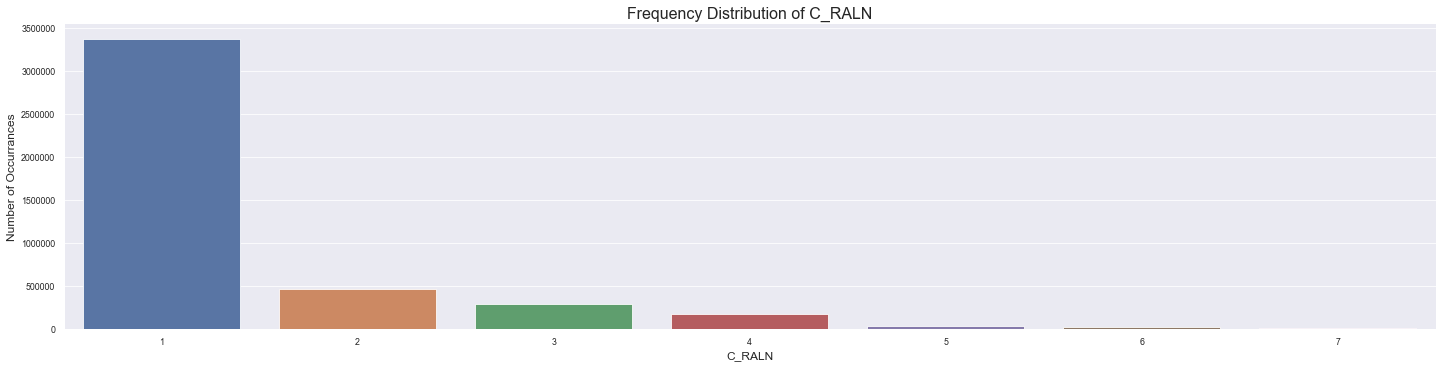

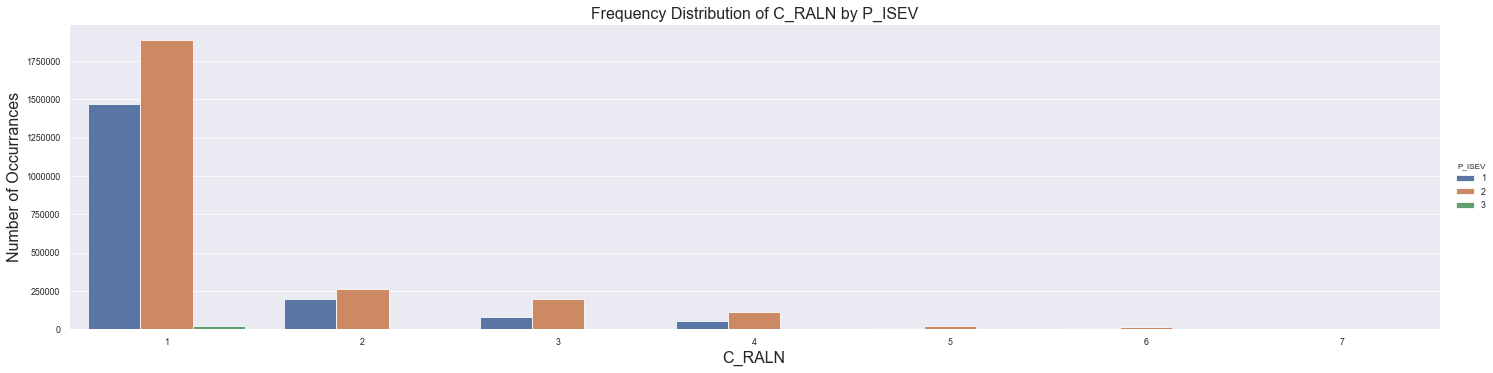

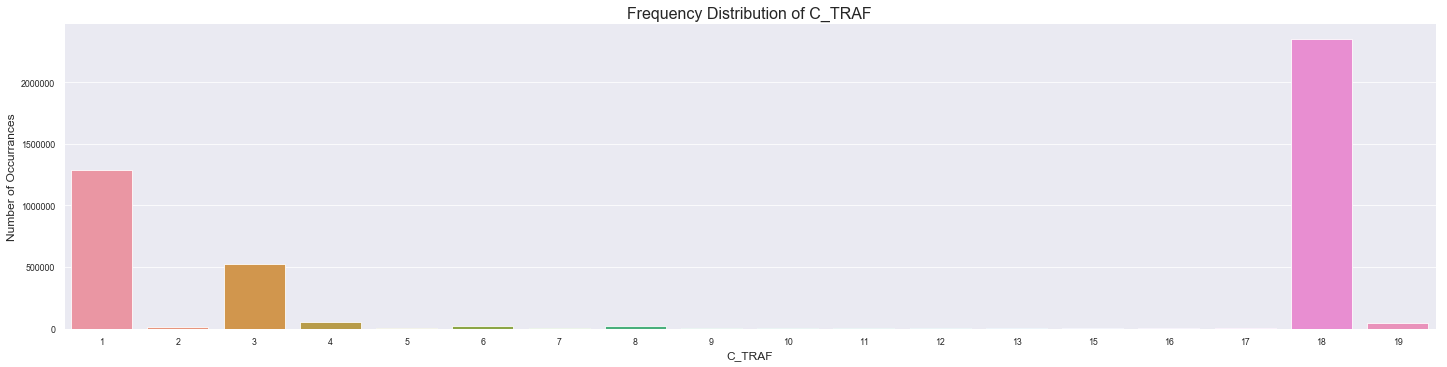

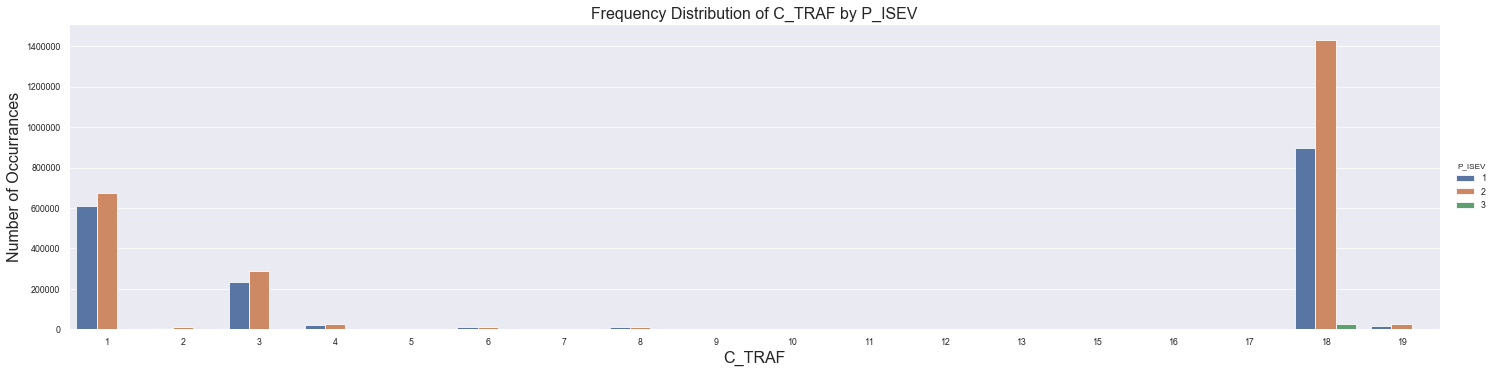

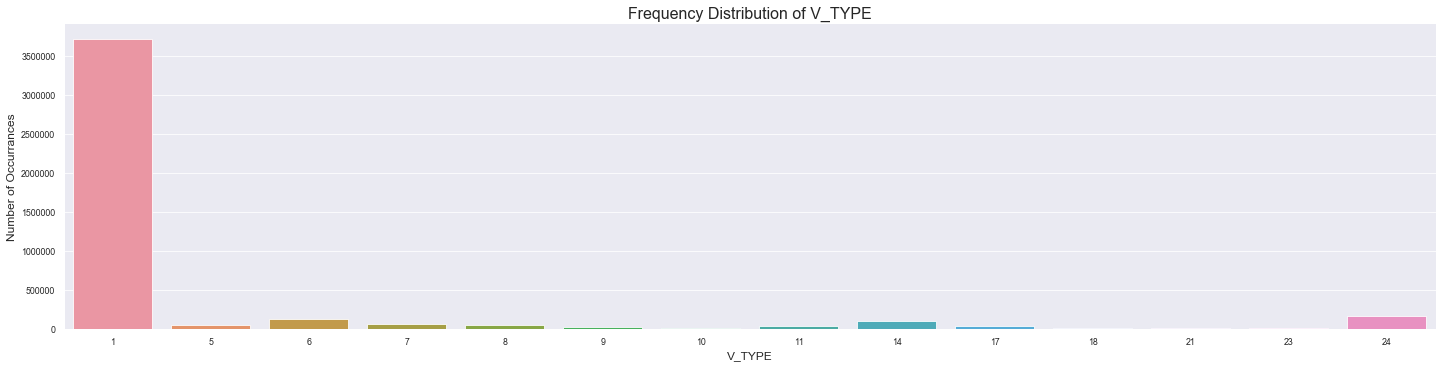

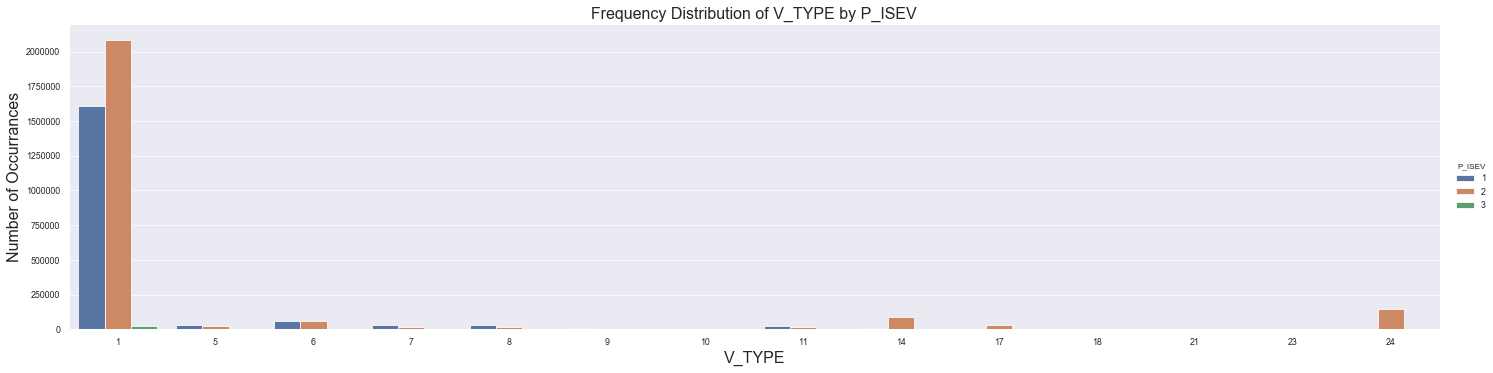

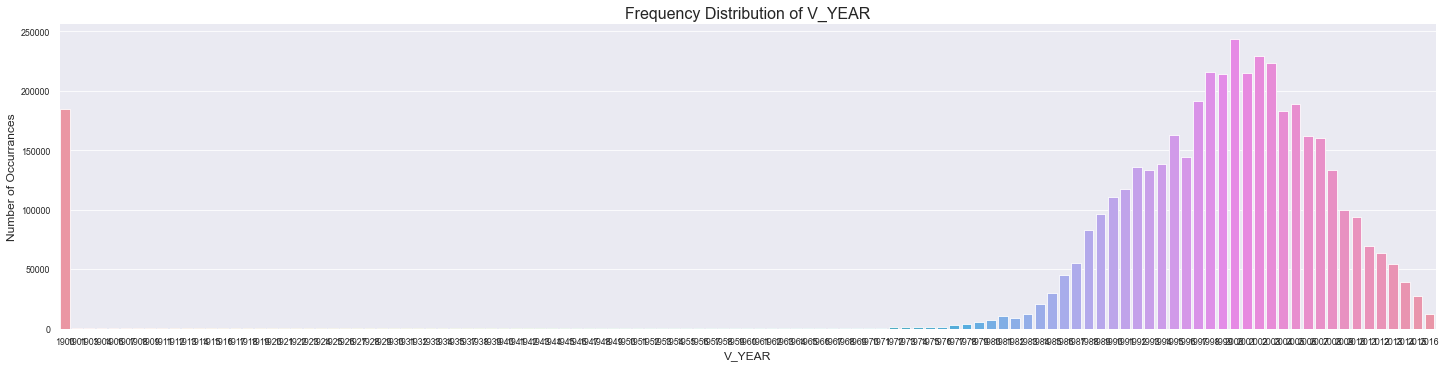

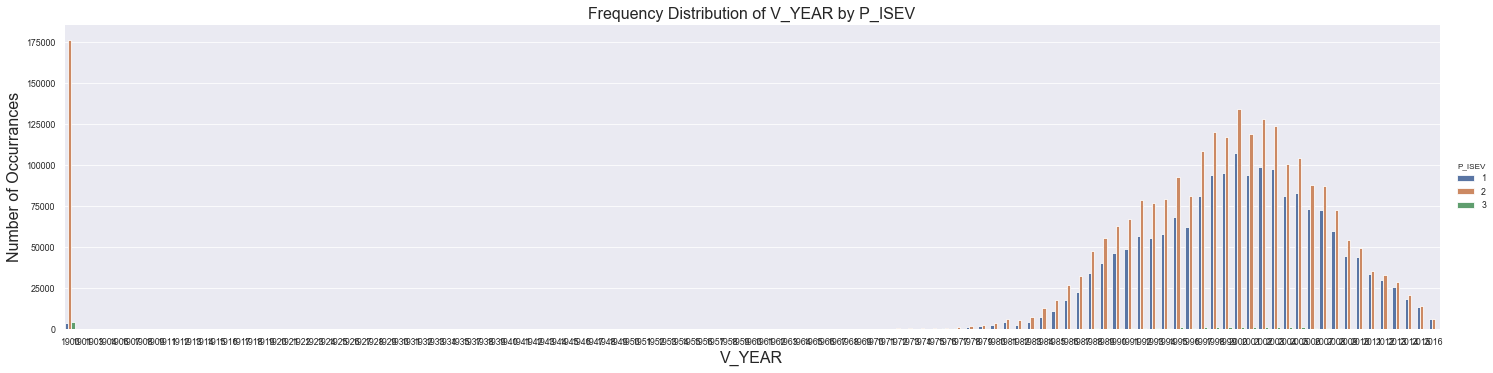

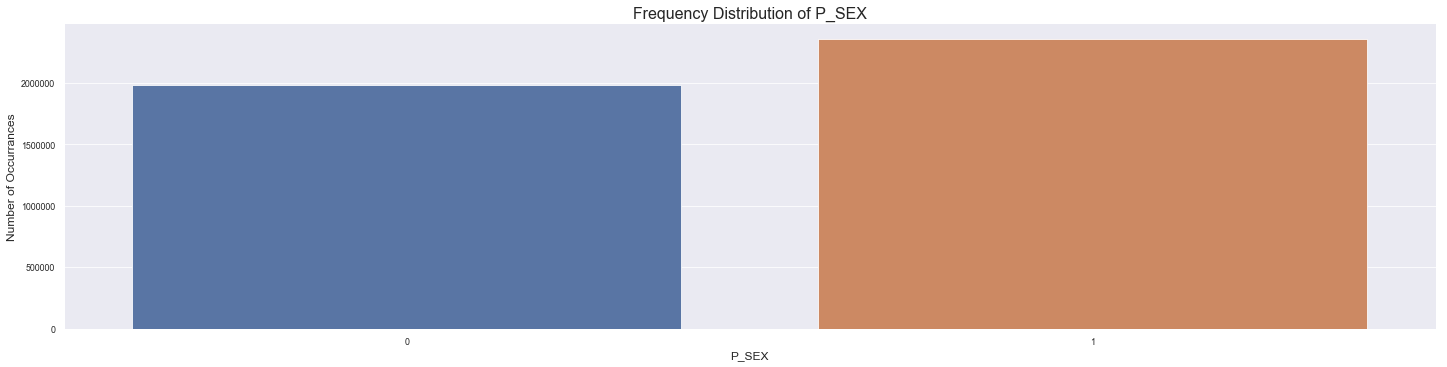

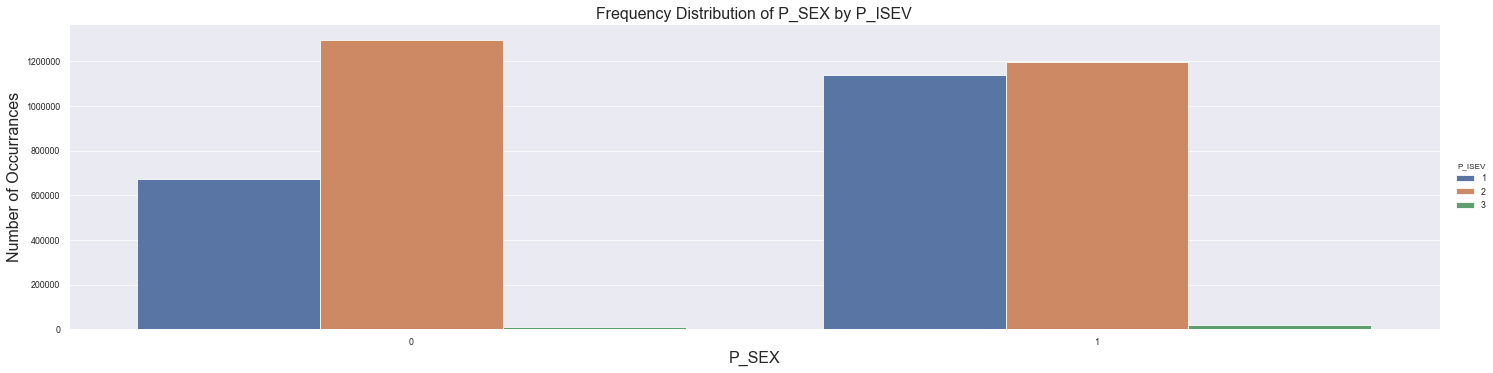

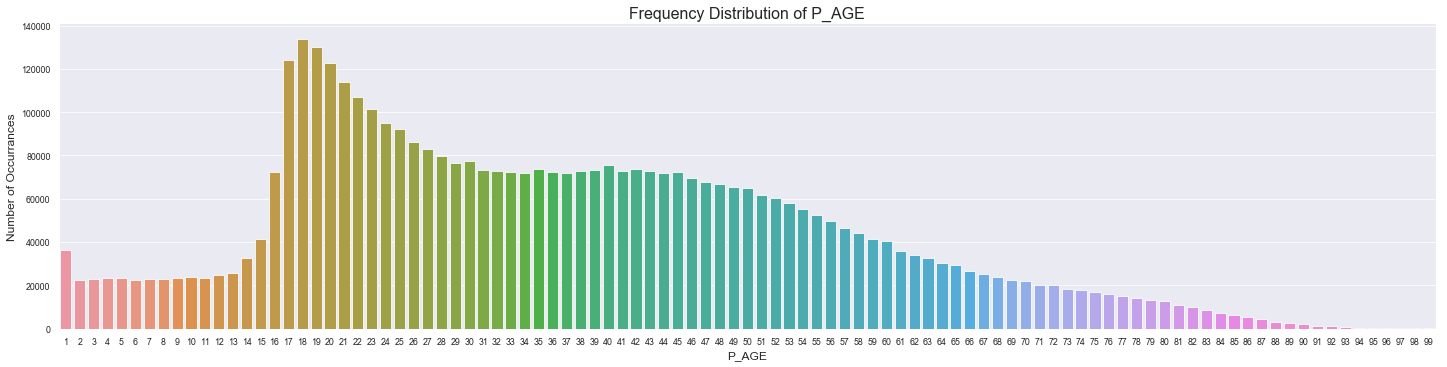

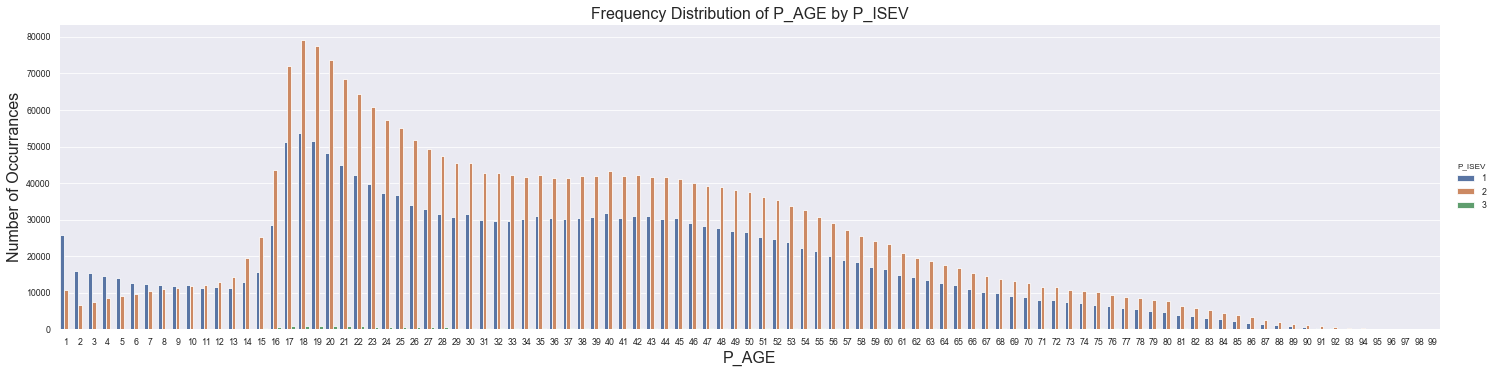

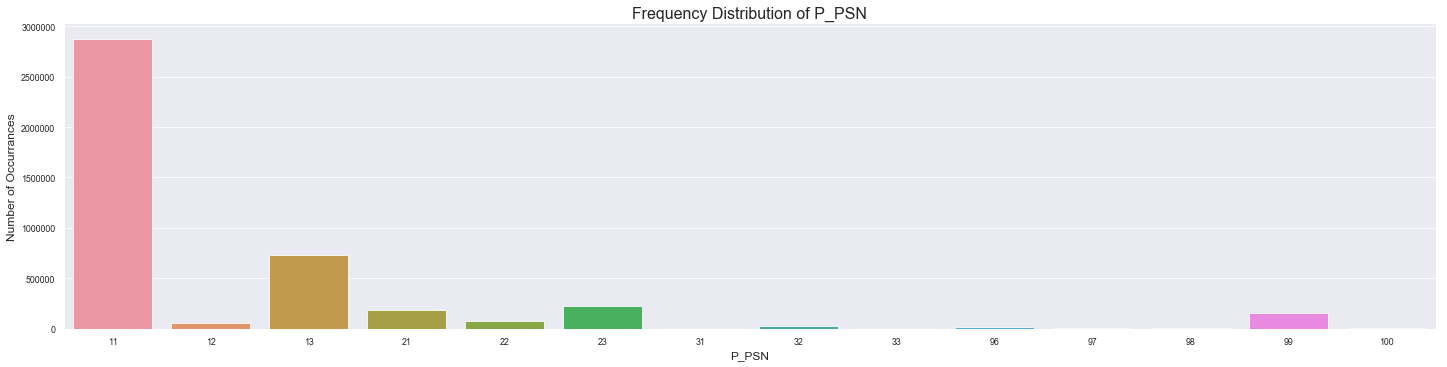

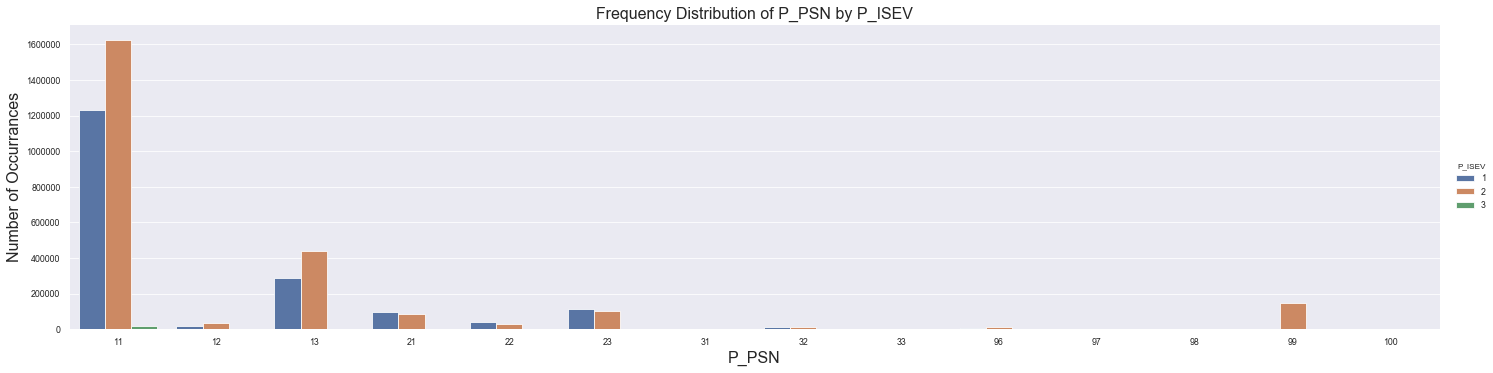

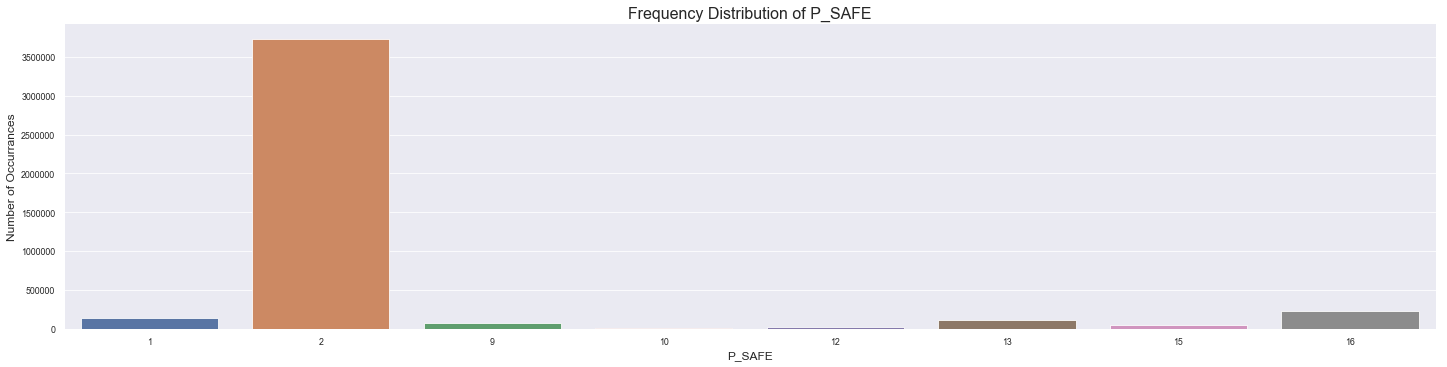

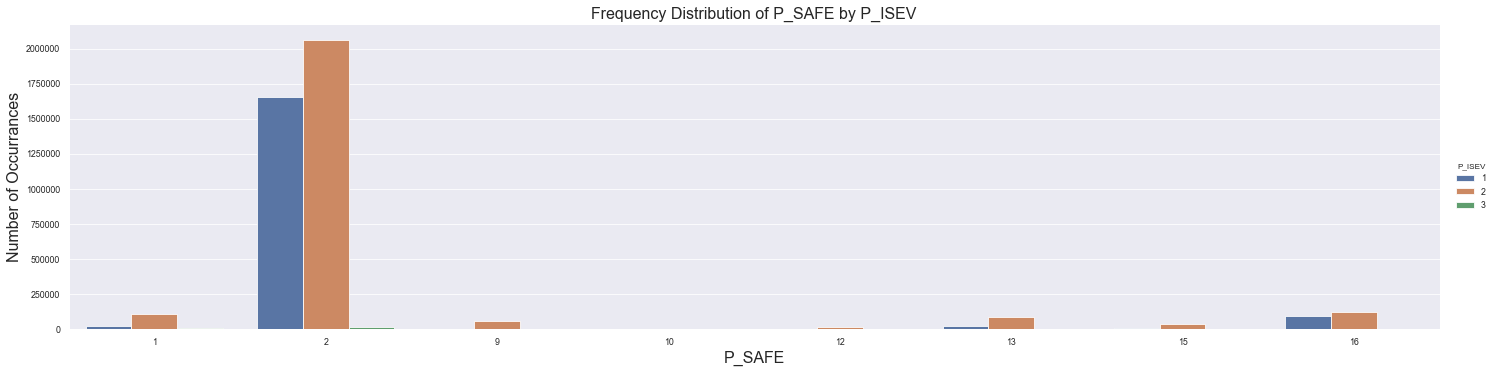

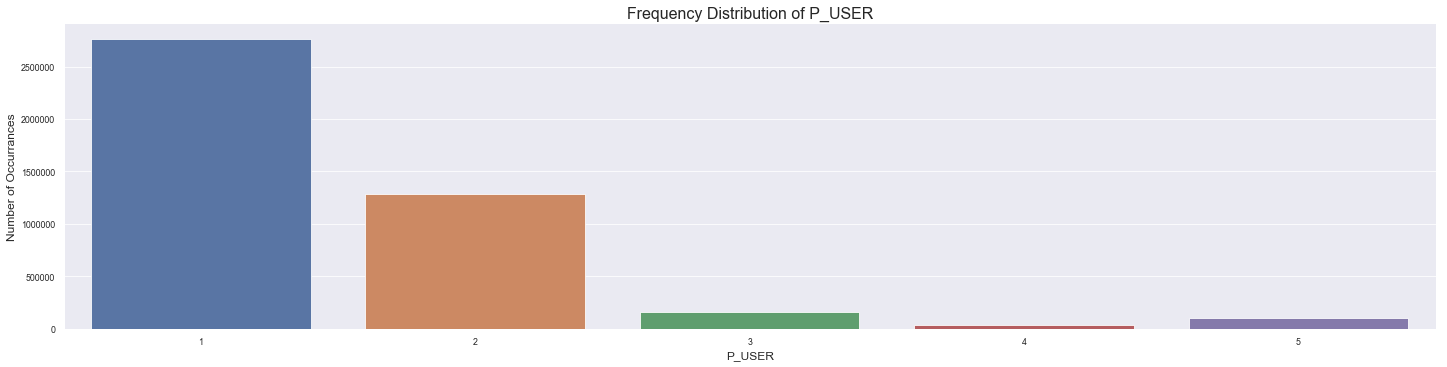

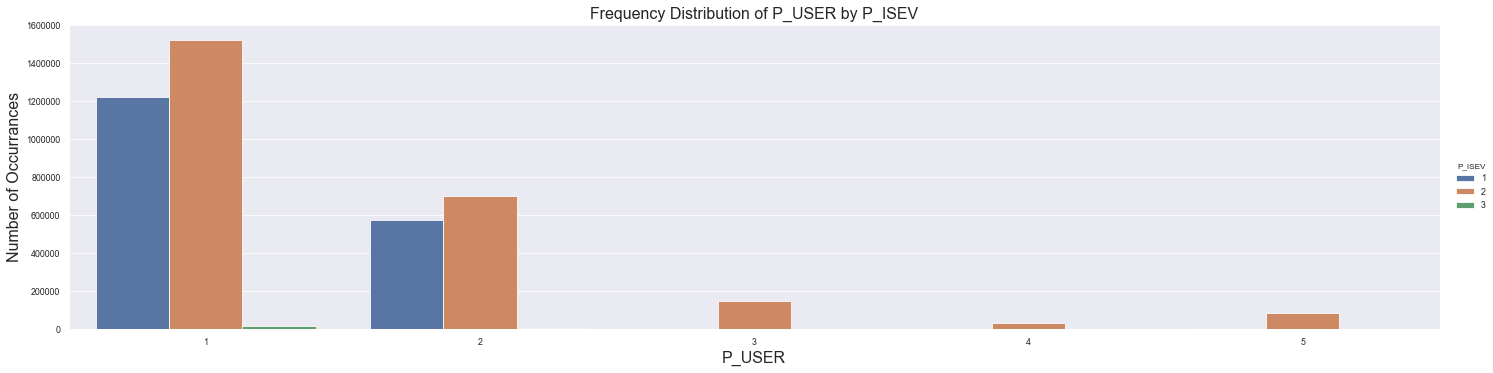

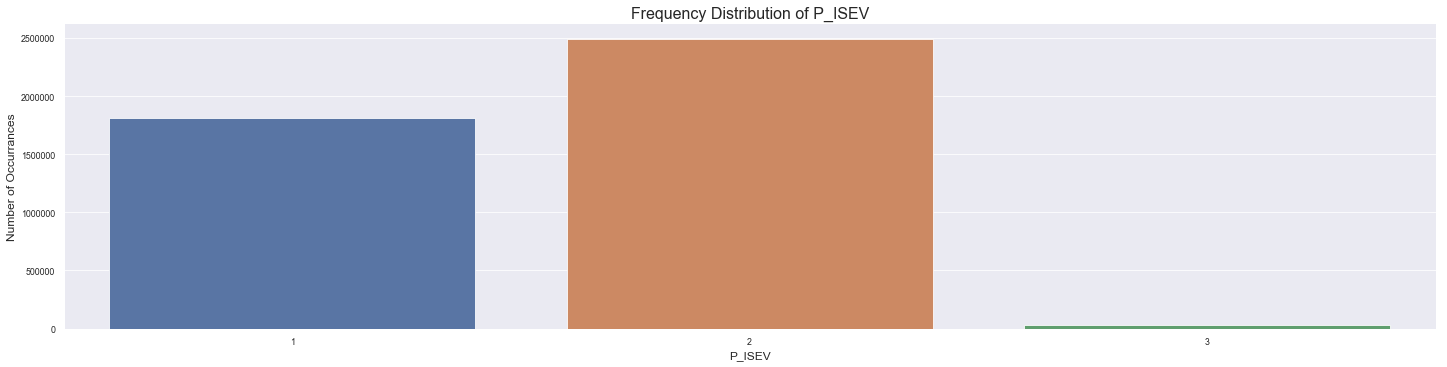

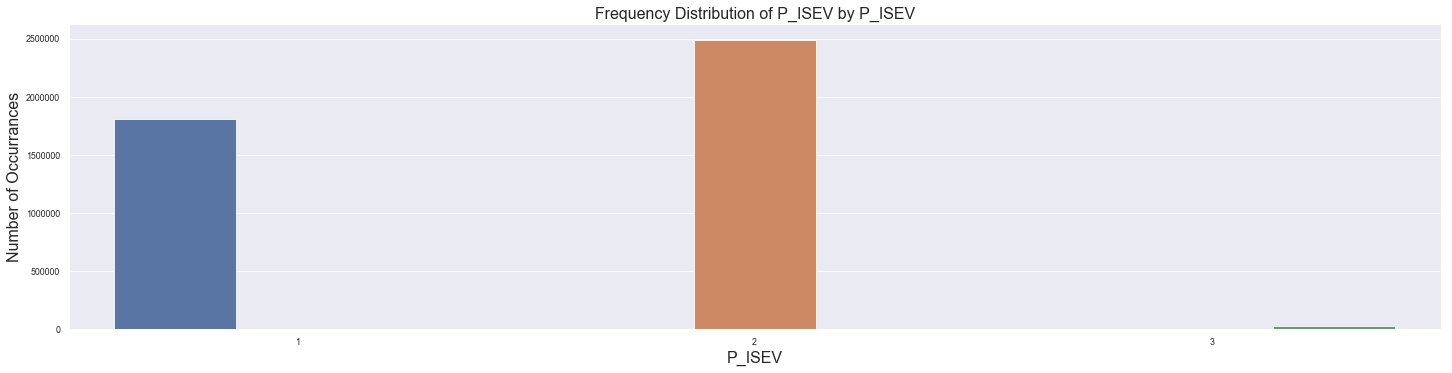

In [137]:
df_tmp = df_X.copy()
df_tmp['P_ISEV'] = df_Ym
for col in df_tmp.columns:
    g = sns.catplot(x = col, data=df_tmp, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    
    h = sns.catplot(col, data=df_tmp, kind="count", legend = True, height = 5, aspect = 4, hue = 'P_ISEV')
    h.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0} by P_ISEV'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.show()

### Box Plot

C:\Users\pradeep\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


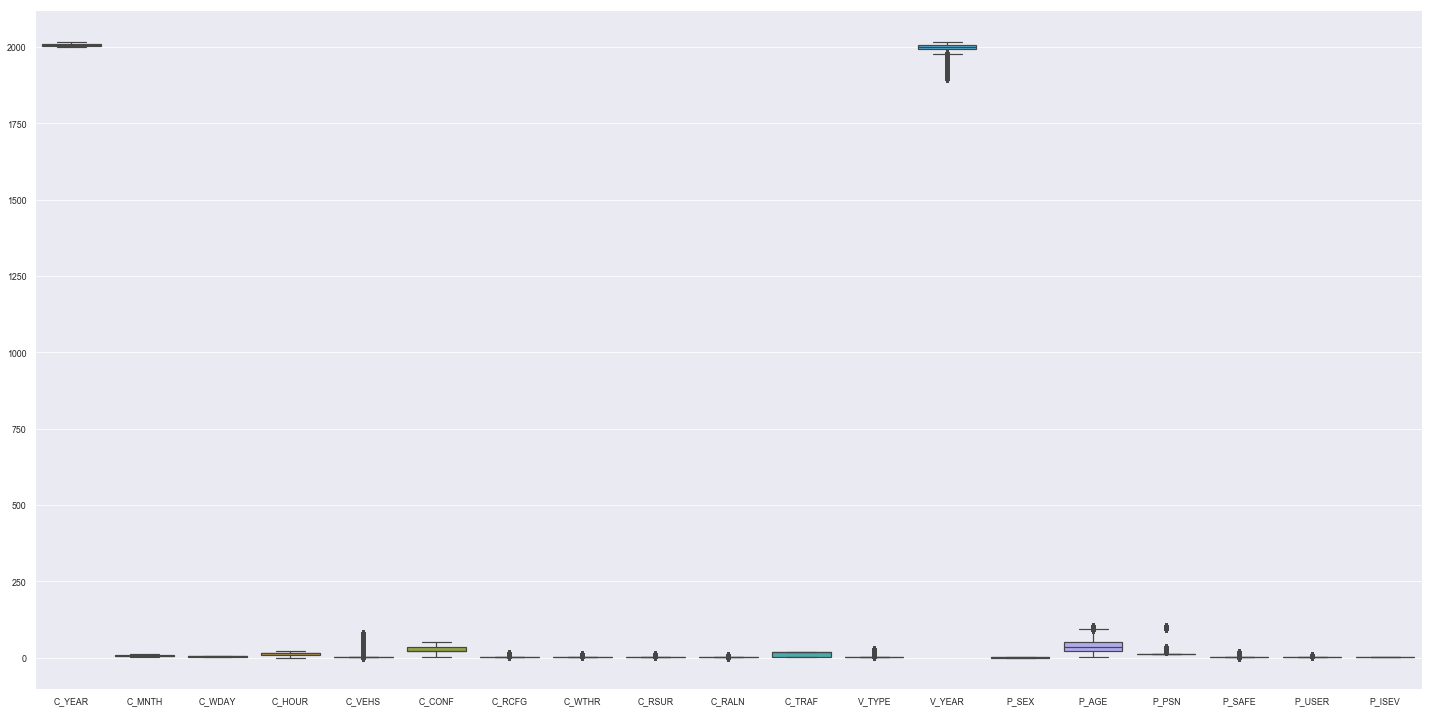

<Figure size 360x720 with 0 Axes>

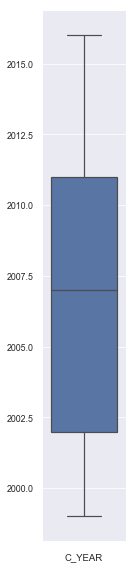

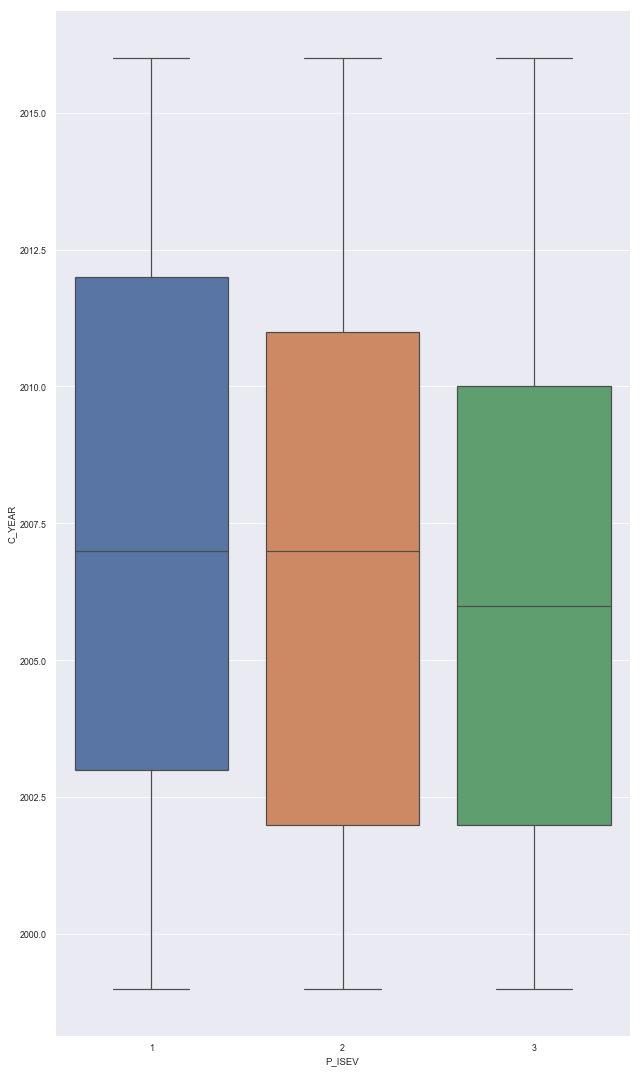

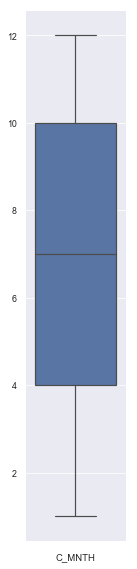

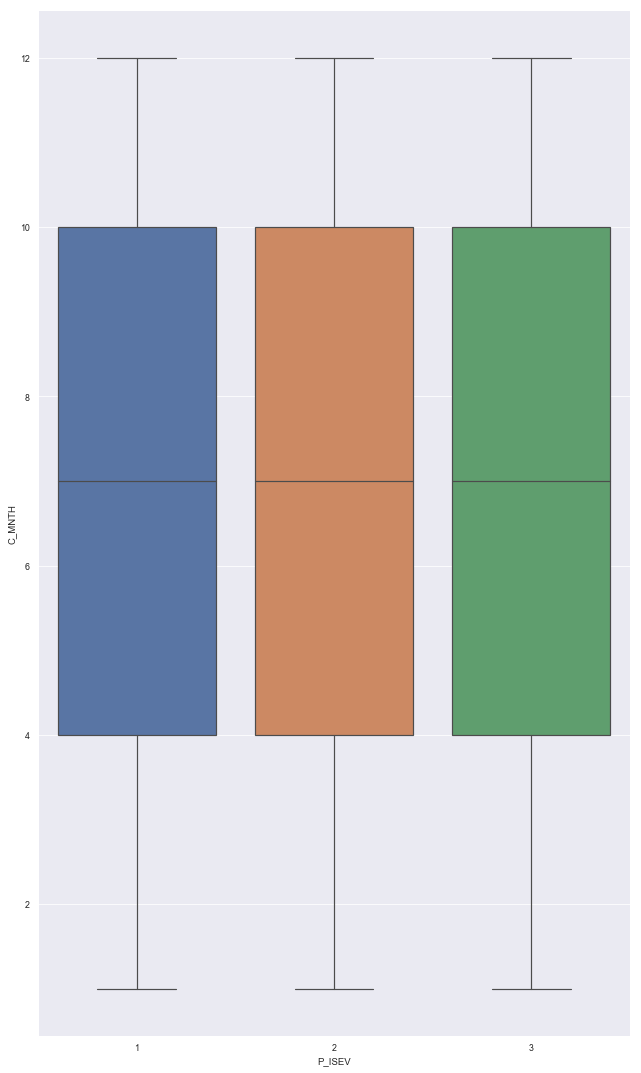

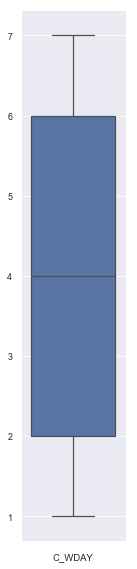

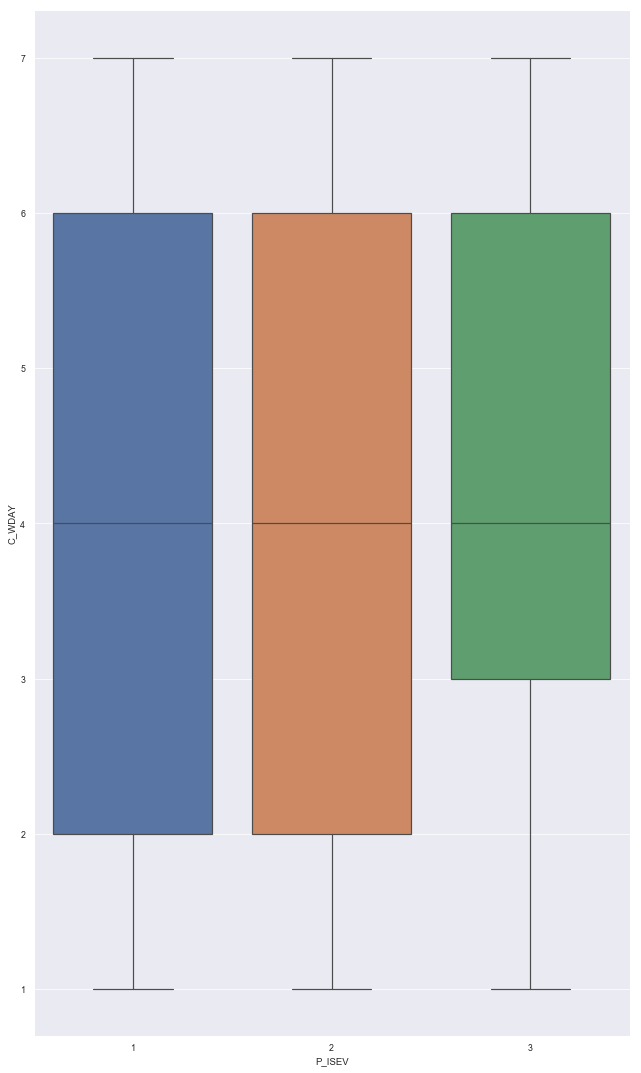

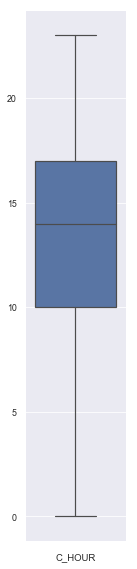

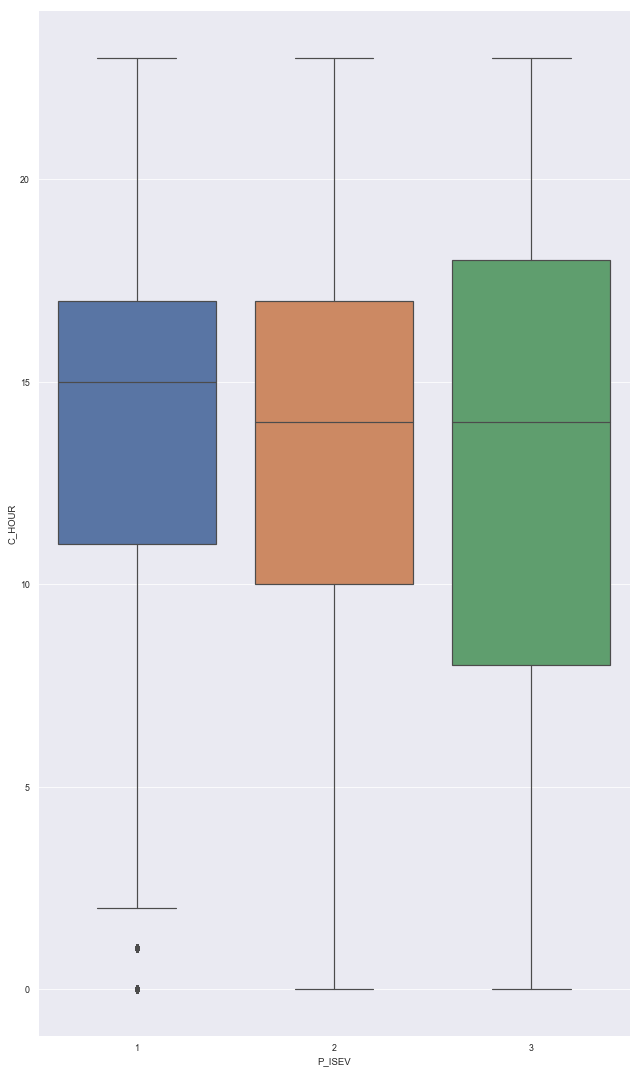

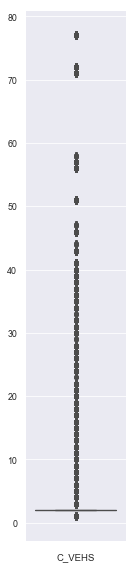

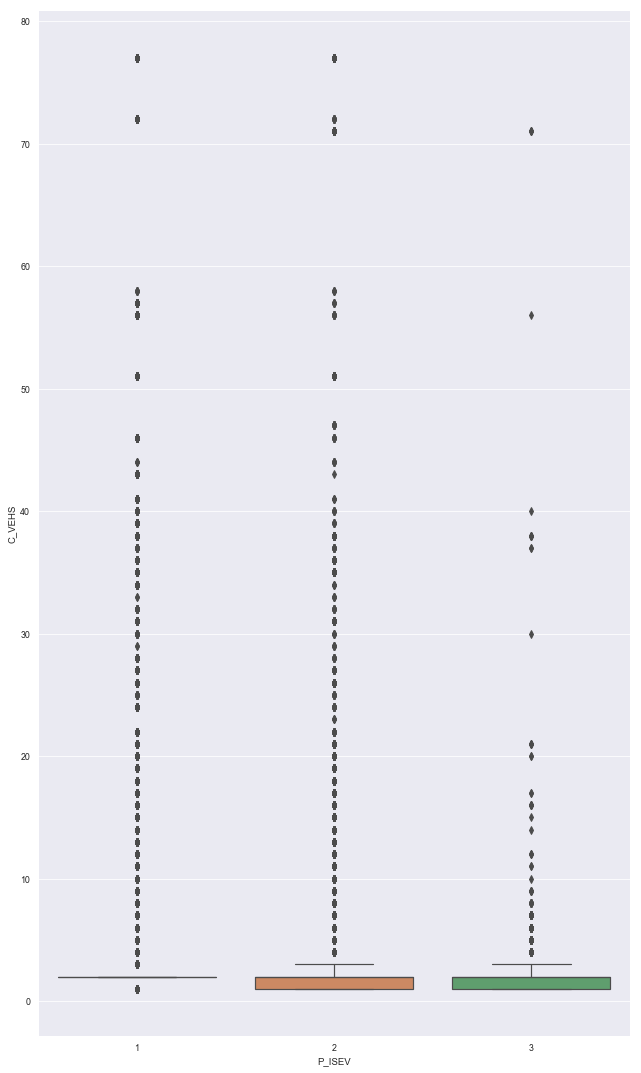

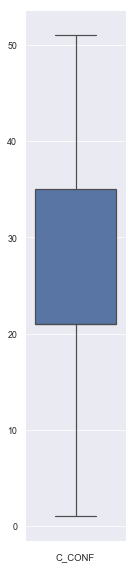

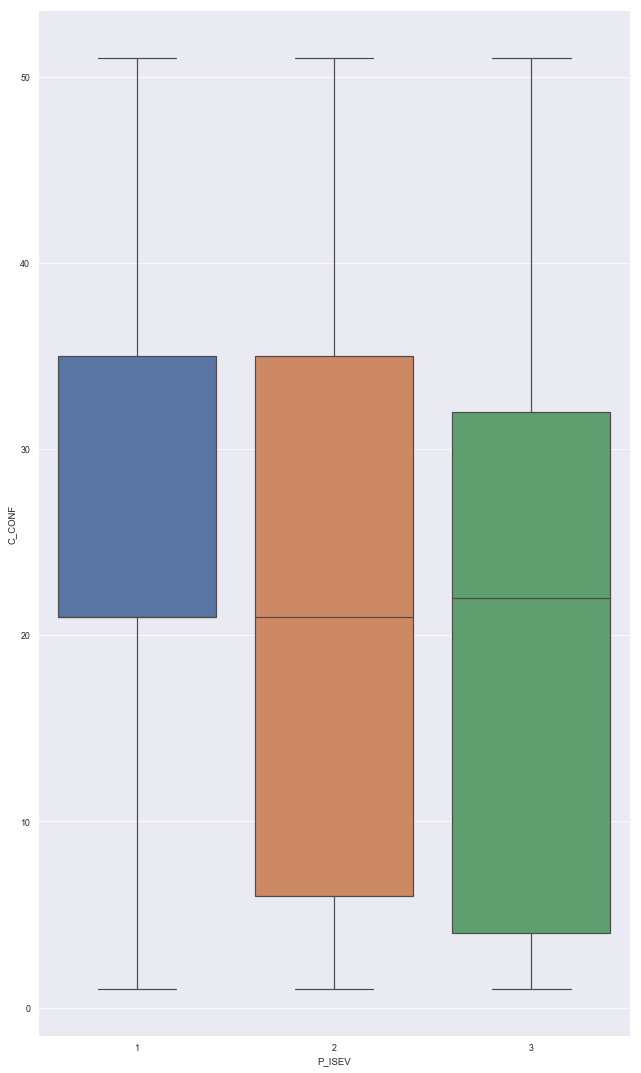

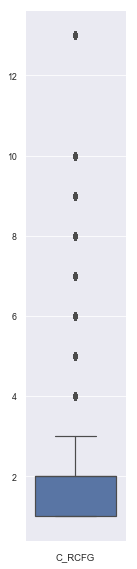

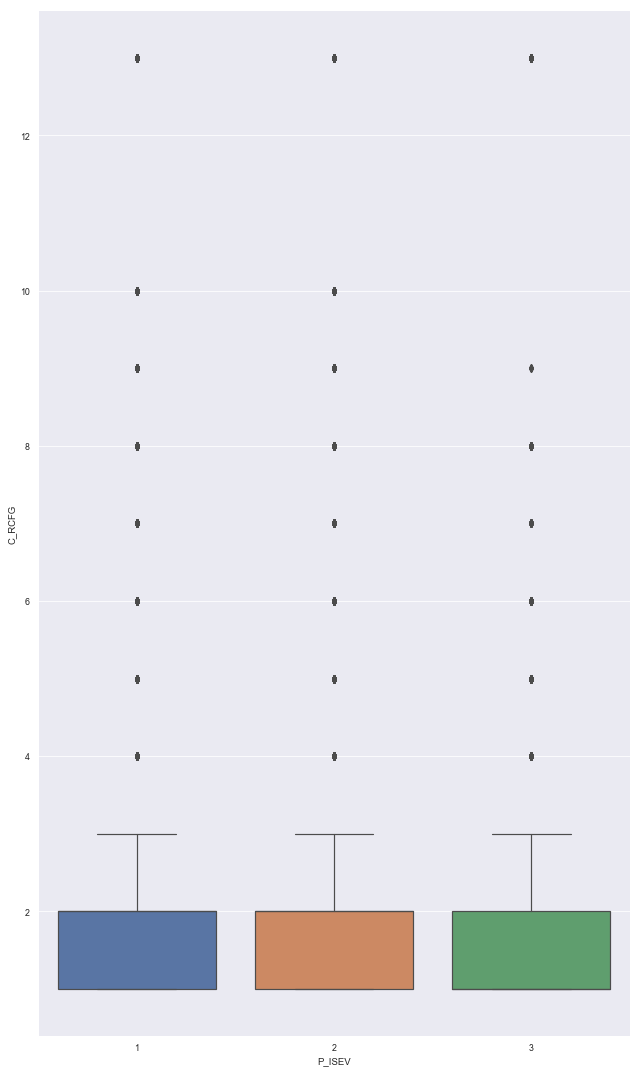

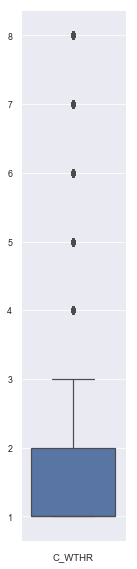

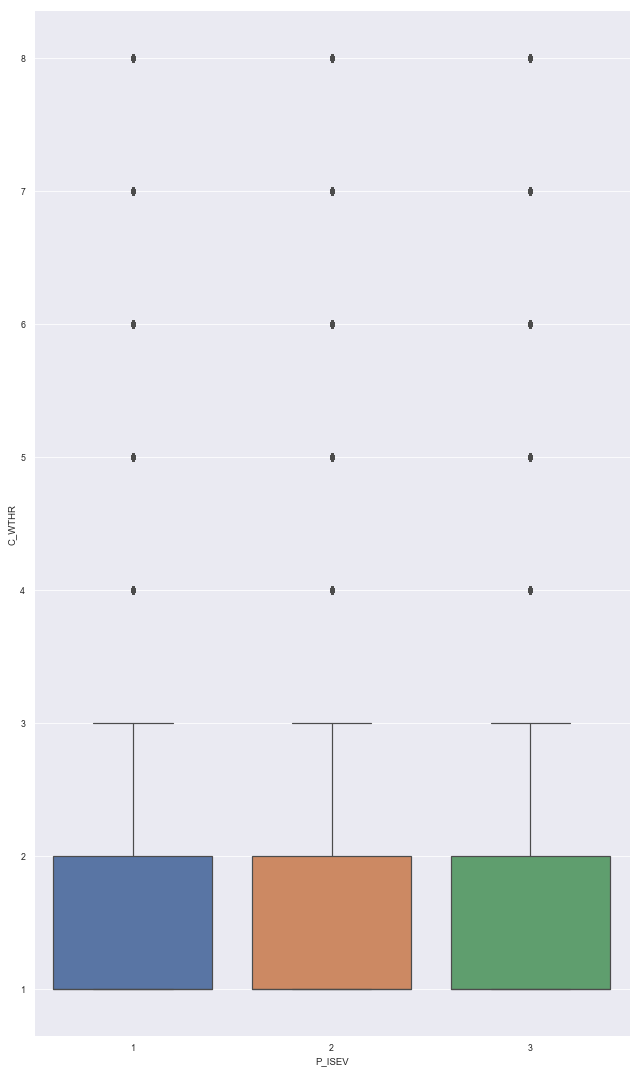

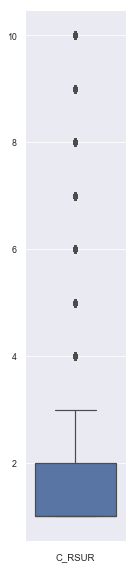

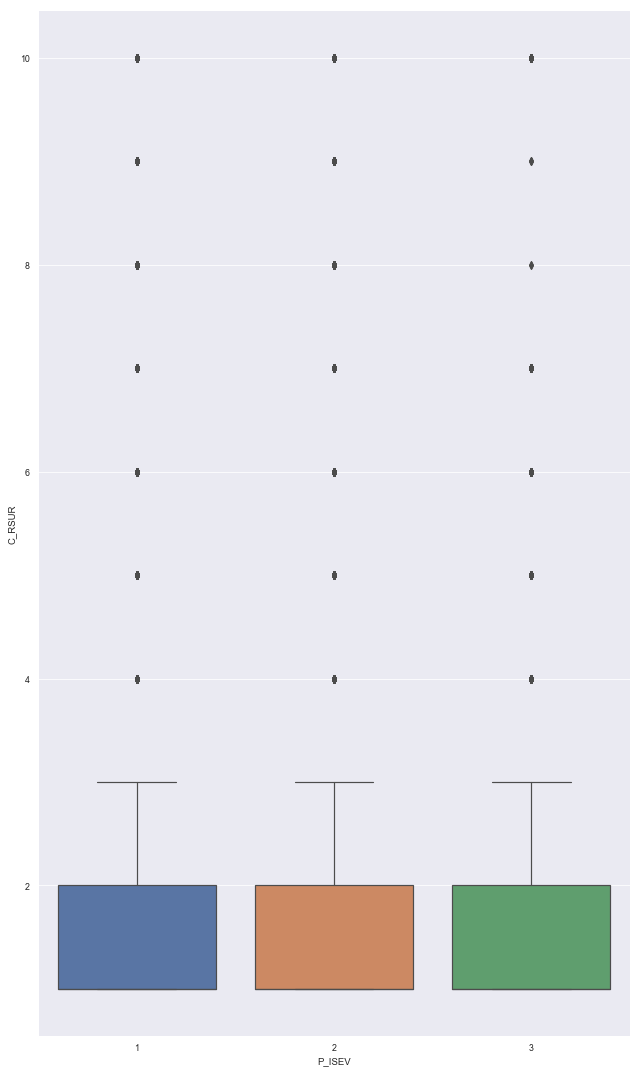

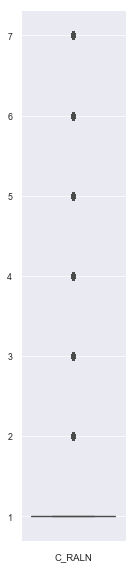

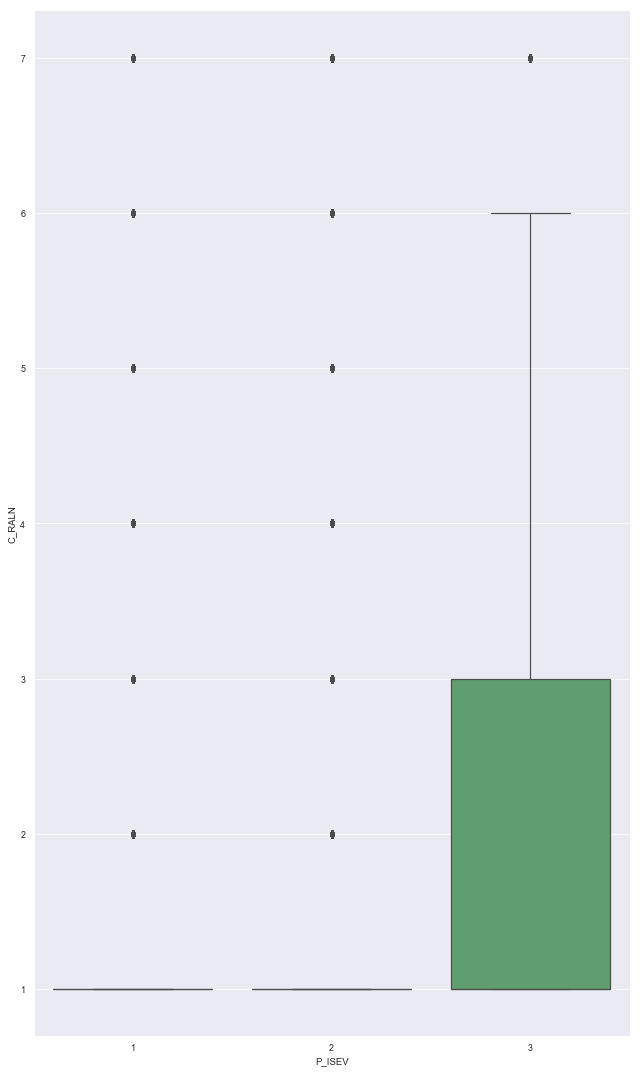

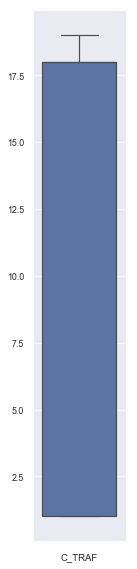

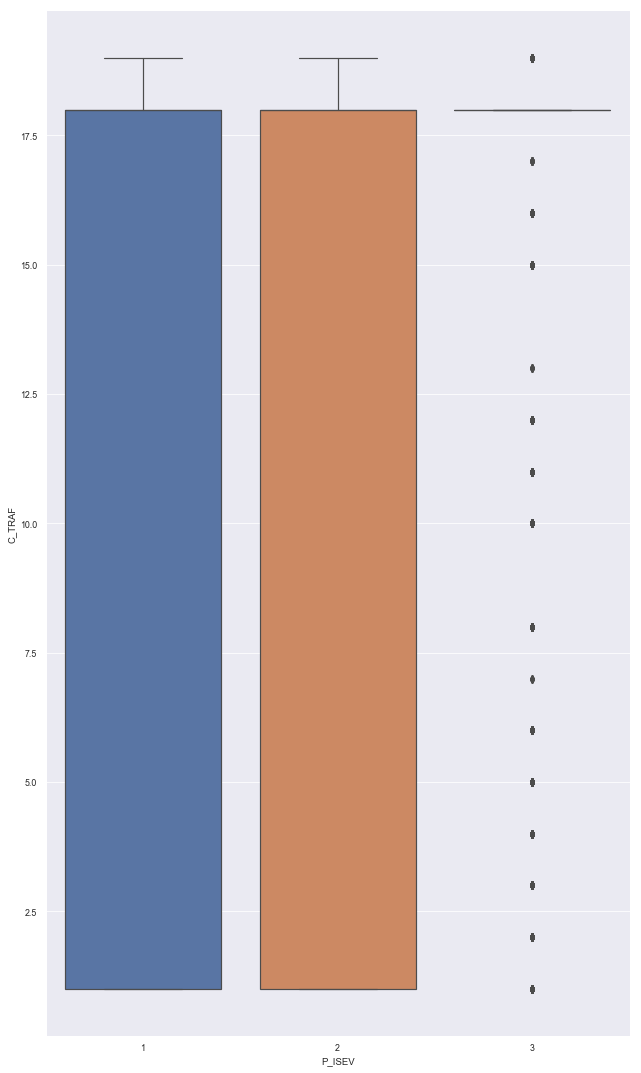

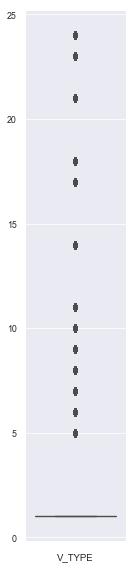

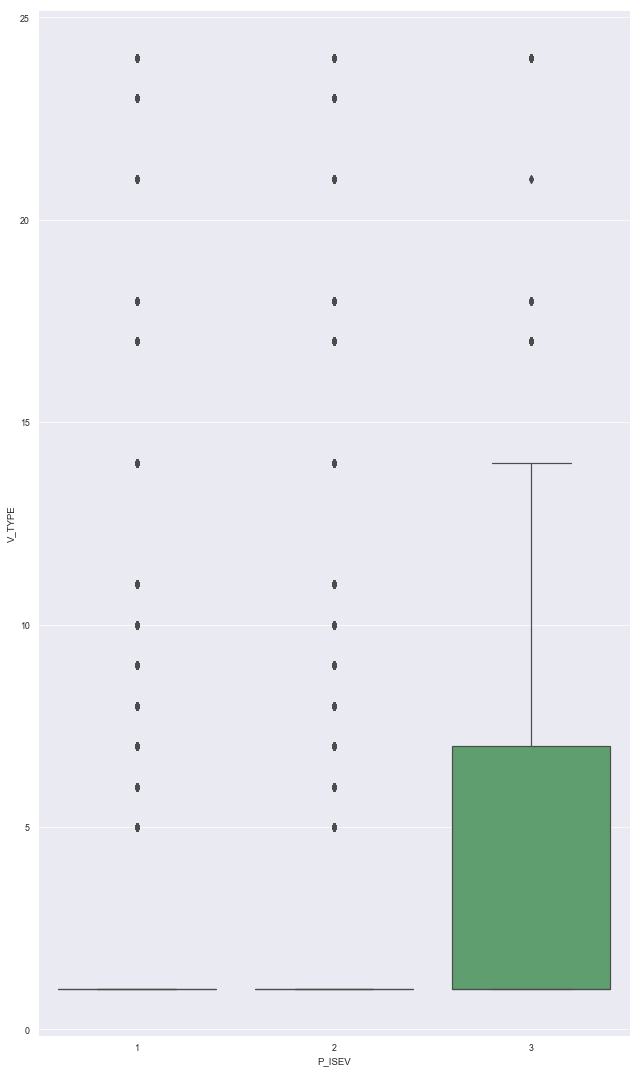

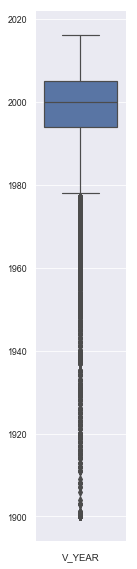

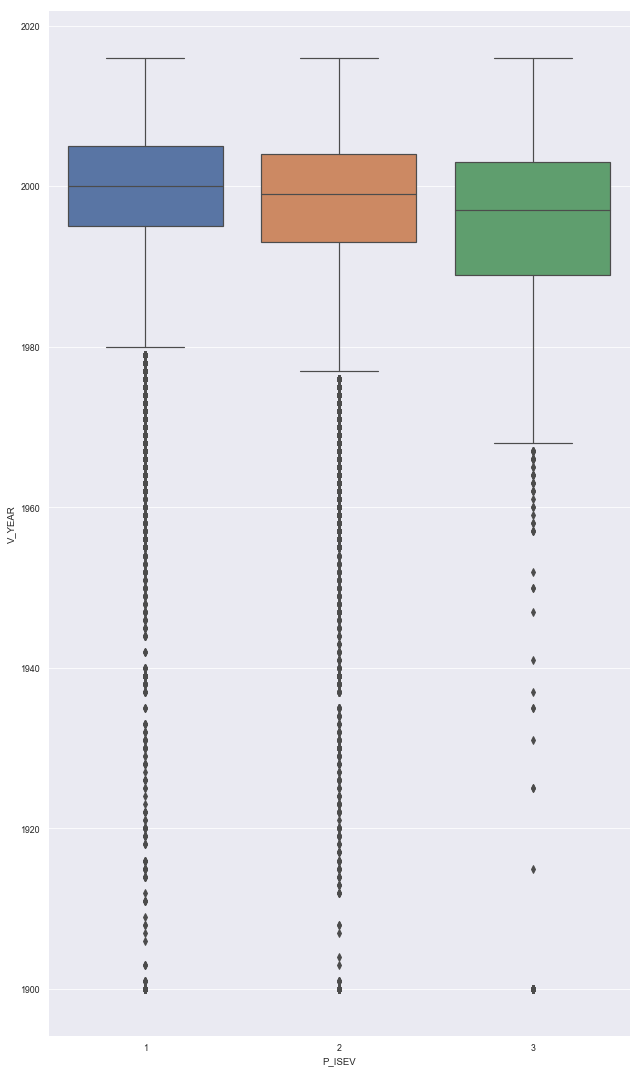

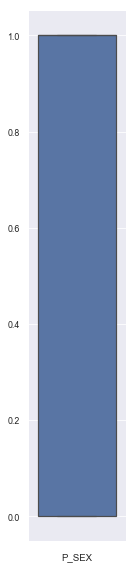

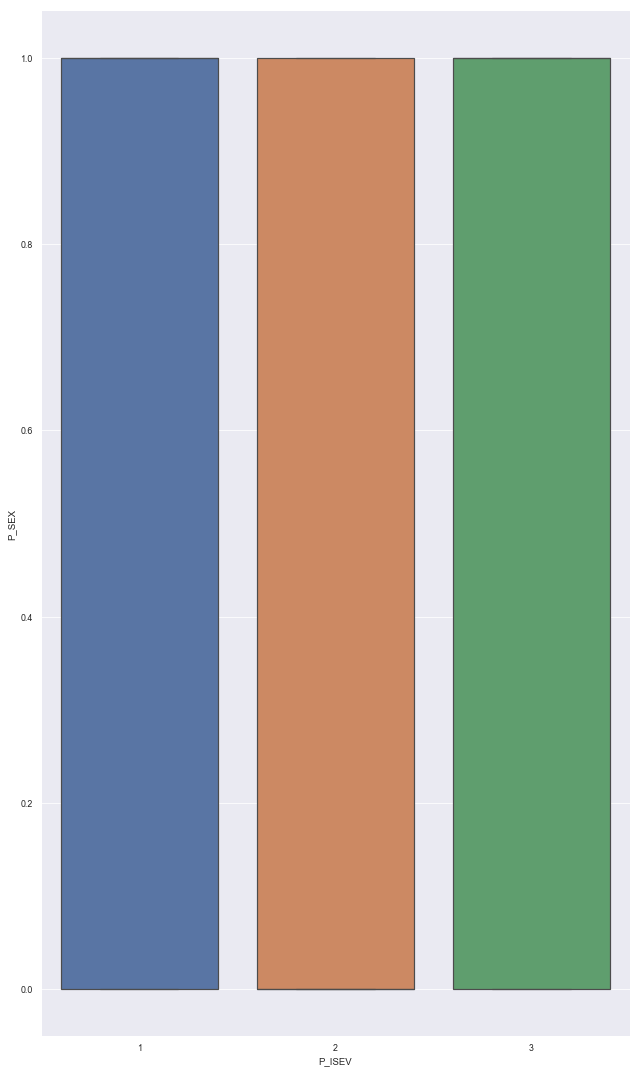

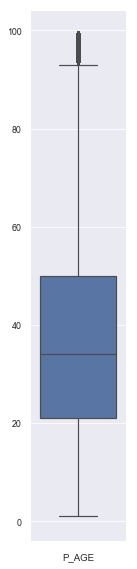

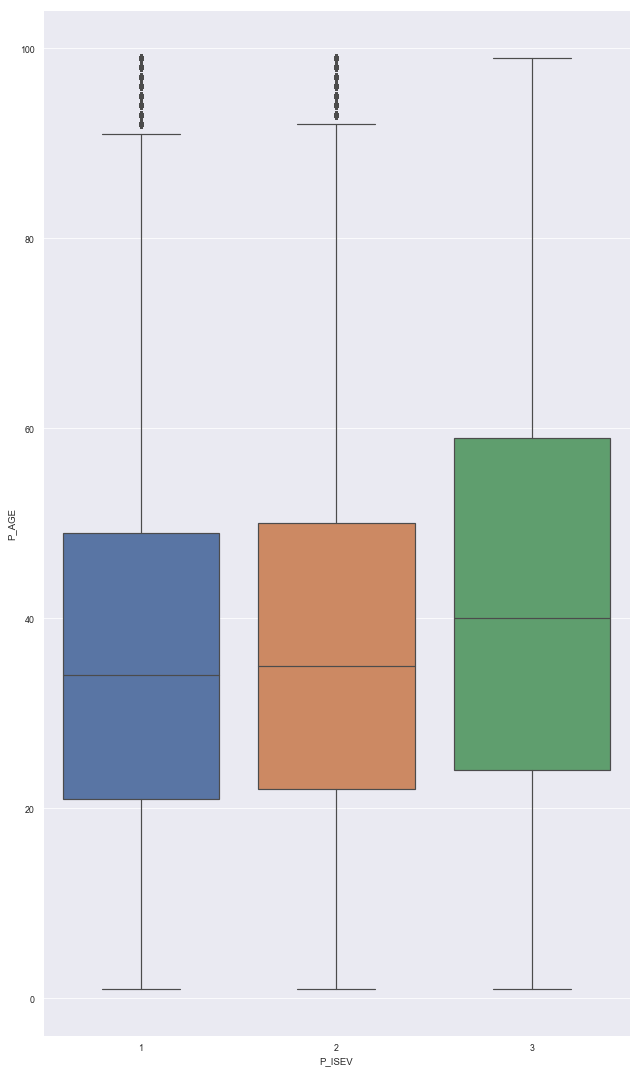

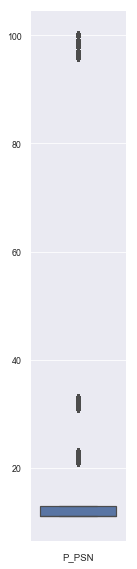

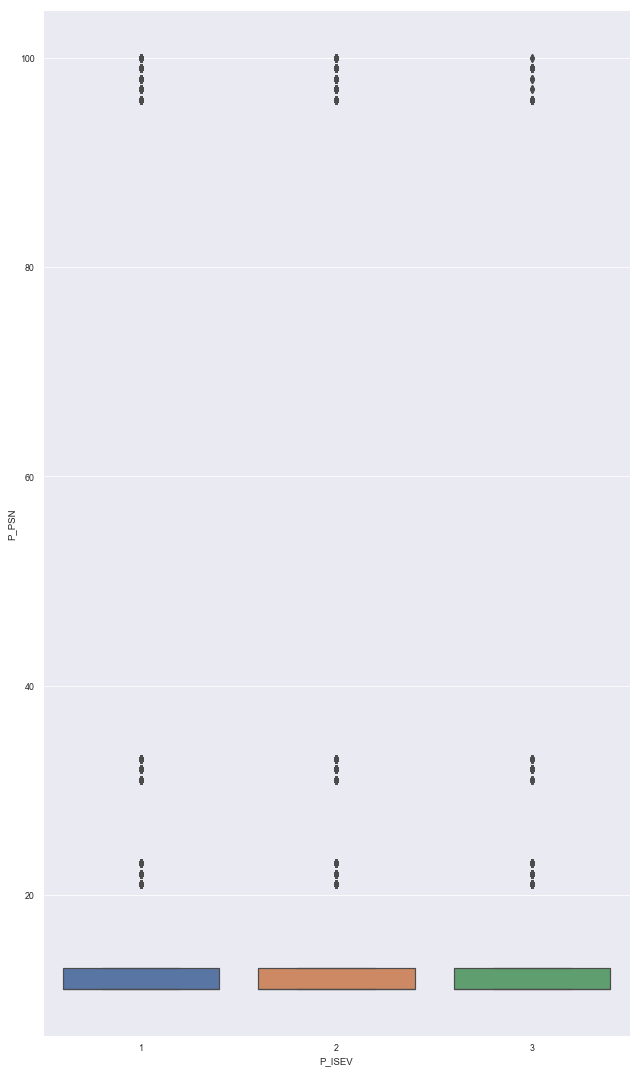

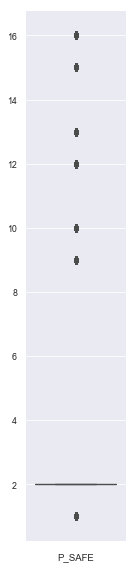

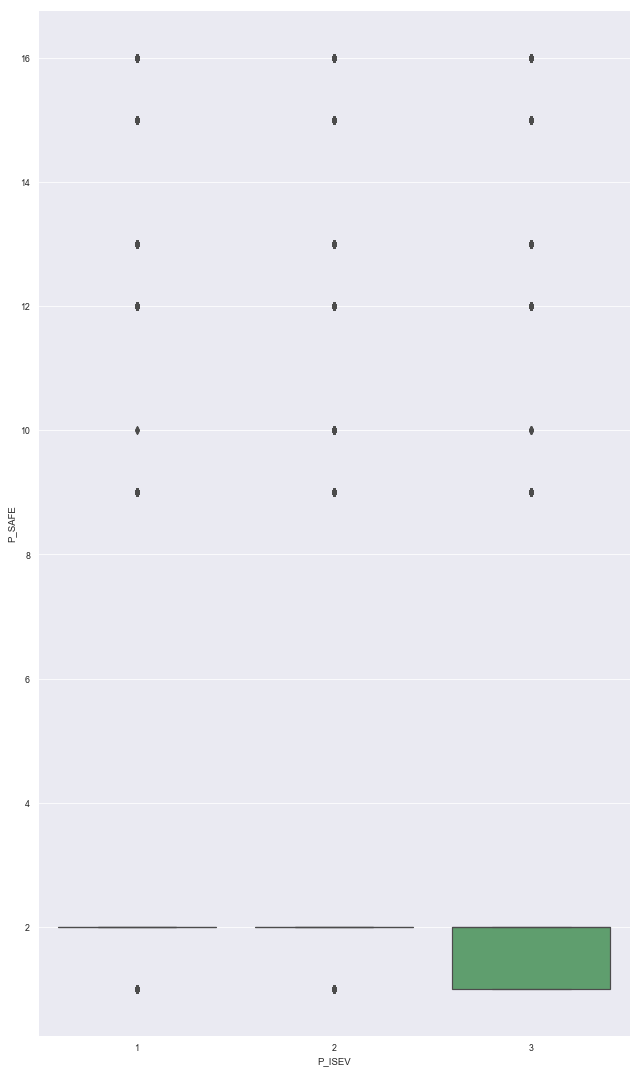

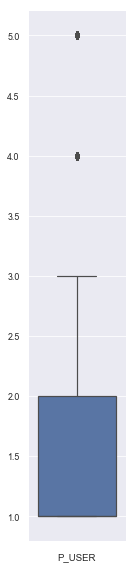

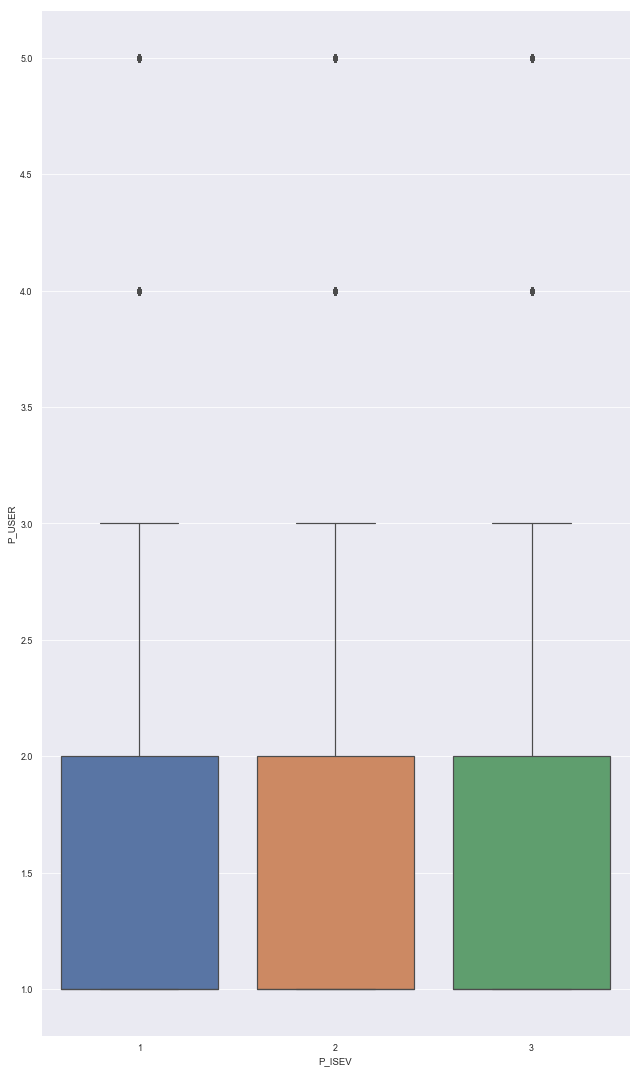

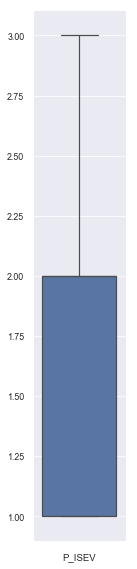

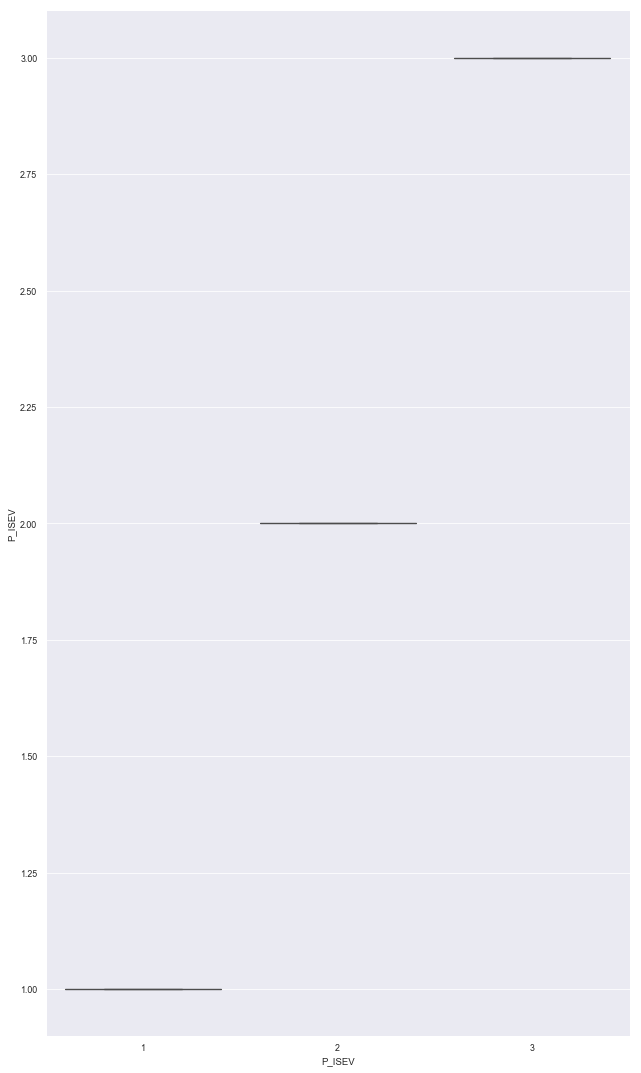

In [138]:
g = sns.catplot(data=df_tmp, kind="box", orient="v", height = 10, aspect = 2)
g.set_xticklabels(step=1)

plt.figure(figsize=(5,10))
for col in df.columns:
    g = sns.catplot(col, data=df_tmp, kind="box", orient="v", height = 8, aspect = 0.25)
    g.set_xticklabels(step=1)
    
    h = sns.catplot(x = 'P_ISEV', y = col, data=df_tmp, kind="box", orient="v", height = 15, aspect = 0.6, legend = True)
    h.set_xticklabels(step=1)

<Figure size 864x864 with 0 Axes>

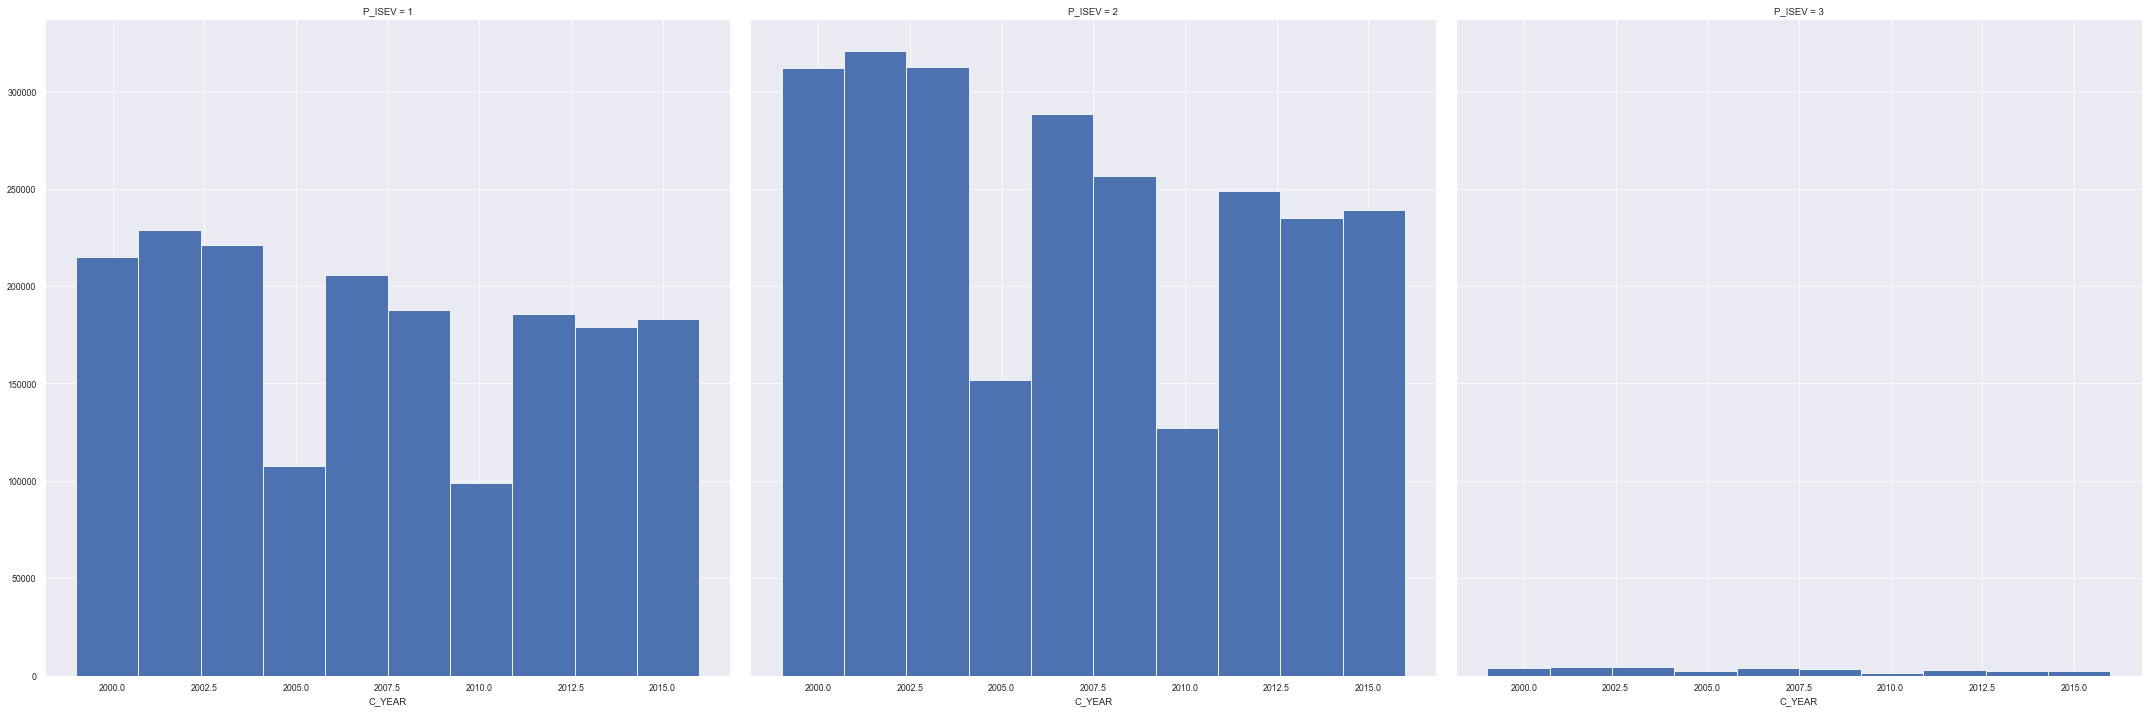

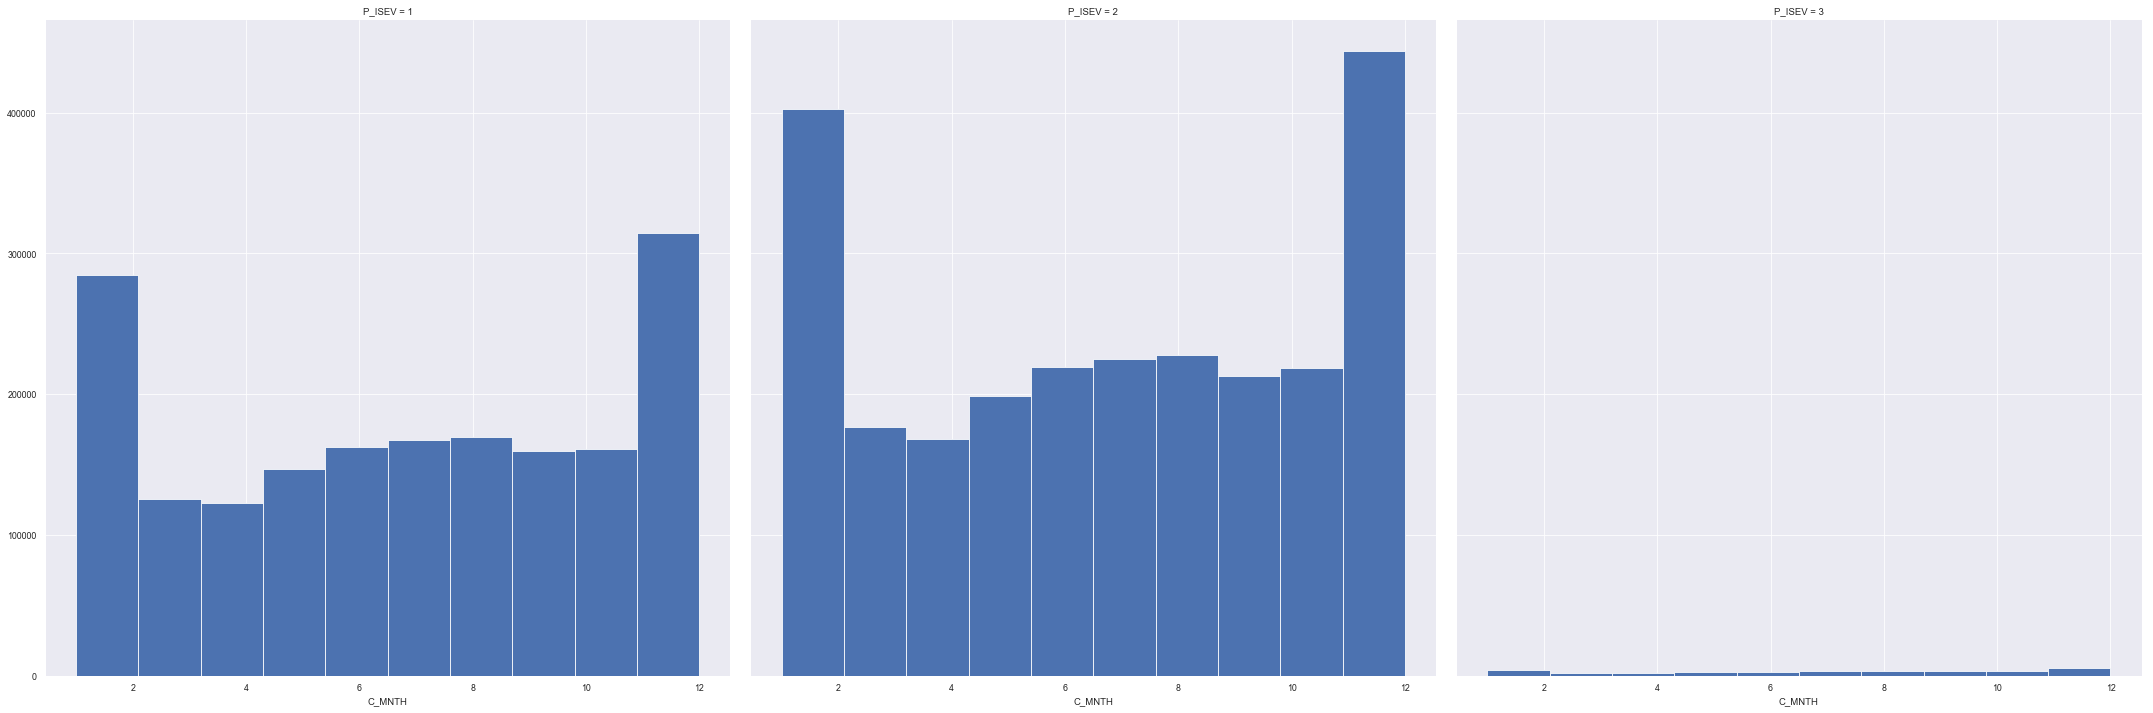

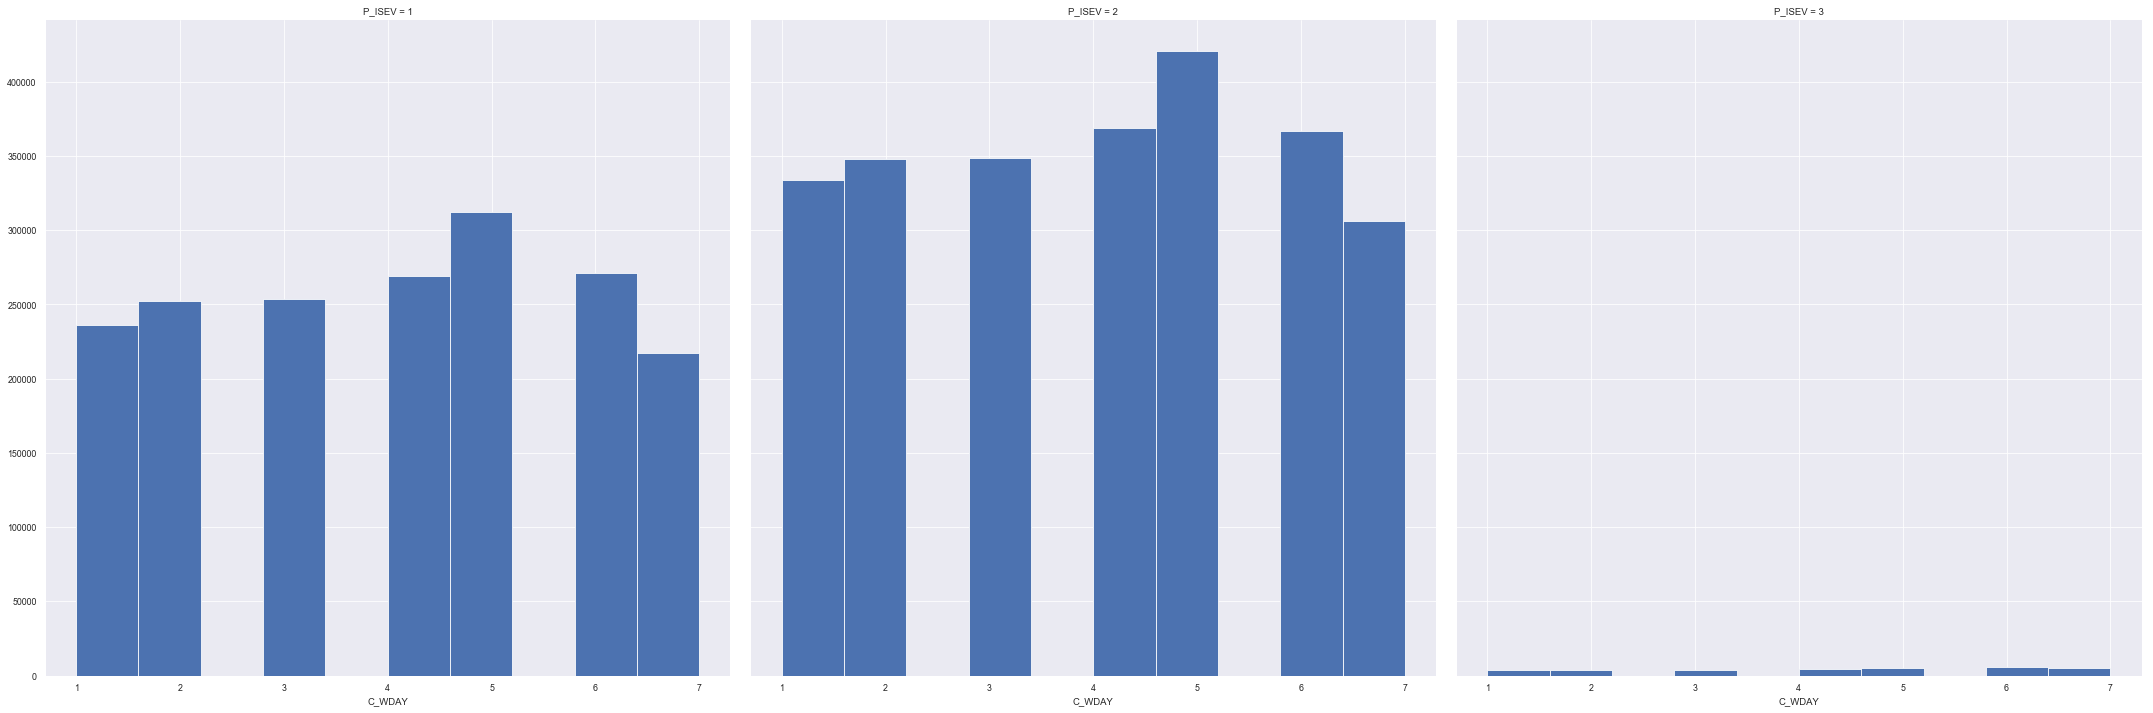

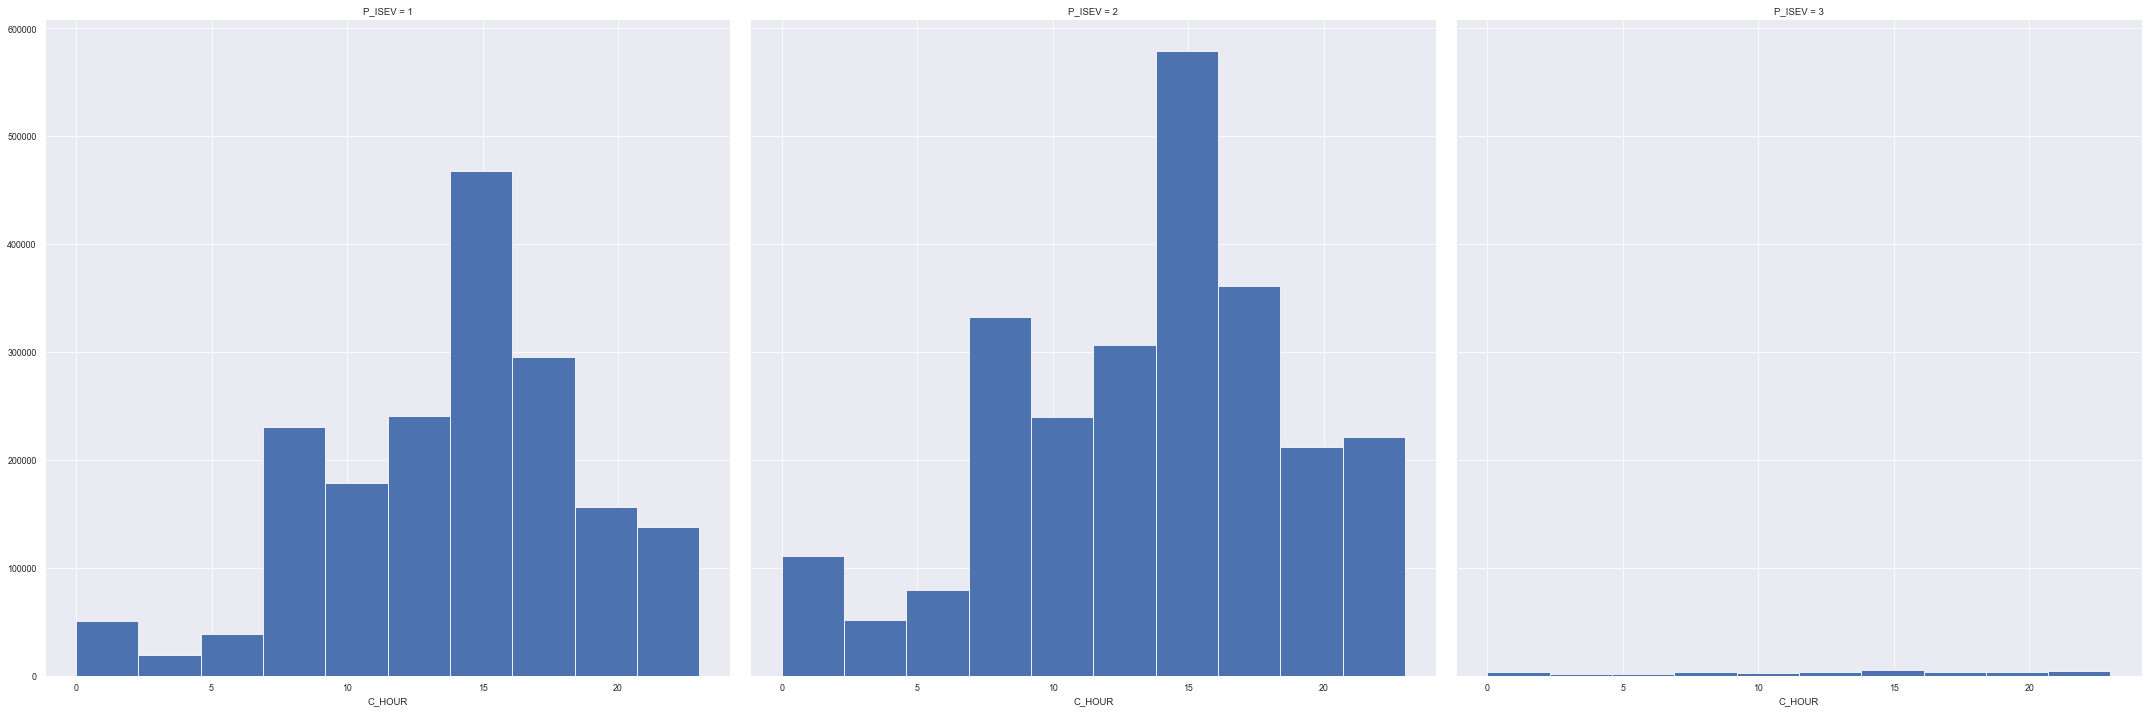

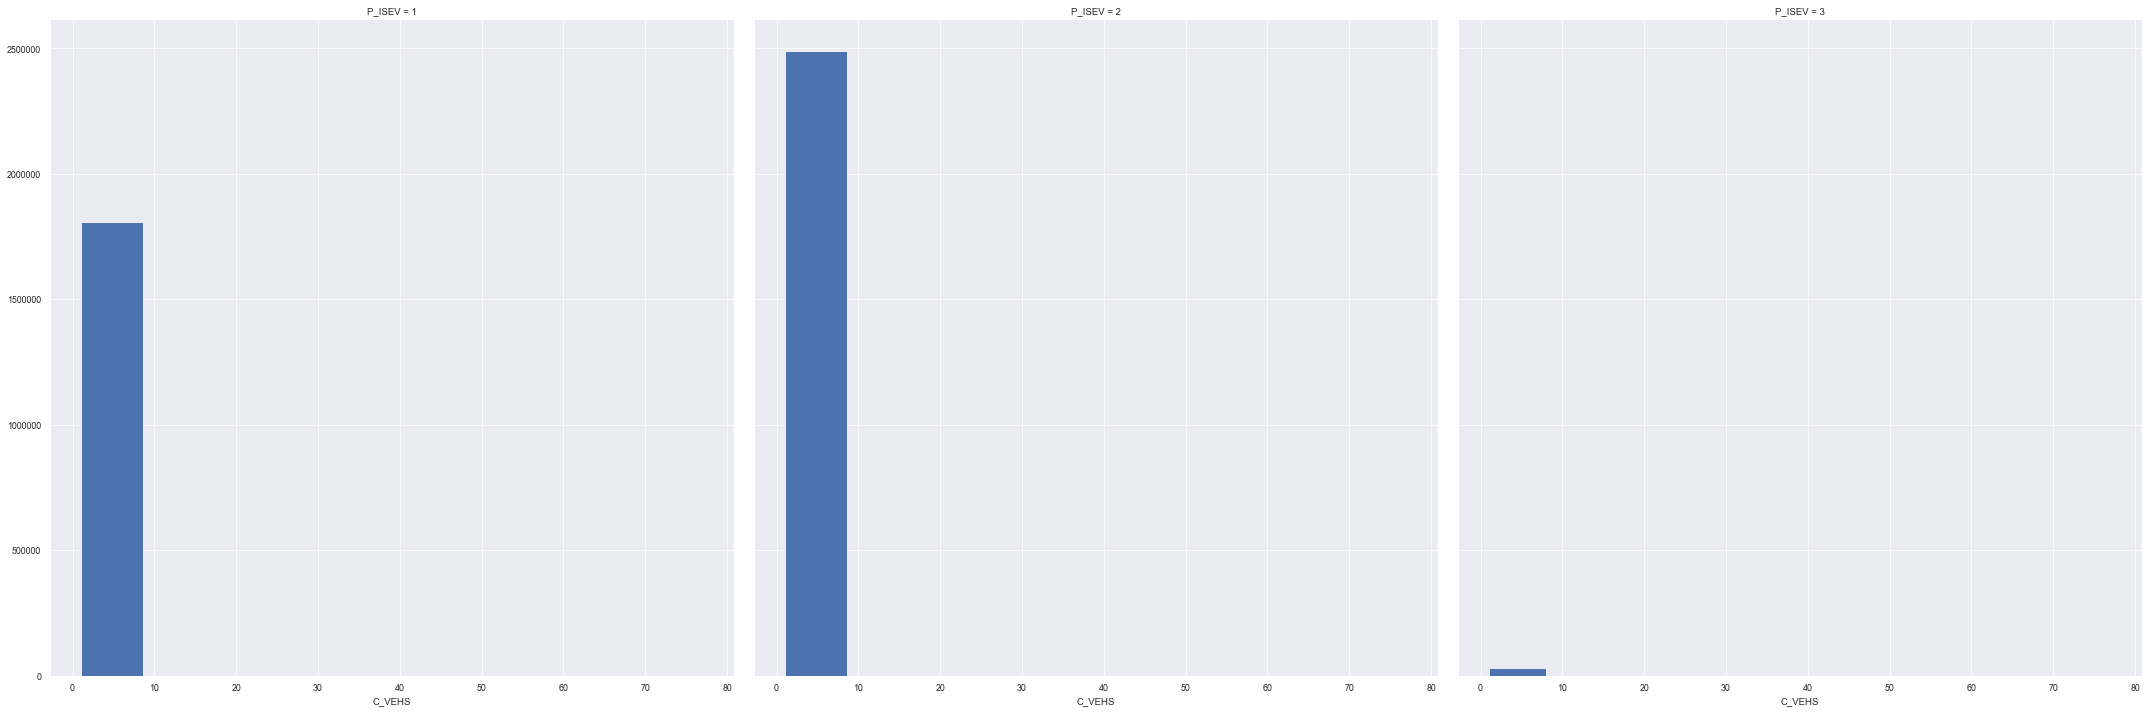

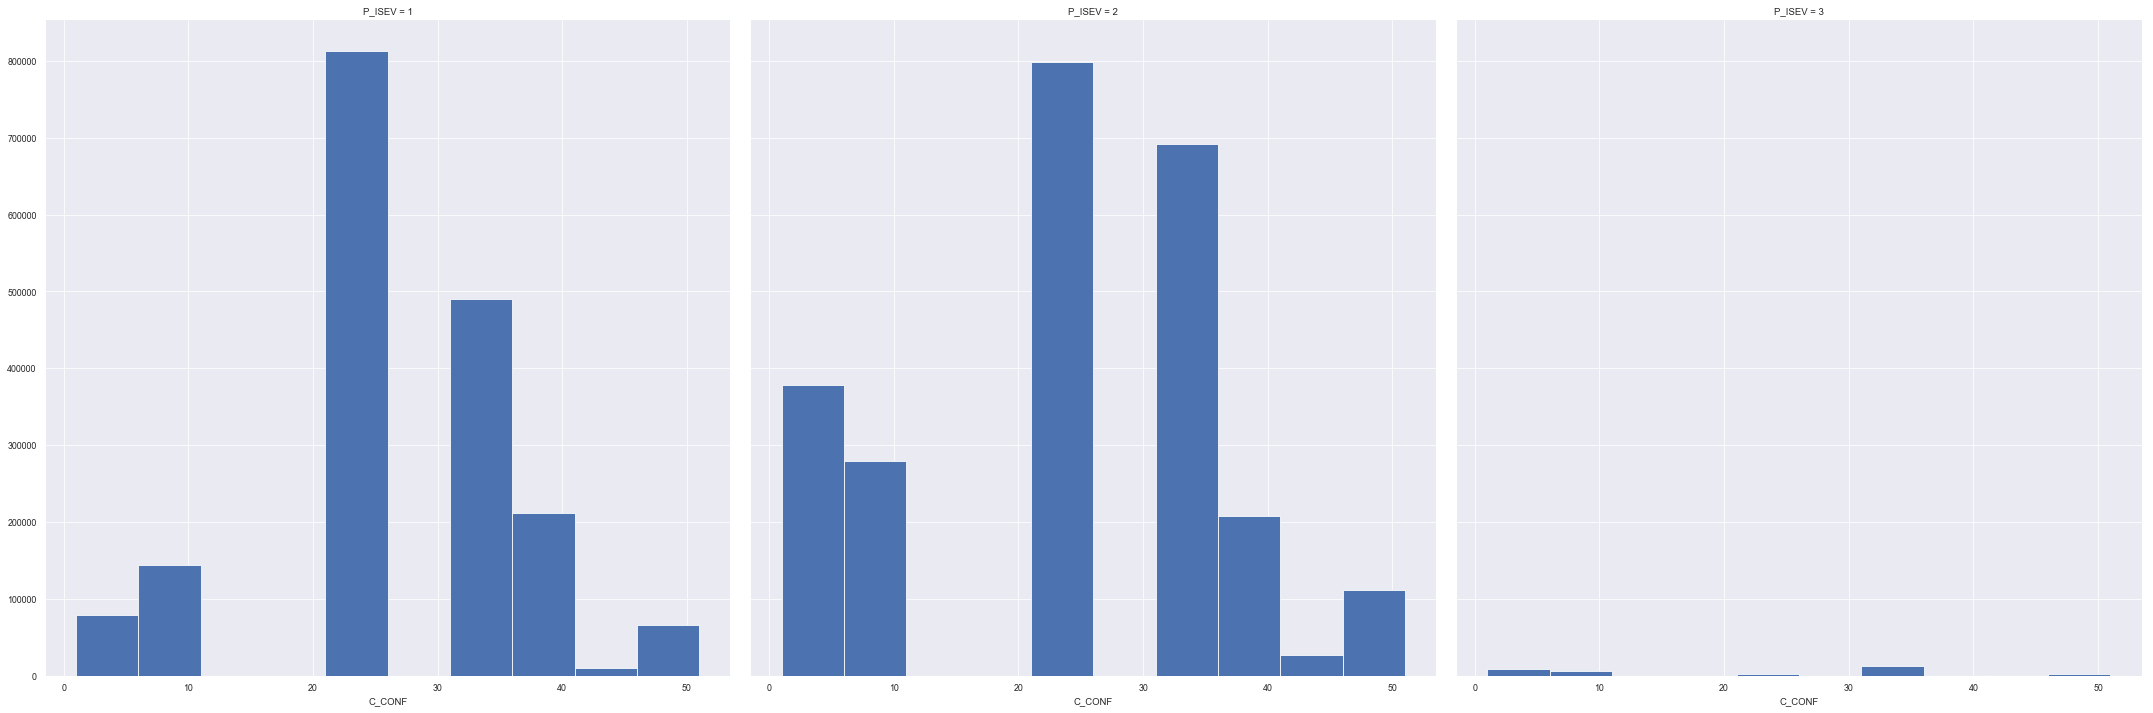

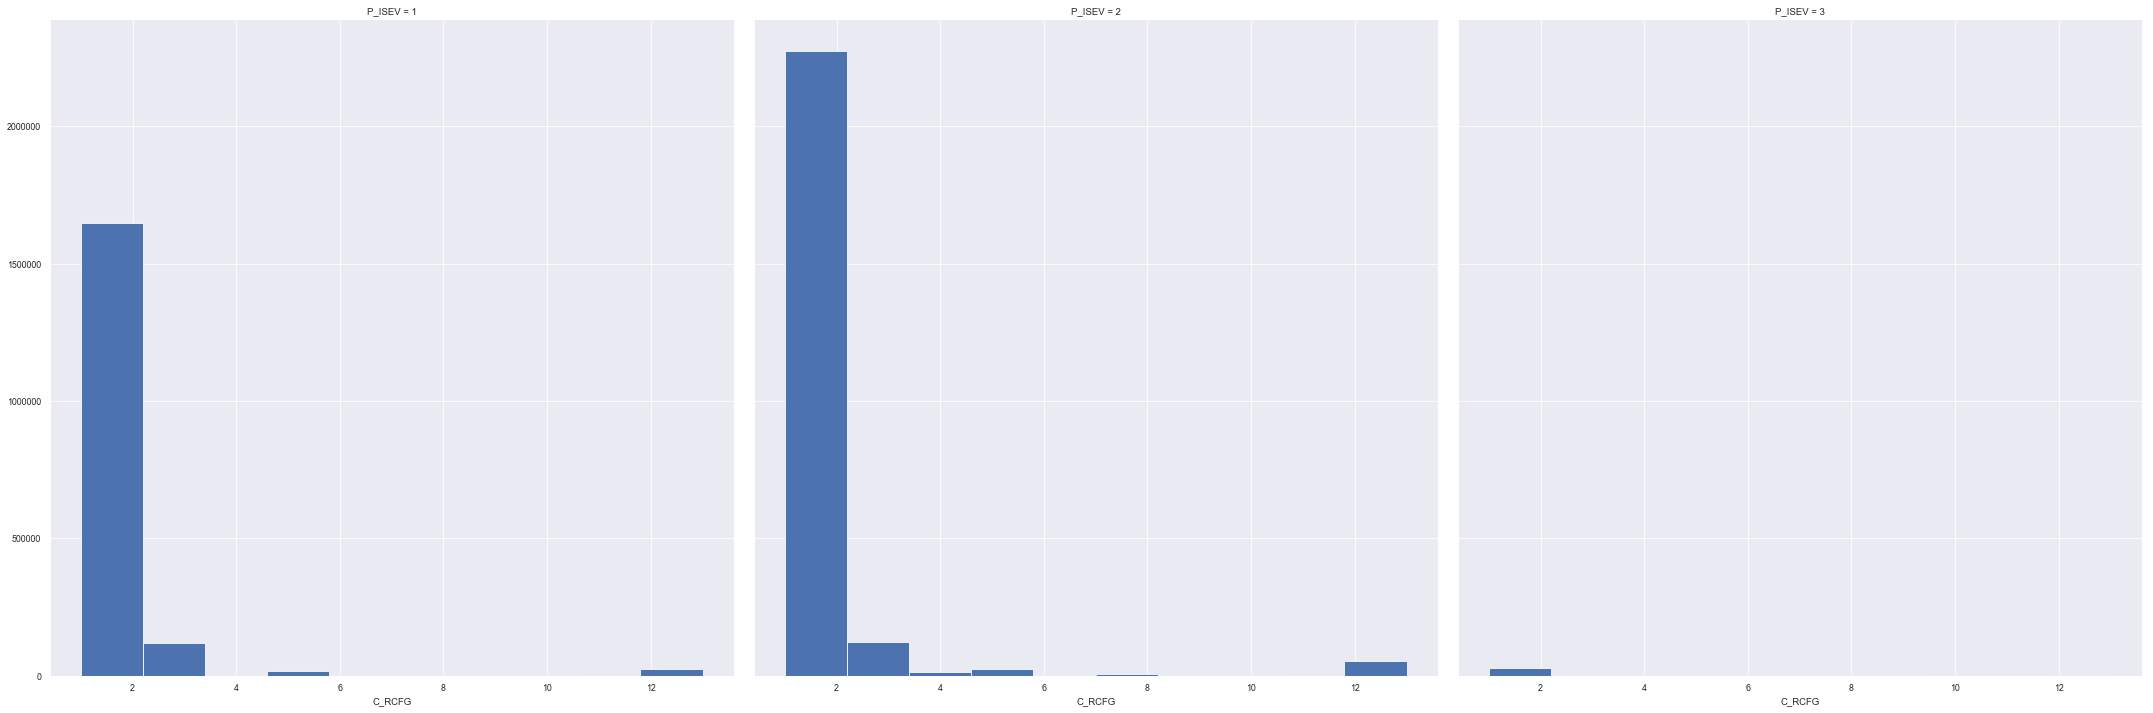

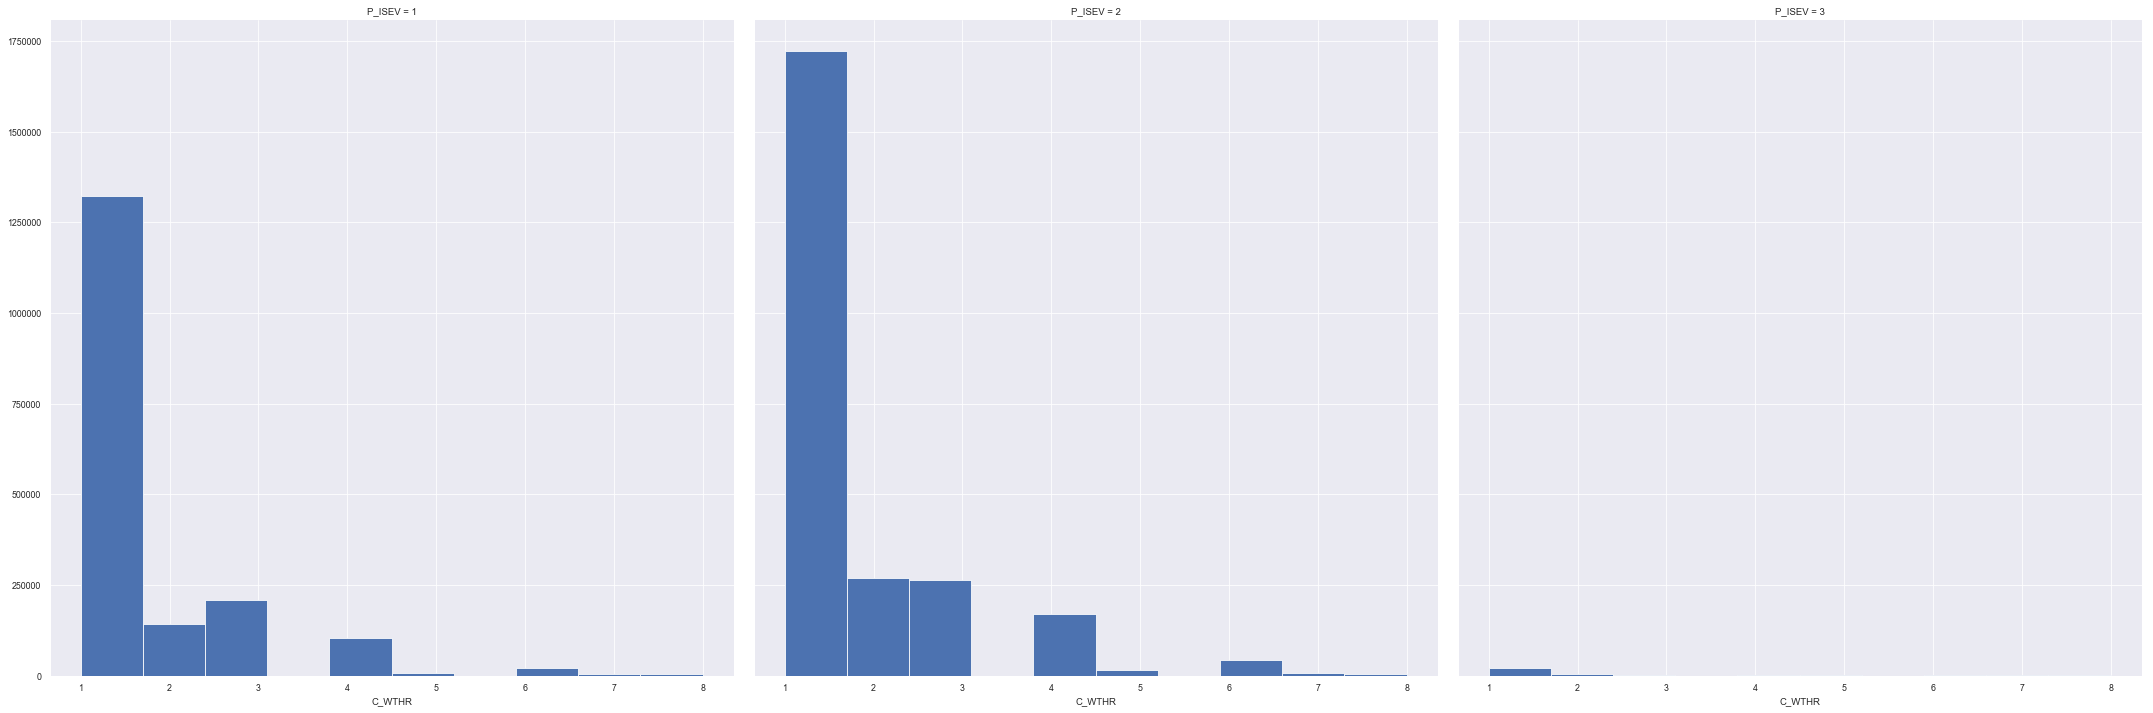

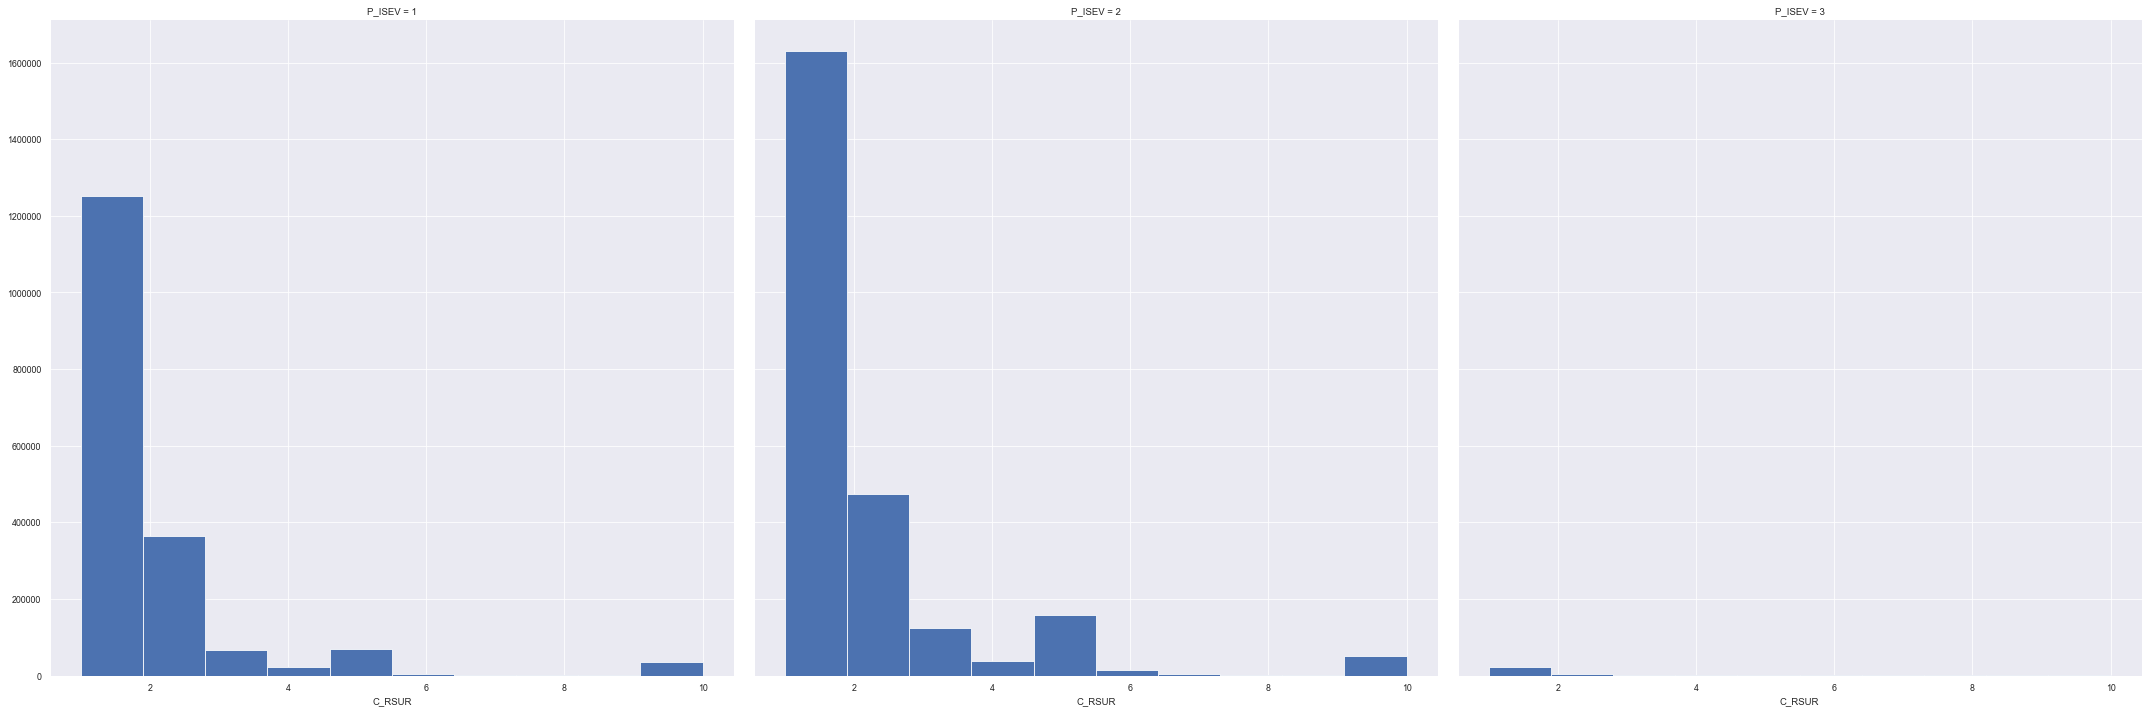

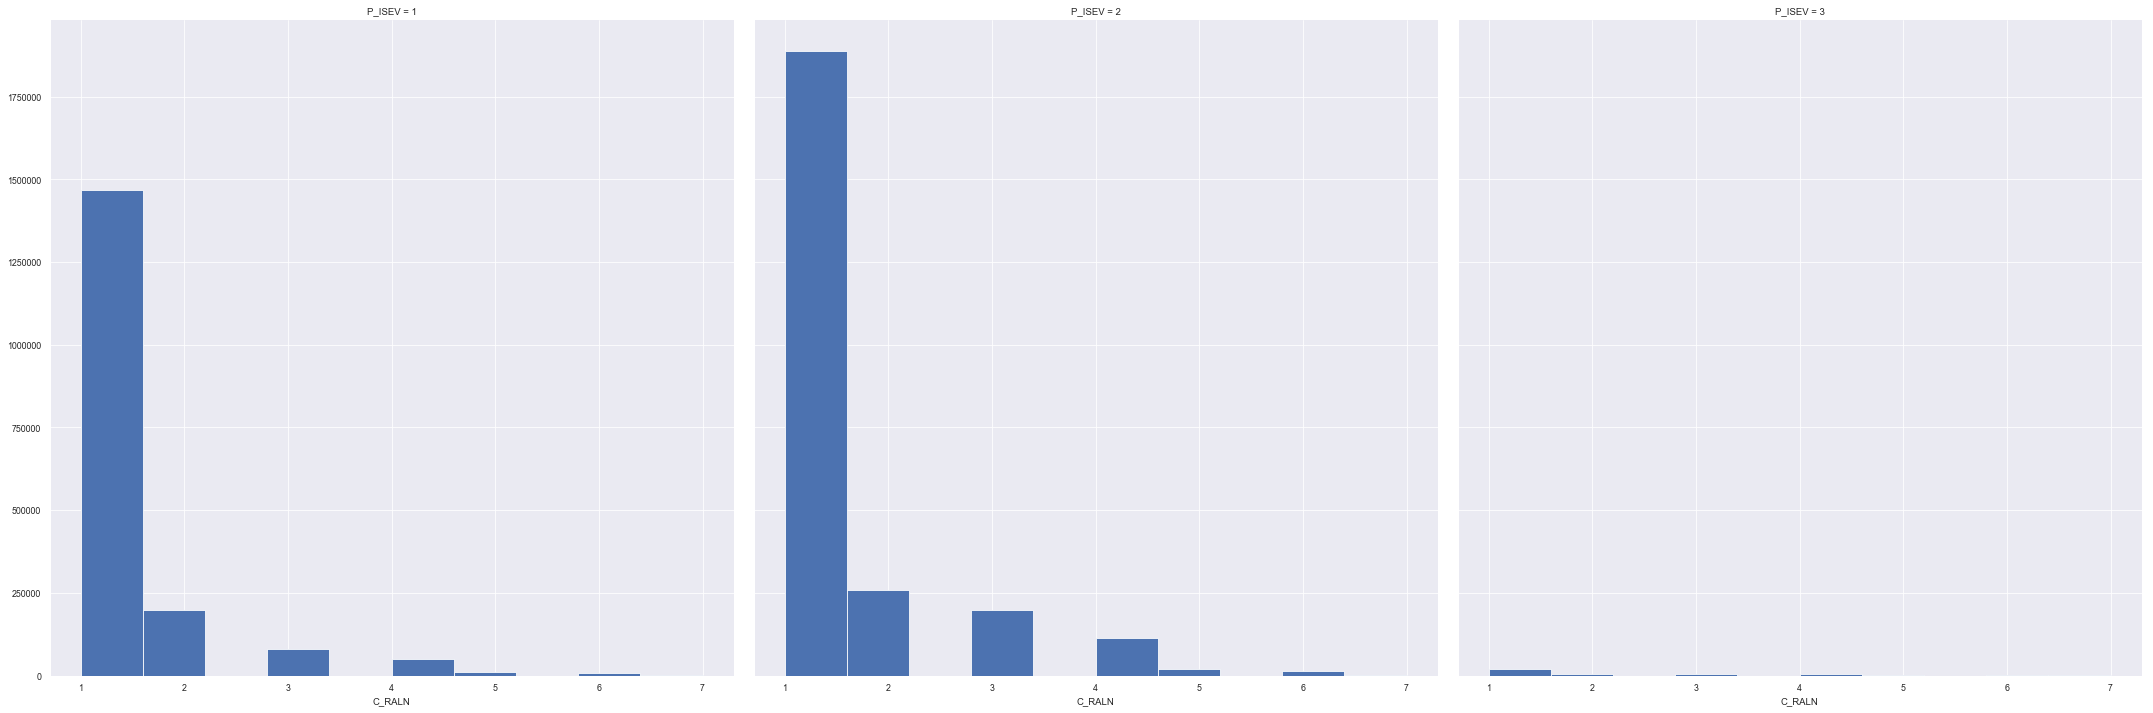

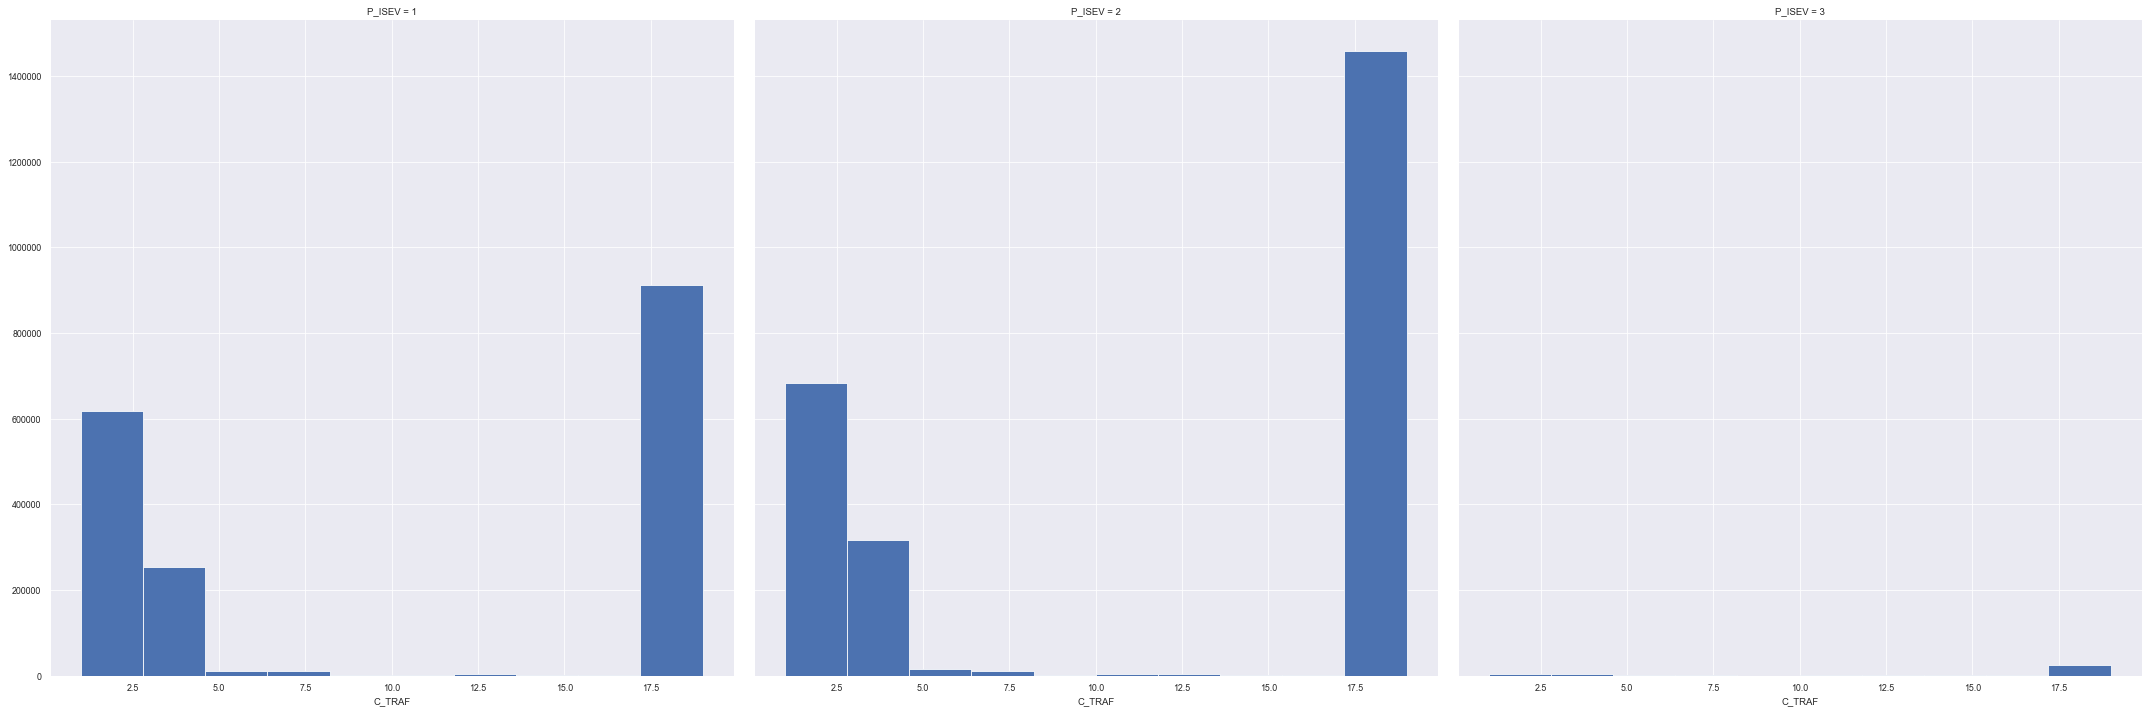

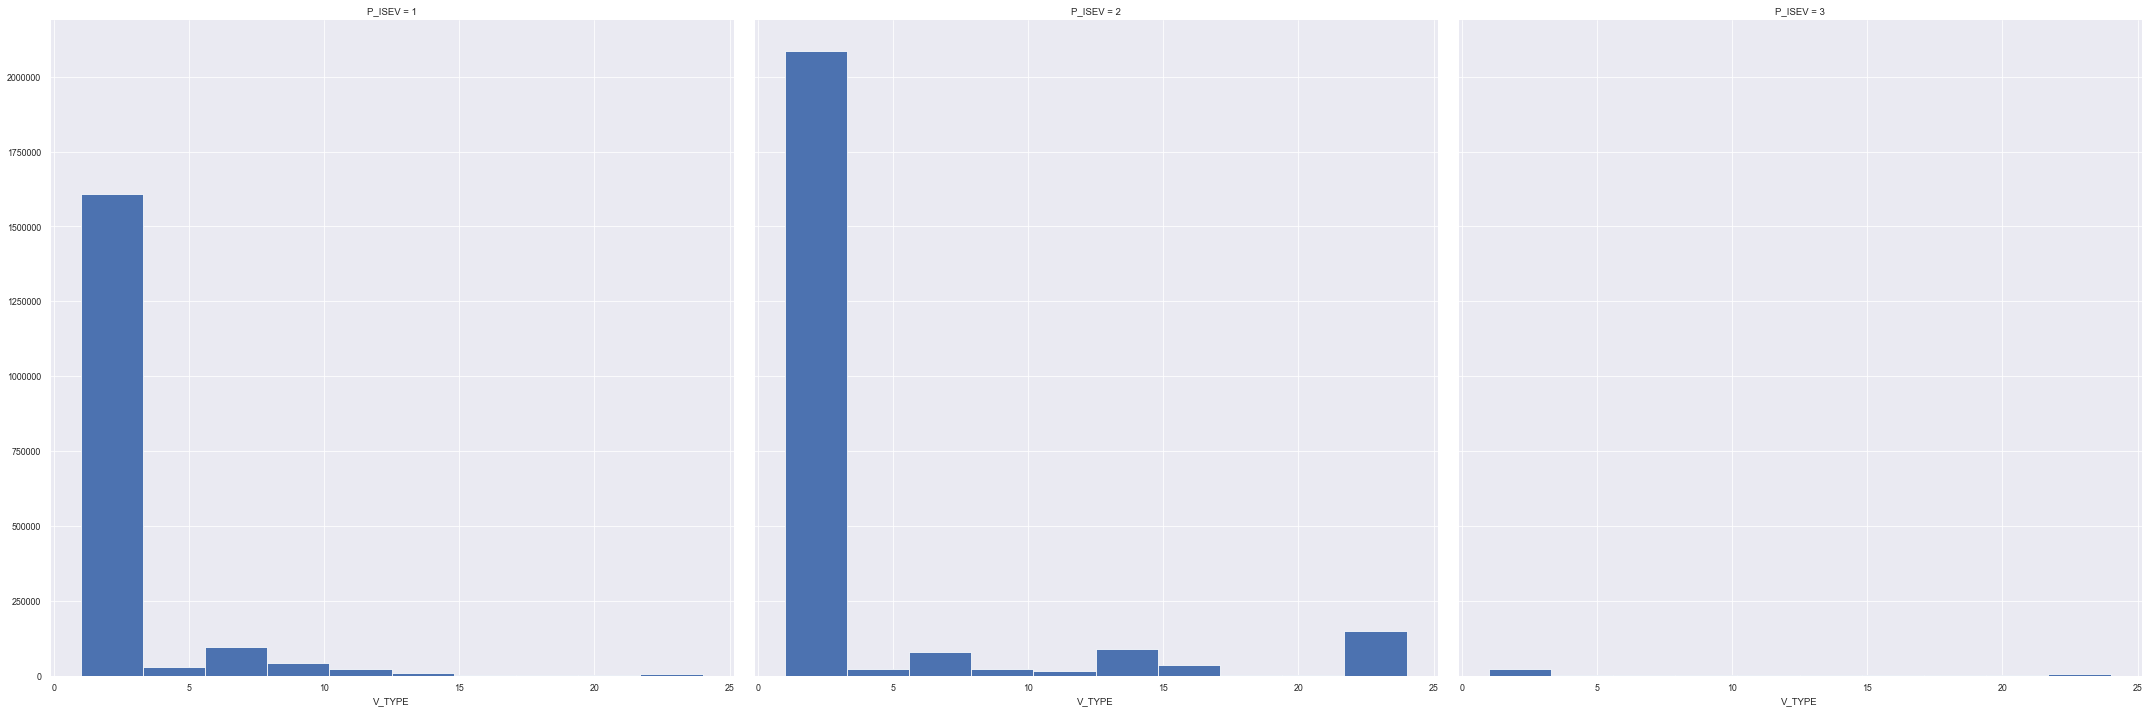

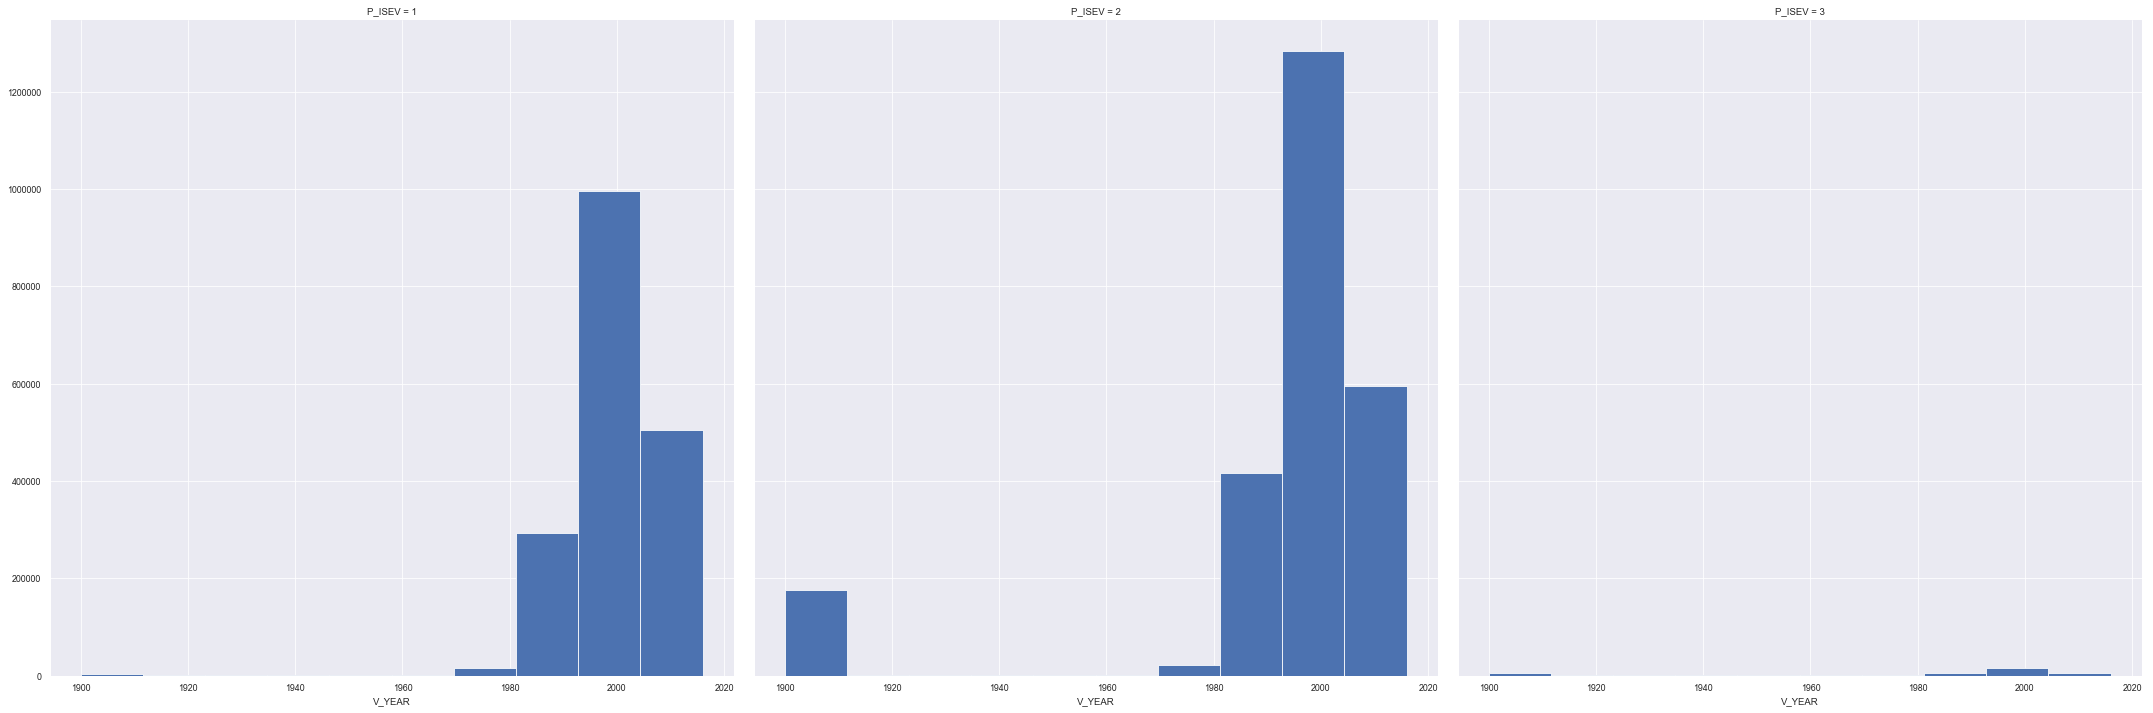

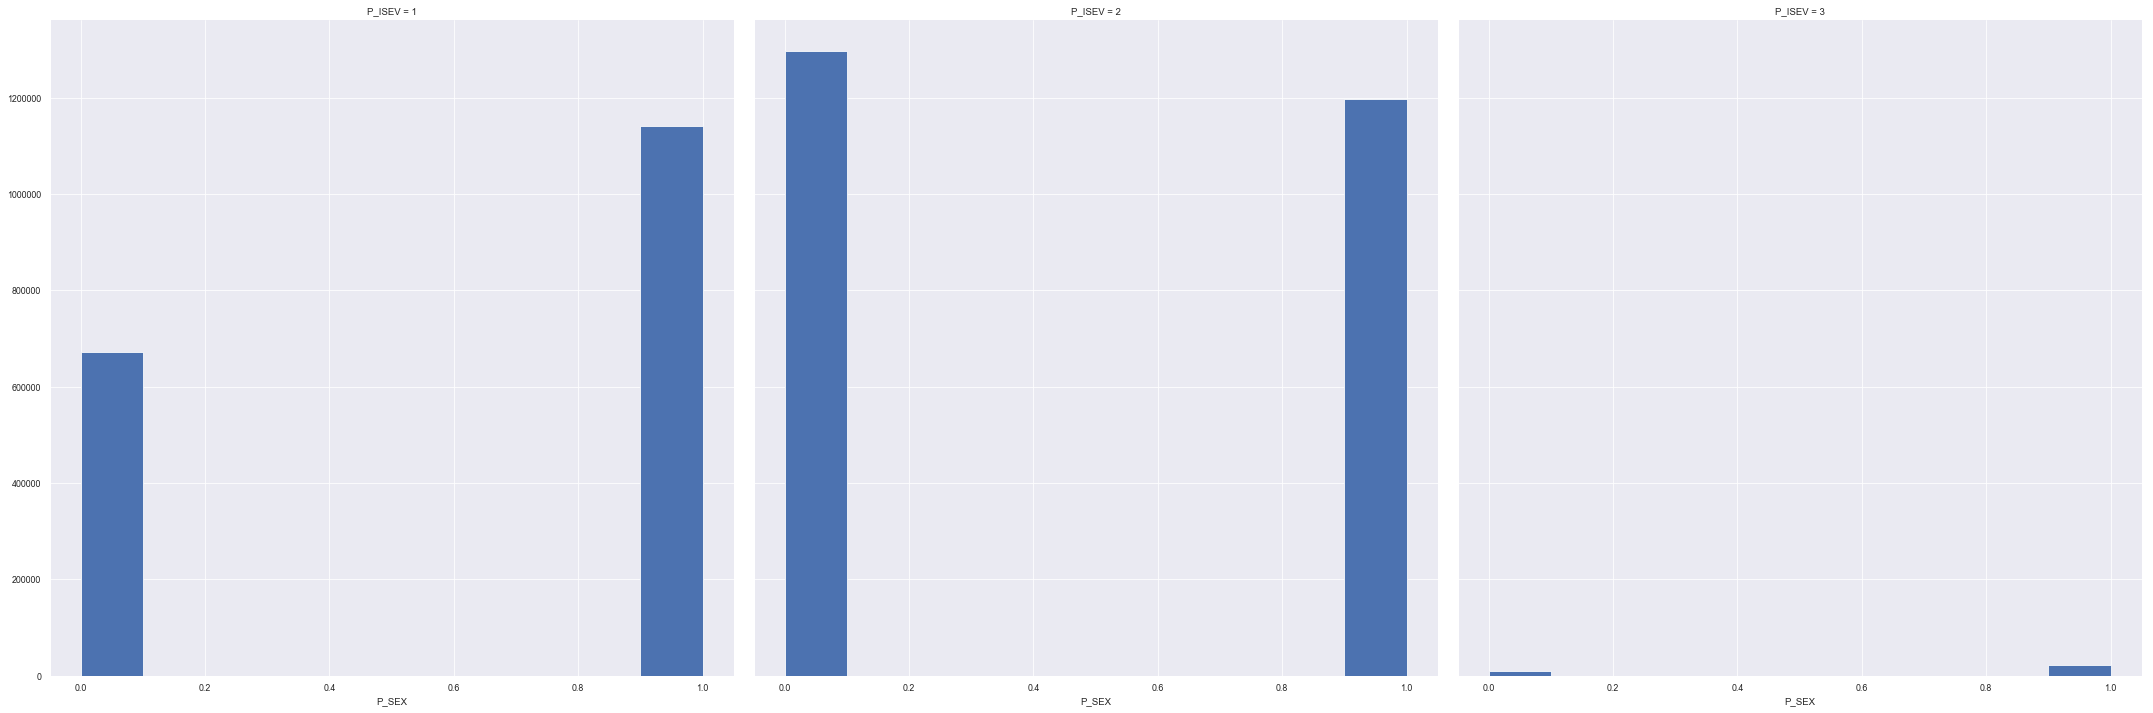

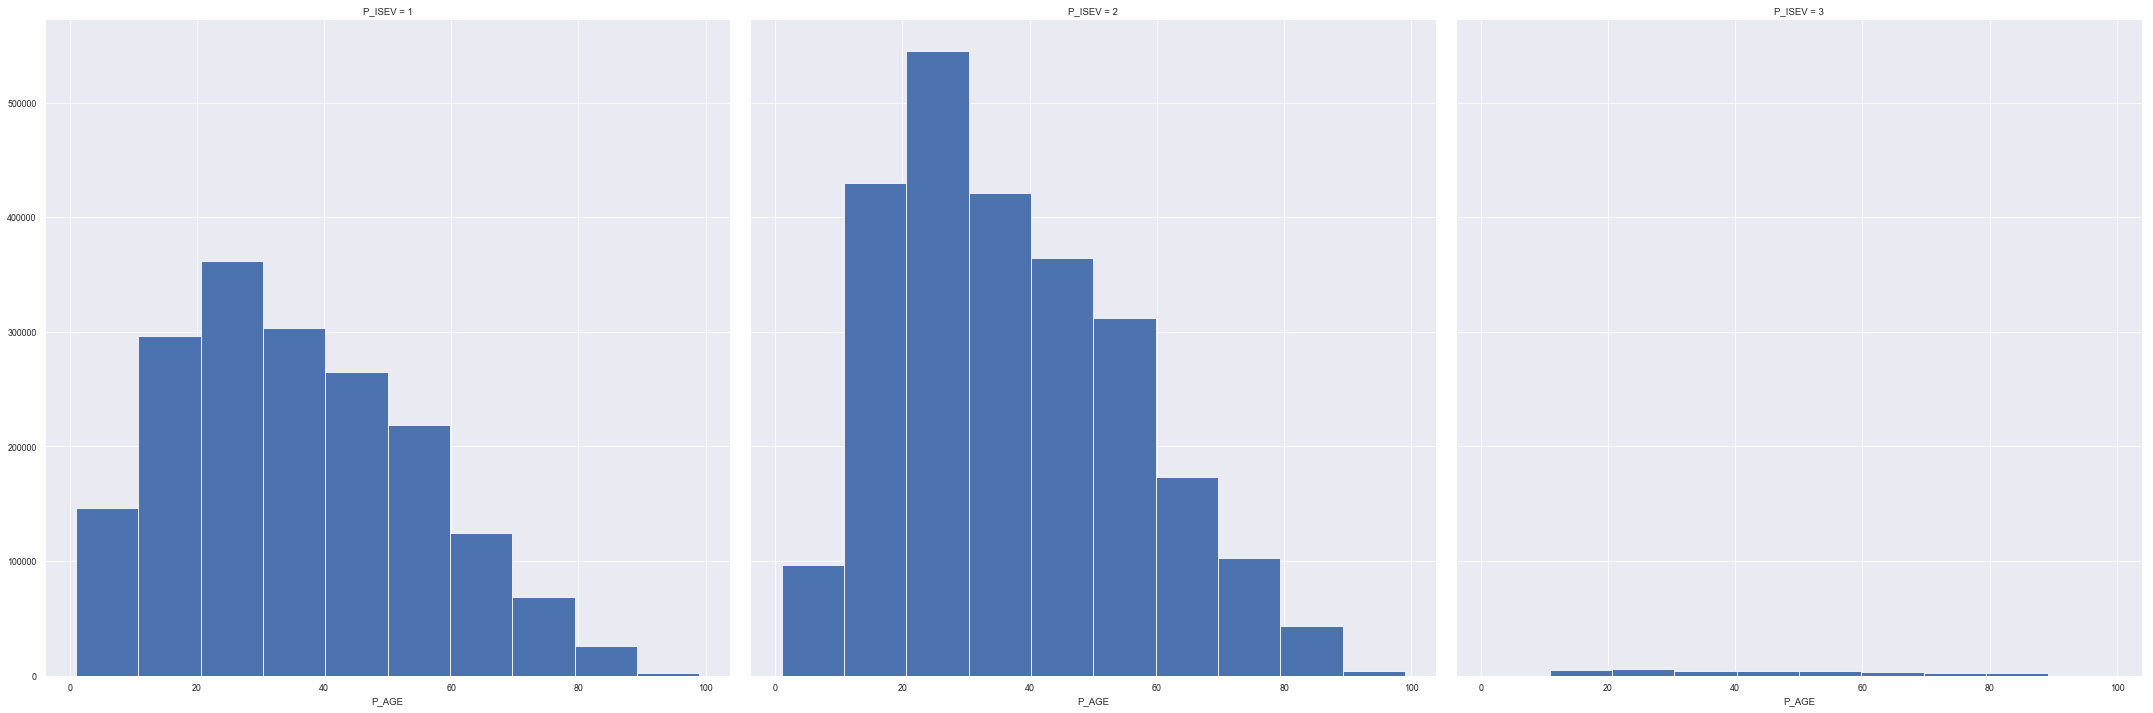

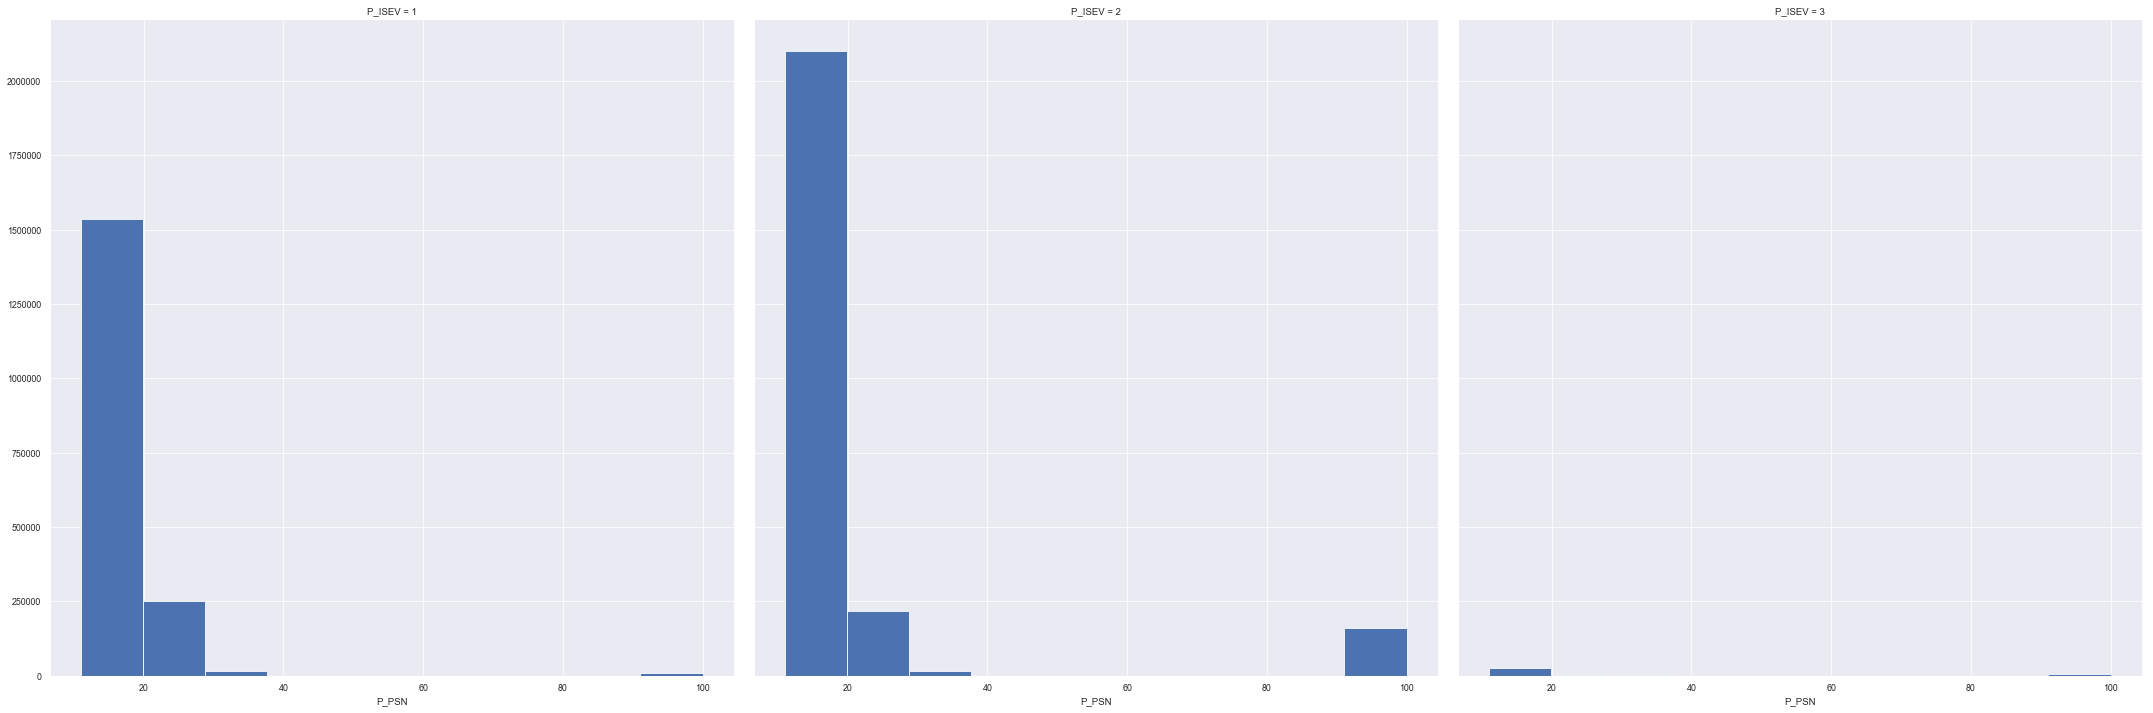

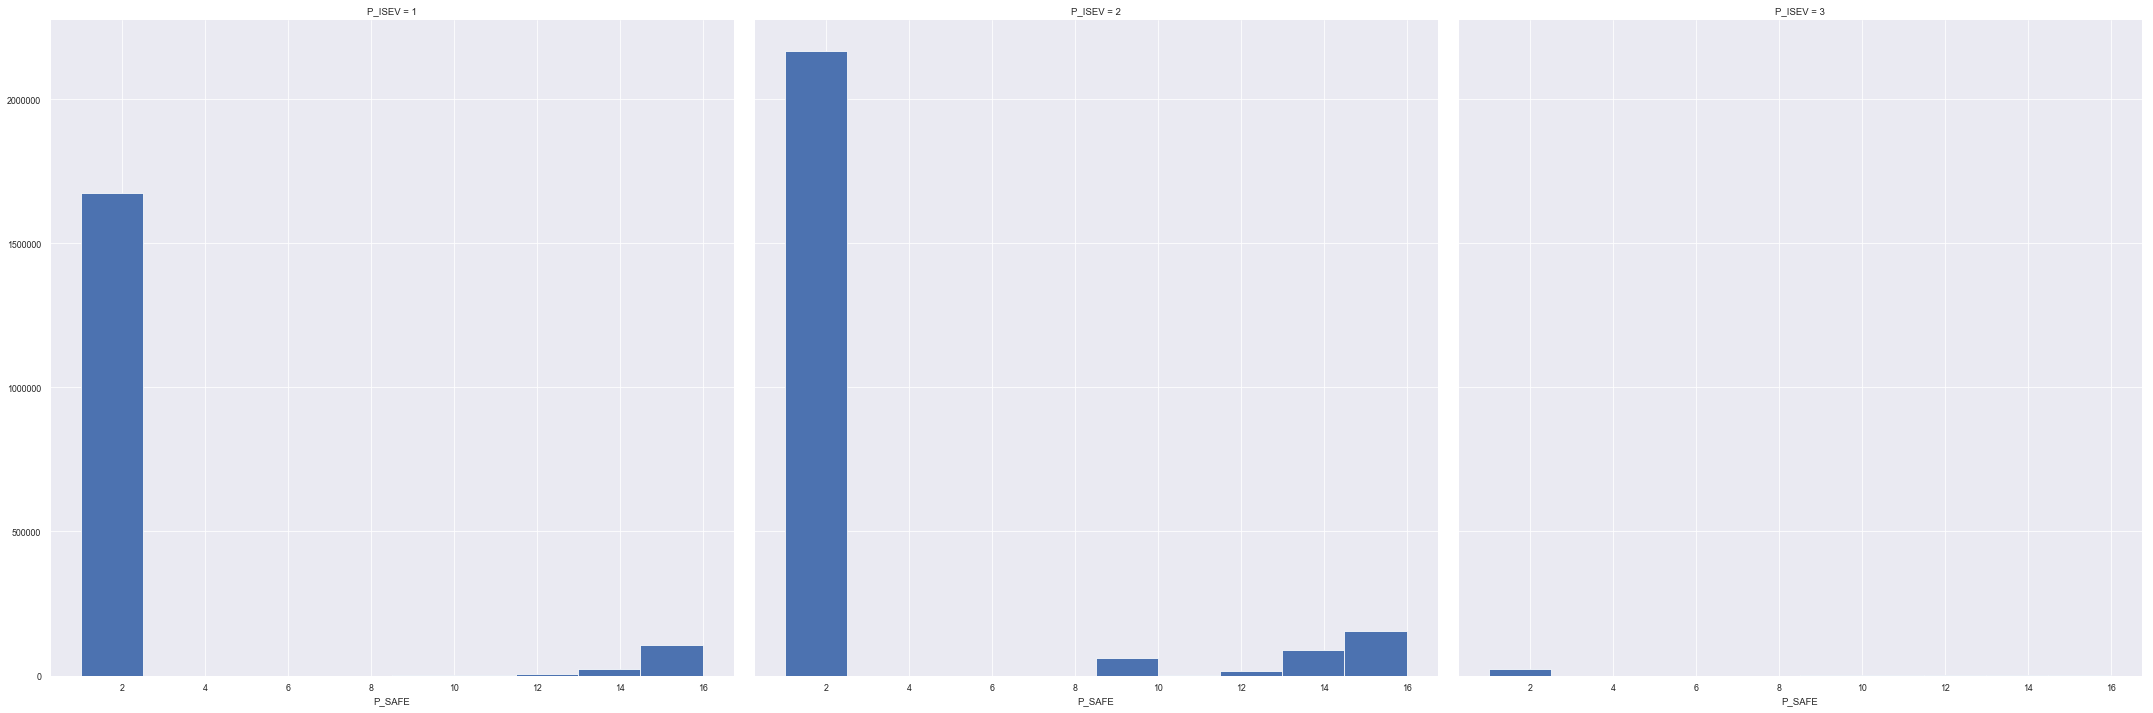

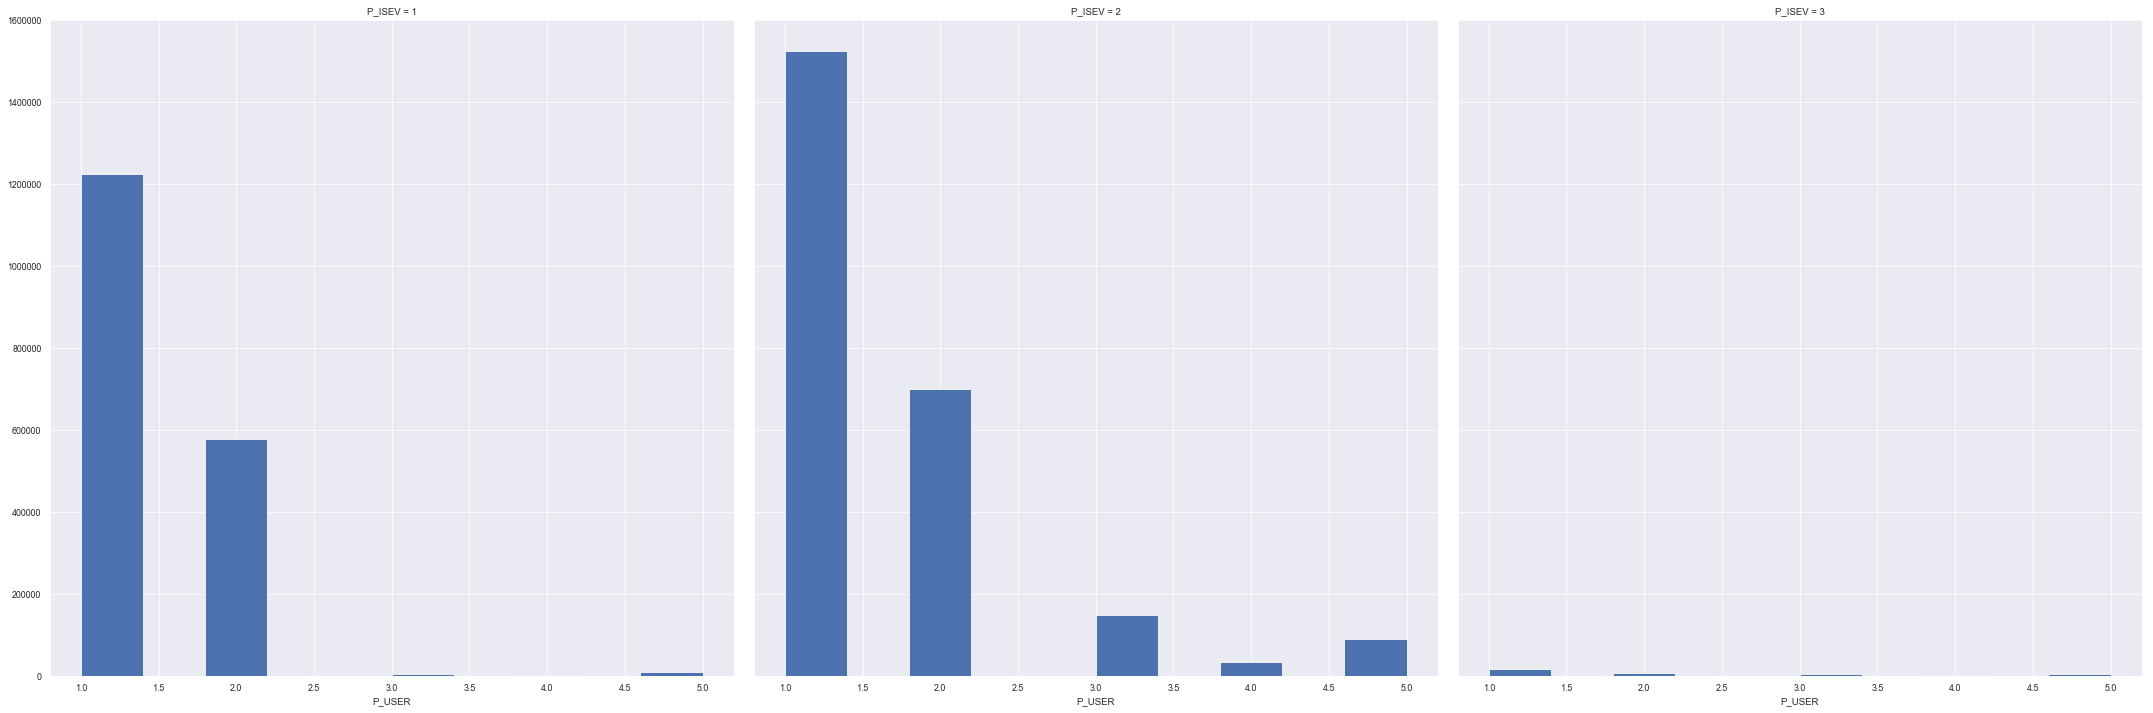

In [139]:
plt.figure(figsize=(12,12))

for col in df_tmp.columns[0:len(df.columns)-1]:
    k = sns.FacetGrid(df_tmp, col="P_ISEV", height = 10, aspect=1)
    k = k.map(plt.hist, col)